# *First stage*
The goal is to check out every attribute and see that grade of correlation with the target attribute.    

In [1]:
#Edit the color of text in print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.colors as mcolors

### Downloading datasets

In [3]:
data=pd.read_csv("house_pricing.csv")

In [4]:
f,c =data.shape
print(color.BOLD +'house_pricing:'+ color.END,'{0} raws and {1} columns'.format(f,c))

house_pricing: 1460 raws and 81 columns


### Looking at the glimpse of data

In [5]:
for i,attribute in enumerate(data.columns.tolist(),start=1):
    if data[attribute].dtype == "object":
        print(color.YELLOW+color.BOLD +'{0:>2}.{1:<20} {2}'.format(i,attribute,"object")+color.END)
    elif data[attribute].dtype == "int64":
        print(color.RED+color.BOLD +'{0:>2}.{1:<20} {2}'.format(i,attribute,"int64")+color.END)
    else:
        print(color.BLUE+color.BOLD +'{0:>2}.{1:<20} {2}'.format(i,attribute,"float64")+color.END)        

 1.Id                   int64
 2.MSSubClass           int64
 3.MSZoning             object
 4.LotFrontage          float64
 5.LotArea              int64
 6.Street               object
 7.Alley                object
 8.LotShape             object
 9.LandContour          object
10.Utilities            object
11.LotConfig            object
12.LandSlope            object
13.Neighborhood         object
14.Condition1           object
15.Condition2           object
16.BldgType             object
17.HouseStyle           object
18.OverallQual          int64
19.OverallCond          int64
20.YearBuilt            int64
21.YearRemodAdd         int64
22.RoofStyle            object
23.RoofMatl             object
24.Exterior1st          object
25.Exterior2nd          object
26.MasVnrType           object
27.MasVnrArea           float64
28.ExterQual            object
29.ExterCond            object
30.Foundation           object
31.BsmtQual             object
32.BsmtCond             object
33.BsmtExposu

Looking at the rates of missing values by attribute

In [6]:
data_mv=round(data.isnull().sum()[data.isnull().any()]*100/data.shape[0],2) 
data_mv

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


Due to the fact that some attributes have more than 90% of null values. Therefore `Alley` is going to be wipped out.

To avoid warnings

In [7]:
import warnings
warnings.filterwarnings('ignore')

To tranform categorical values into numerical values:

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

A sub program that calculates the correlation of every attribute with `SalePrice`:

## Attributes:

Auxiliar analisis program:

In [9]:
l=sorted
l([43,2,40])

[2, 40, 43]

In [10]:
def analisis(attr):
    #2 graphs
    count_nvariables=data[attr].unique().size
    dtype= data[attr].dtype
    plt.figure(figsize=(24,6))
    if (dtype== "float64") or (dtype=="int64" and count_nvariables>25):
        data[attr].hist(bins=100)
        kind="scatterplot"
    elif dtype=="object":
        data[attr].value_counts(dropna=False,ascending=True).sort_index().plot.barh(color=mcolors.TABLEAU_COLORS)
        kind="boxplot"
    else:
        data[attr].value_counts(dropna=False,ascending=True).sort_index().plot.bar(rot=0,color=mcolors.TABLEAU_COLORS)
        kind="boxplot"
    plt.title(attr,fontsize=18,fontweight="bold",color="red")
    plt.show()
    sns.set(rc={"figure.figsize":(14, 4)})
    exec(f"sns.{kind}(data=data,y='SalePrice',x=attr)")
    plt.show()
    #Correlation number
    df= data[[attr,'SalePrice']]
    if dtype == 'object':
        df[attr]=le.fit_transform(df[attr])
    corr=df.corr().iloc[0,1]
    print(color.PURPLE+ 'CORRELATION:'+ color.END)
    print('{0} and SalePrice: {1}'.format(attr,round(corr,2))) 

#### 1.Id
*Number of row.*<br>
Looking if there are repeated ids

In [11]:
#Is every value unique?
len(pd.unique(data.Id))==data.shape[0]

True

Every instance corresponds to a singular data. So this attribute will be wipped out directly.

#### 2.MSSubClass
*Identifies the type of dwelling involved in the sale.*	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
 It does not show a hierarchy among the variables.

In [12]:
mcolors.TABLEAU_COLORS

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

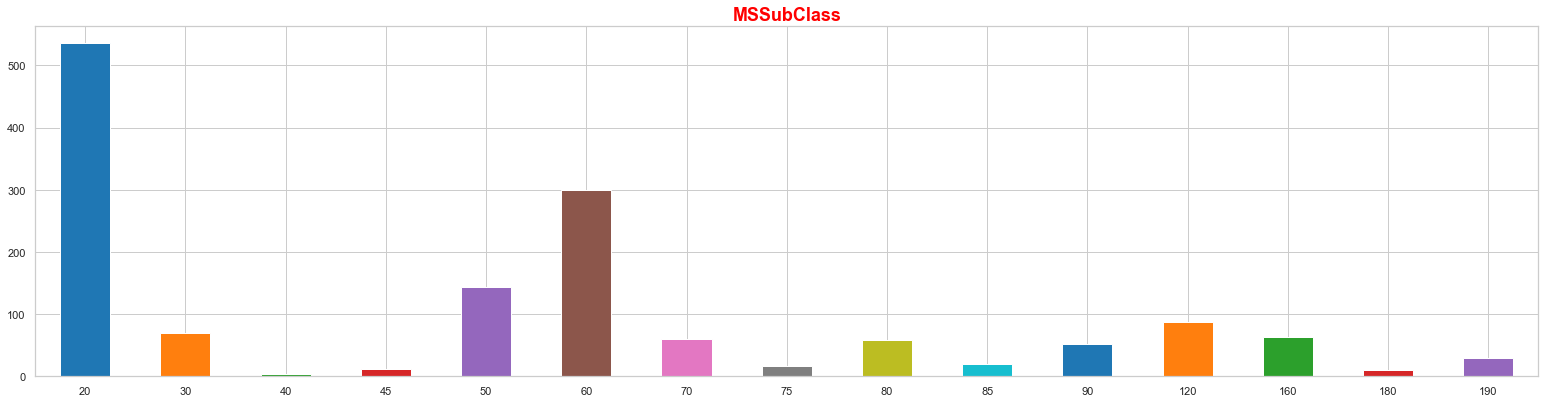

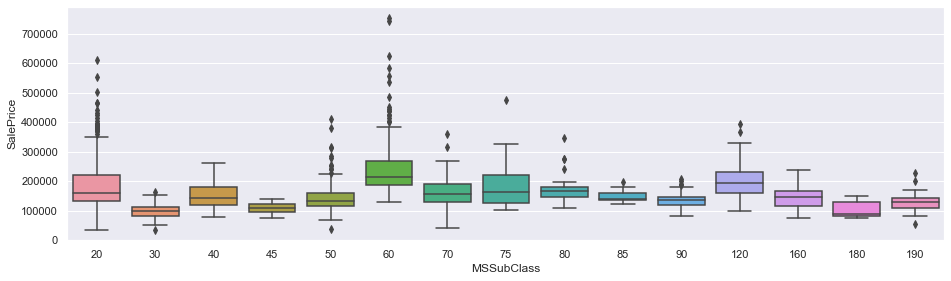

CORRELATION:
MSSubClass and SalePrice: -0.08


In [13]:
analisis("MSSubClass")

#### 3.MSZoning
*Identifies the general zoning classification of the sale.*
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
 It shows a hierarchy among the variables.

Replacing NaN values with the mode:

In [14]:
data.MSZoning.fillna(data.MSZoning.mode().iloc[0],inplace=True)

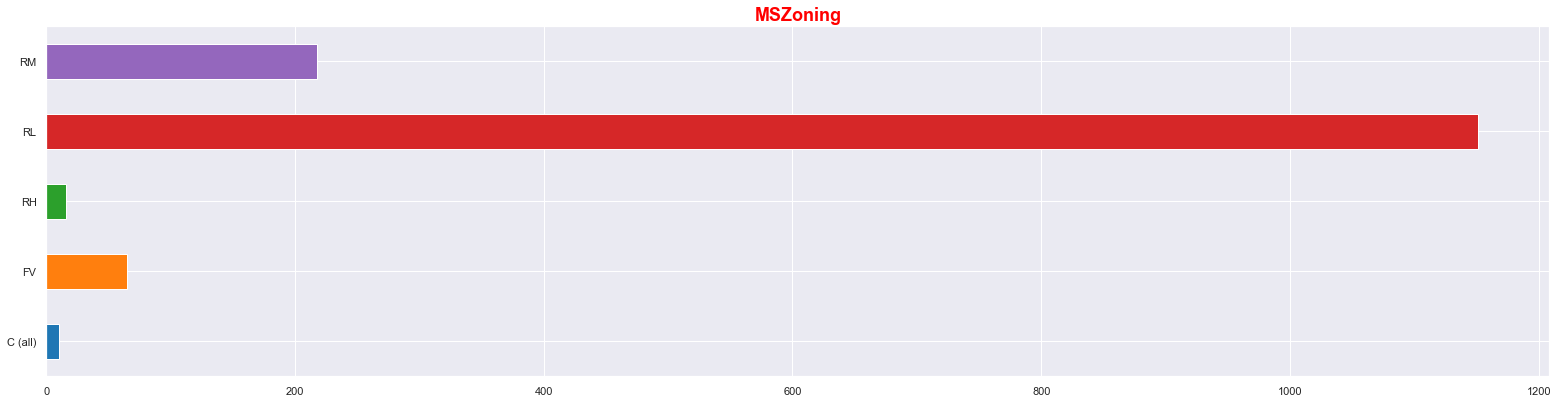

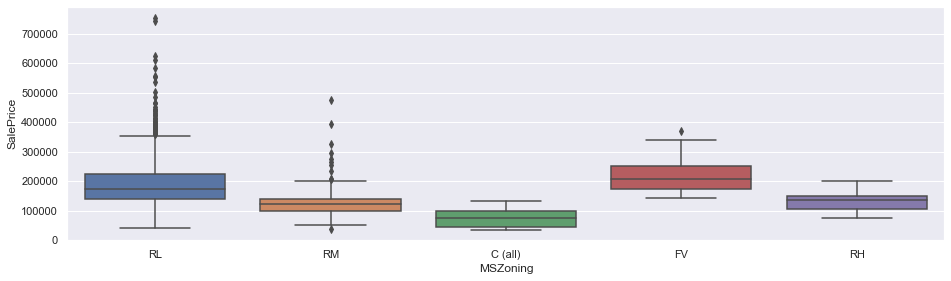

CORRELATION:
MSZoning and SalePrice: -0.17


In [15]:
analisis("MSZoning")

#### 4.LotFrontage
*Linear feet of street connected to property.*

Replacing nan values with the average value: 

In [16]:
data.LotFrontage.fillna(round(data.LotFrontage.mean(),0),inplace=True)

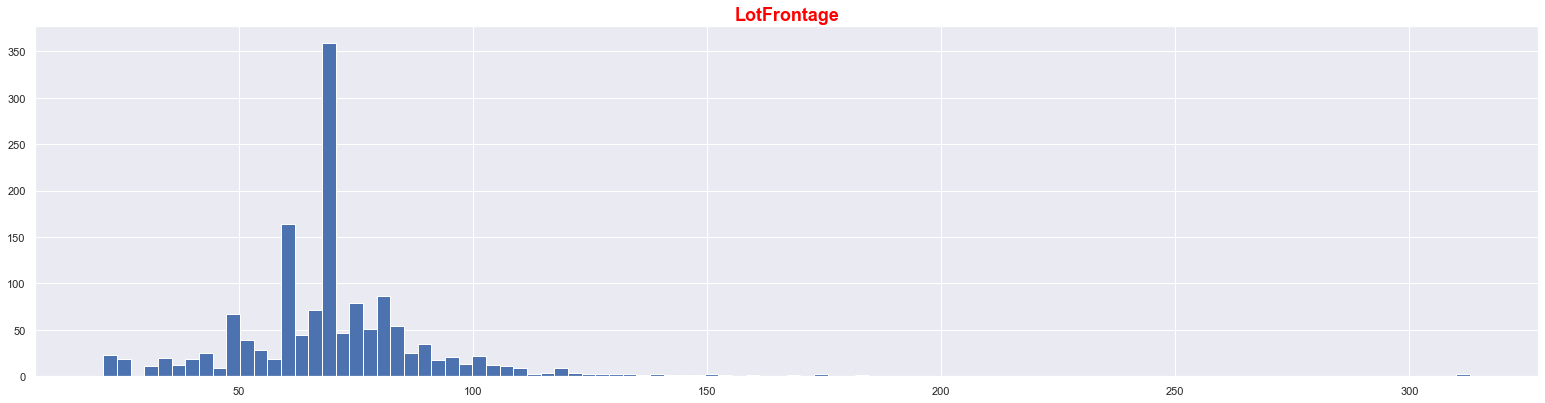

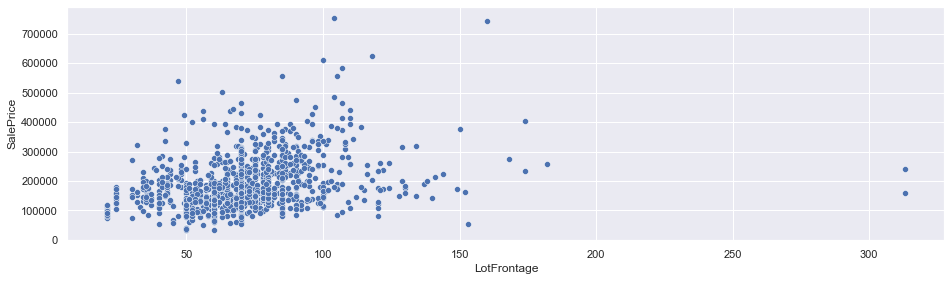

CORRELATION:
LotFrontage and SalePrice: 0.33


In [17]:
analisis("LotFrontage")

#### 5.LotArea
*Lot size in square feet*

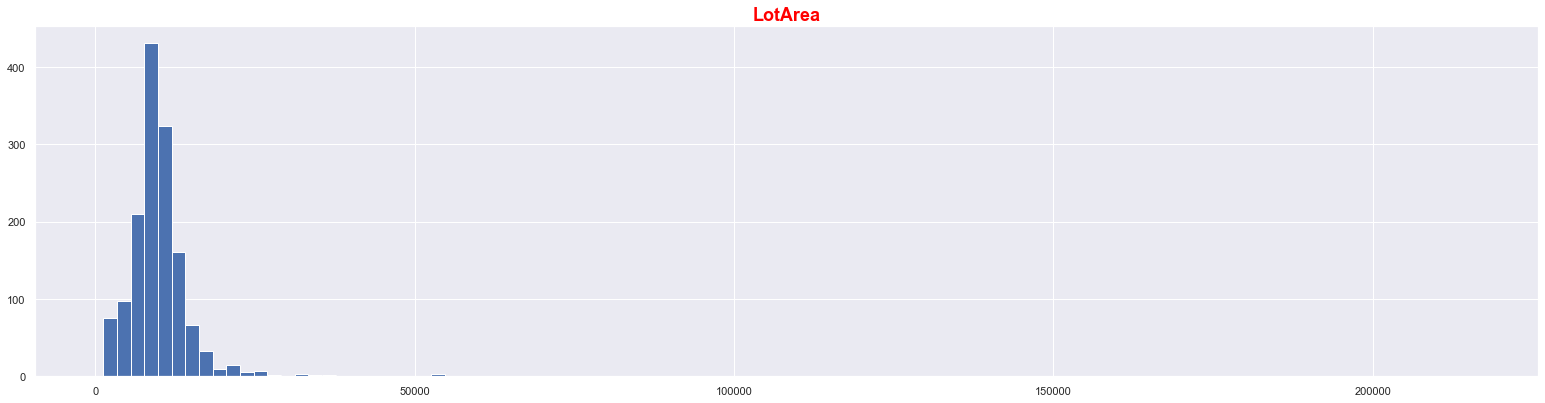

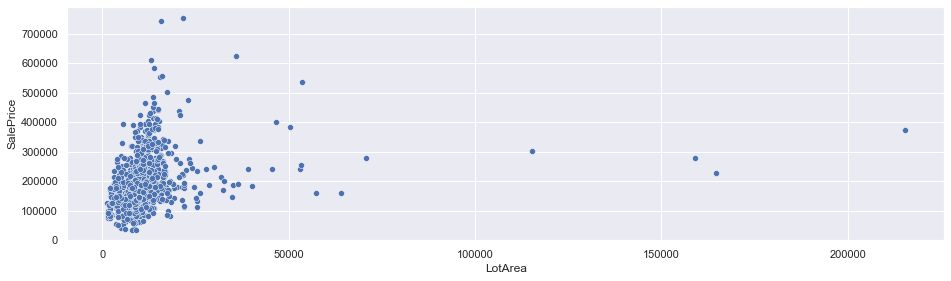

CORRELATION:
LotArea and SalePrice: 0.26


In [18]:
analisis("LotArea")

#### 6.Street
*Type of road access to property.*

       Grvl	Gravel	
       Pave	Paved

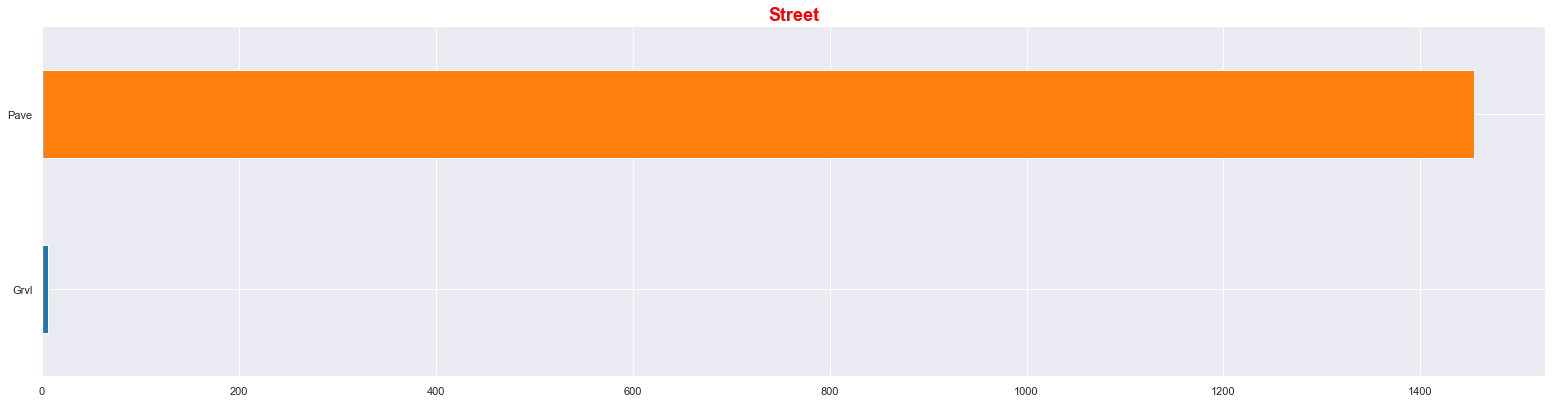

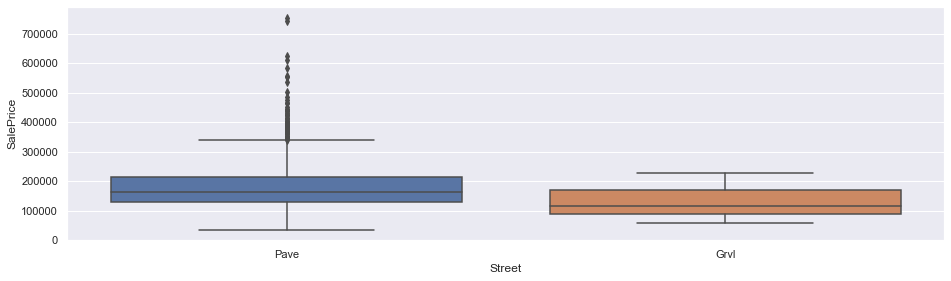

CORRELATION:
Street and SalePrice: 0.04


In [19]:
analisis("Street")

#### 8.LotShape
*General shape of property.*

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
 It shows a hierarchy among the variables.

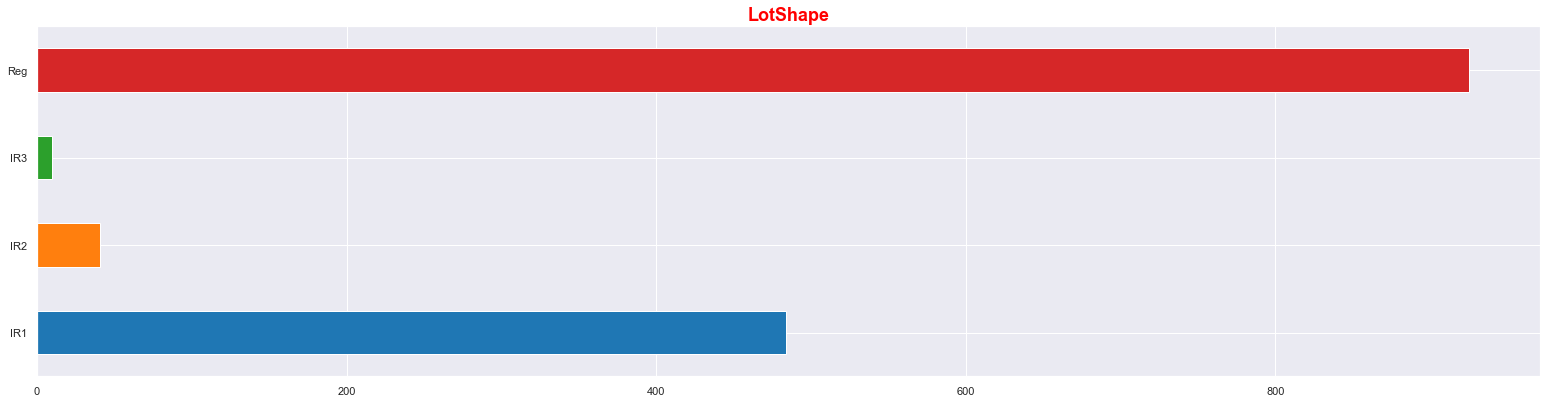

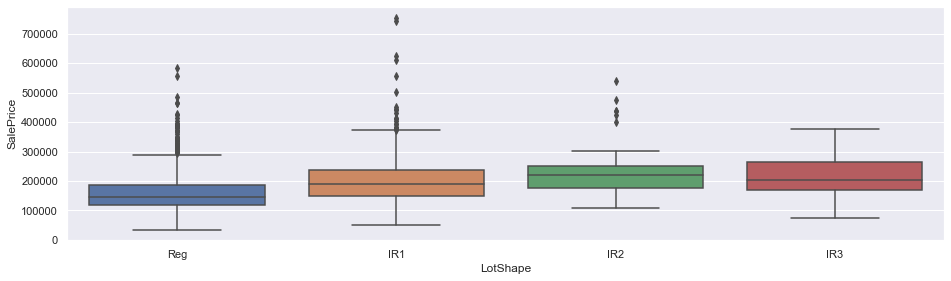

CORRELATION:
LotShape and SalePrice: -0.26


In [20]:
analisis("LotShape")

#### 9.LandContour
*Flatness of the property*

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
It shows a hierarchy among the variables.

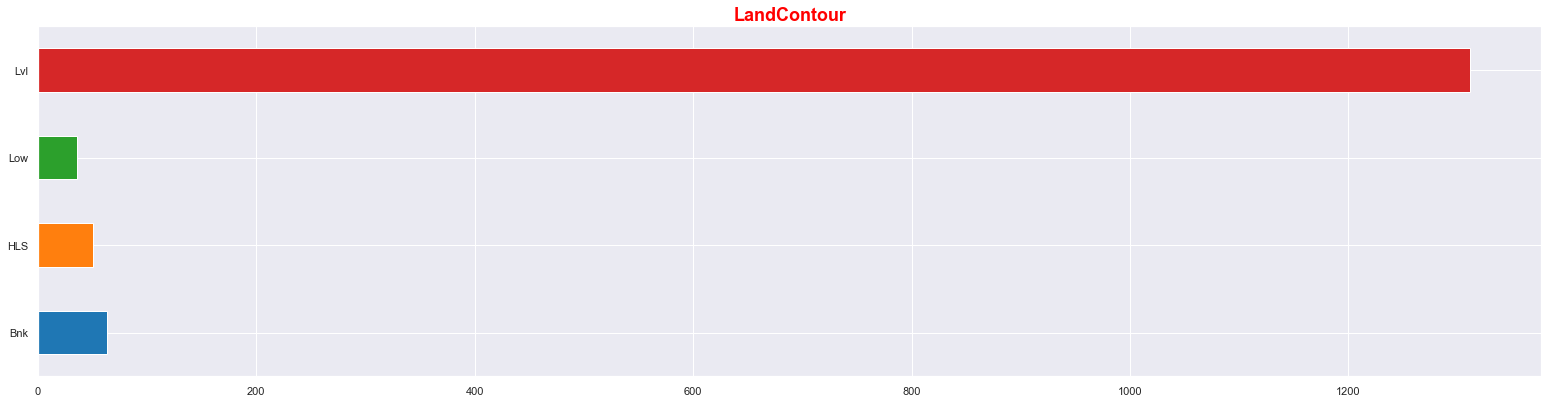

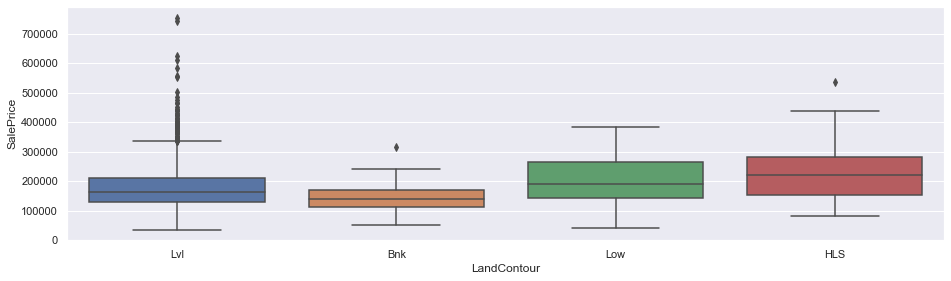

CORRELATION:
LandContour and SalePrice: 0.02


In [21]:
analisis("LandContour")

#### 10.Utilities
*Type of utilities available.*
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	   Electricity only
It shows a hierarchy among the variables.

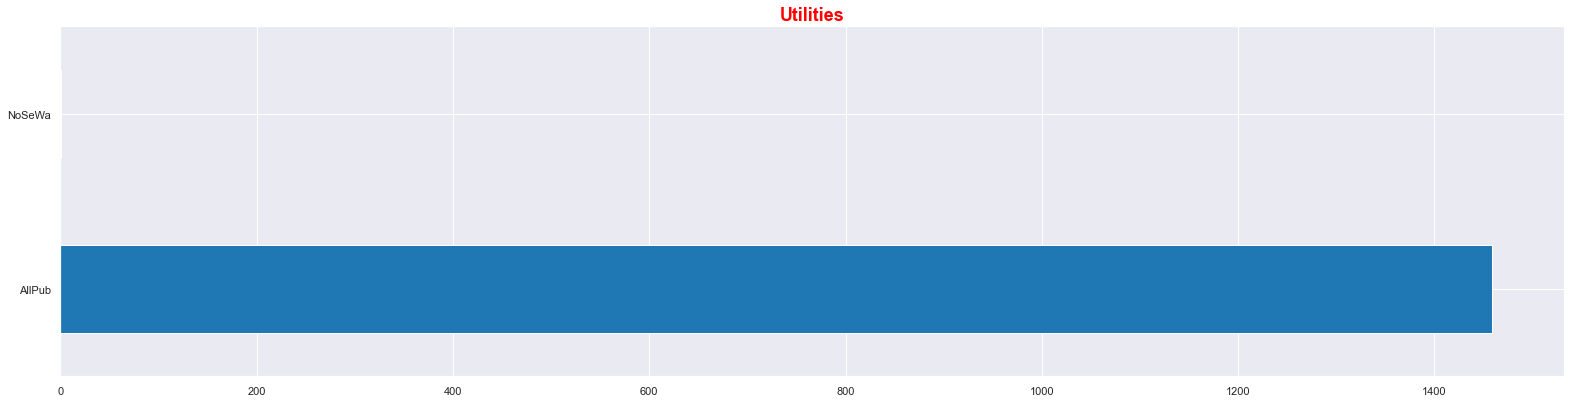

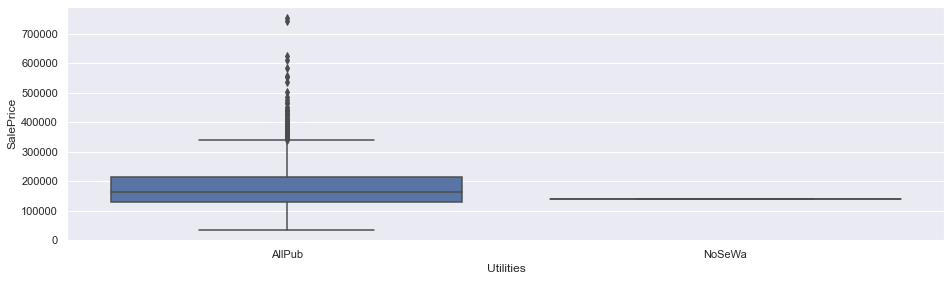

CORRELATION:
Utilities and SalePrice: -0.01


In [22]:
analisis("Utilities")

Replacing NaN values with `AllPub`:

In [23]:
data.Utilities.fillna('AllPub',inplace=True)

#### 11.LotConfig
*Lot configuration.*

       Inside	Inside lot
       Corner	Corner lot
       CulDSac   Cul-de-sac
       FR2	   Frontage on 2 sides of property
       FR3	   Frontage on 3 sides of property
It shows a hierarchy among the variables.

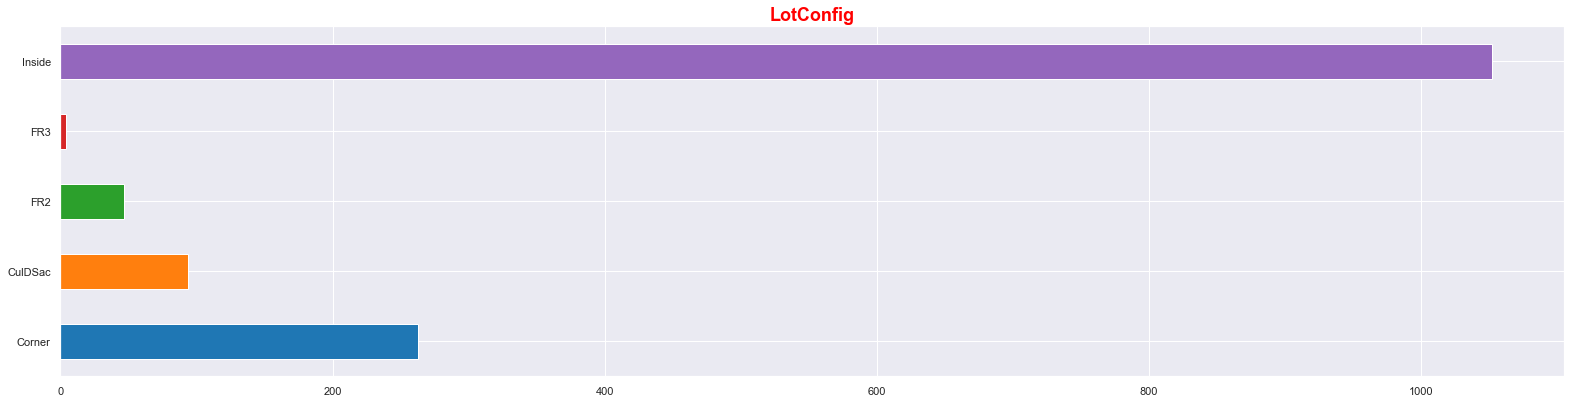

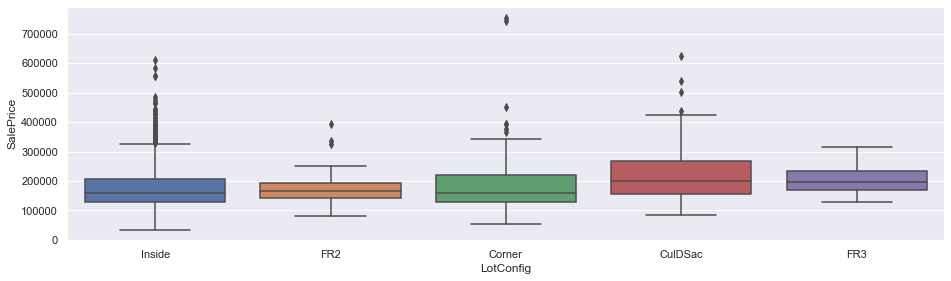

CORRELATION:
LotConfig and SalePrice: -0.07


In [24]:
analisis("LotConfig")

#### 12.LandSlope
*Slope of property:*
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
It shows a hierarchy among the variables.

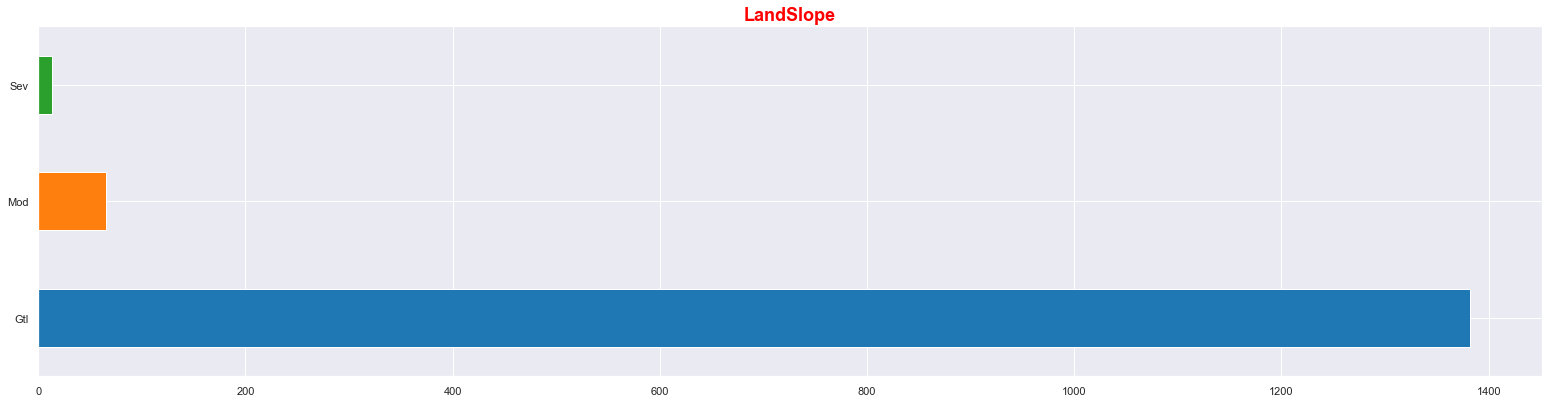

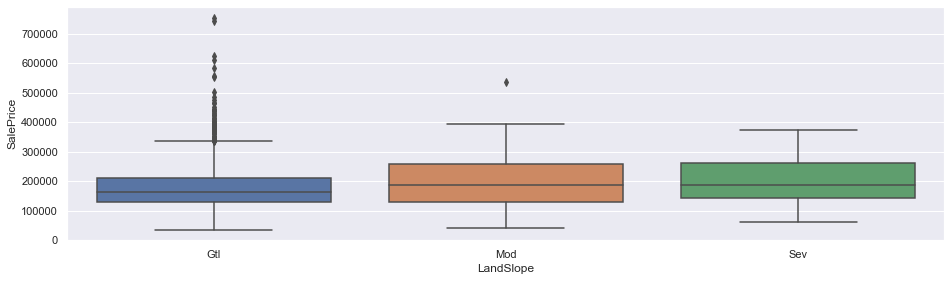

CORRELATION:
LandSlope and SalePrice: 0.05


In [25]:
analisis("LandSlope")

#### 13.Neighborhood
*Physical locations within Ames city limits:*

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	 Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	 Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	  North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	 Northwest Ames
       OldTown	Old Town
       SWISU	  South & West of Iowa State University
       Sawyer	 Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	 Timberland
       Veenker	Veenker
   I consider it does not show a hierarchy among the variables.

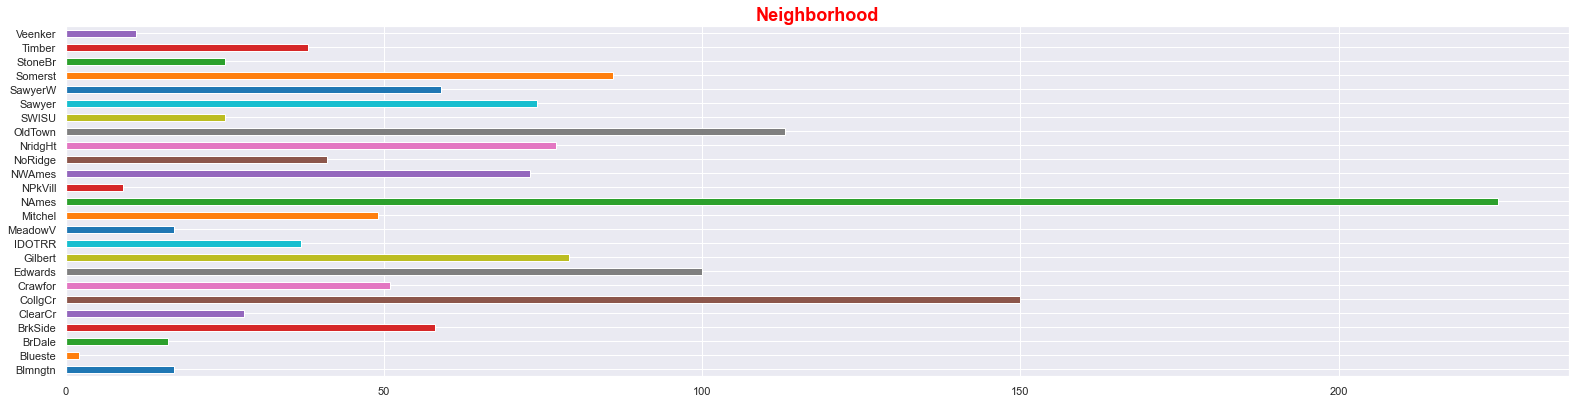

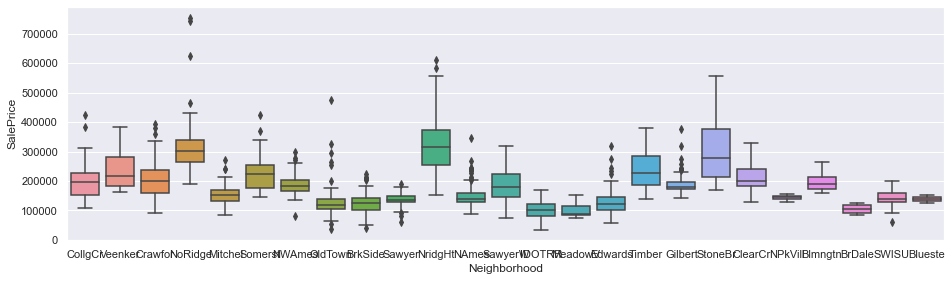

CORRELATION:
Neighborhood and SalePrice: 0.21


In [26]:
analisis("Neighborhood")

#### 14.Condition1
*Proximity to various conditions:*
	
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
 I consider it shows a hierarchy among the variables.

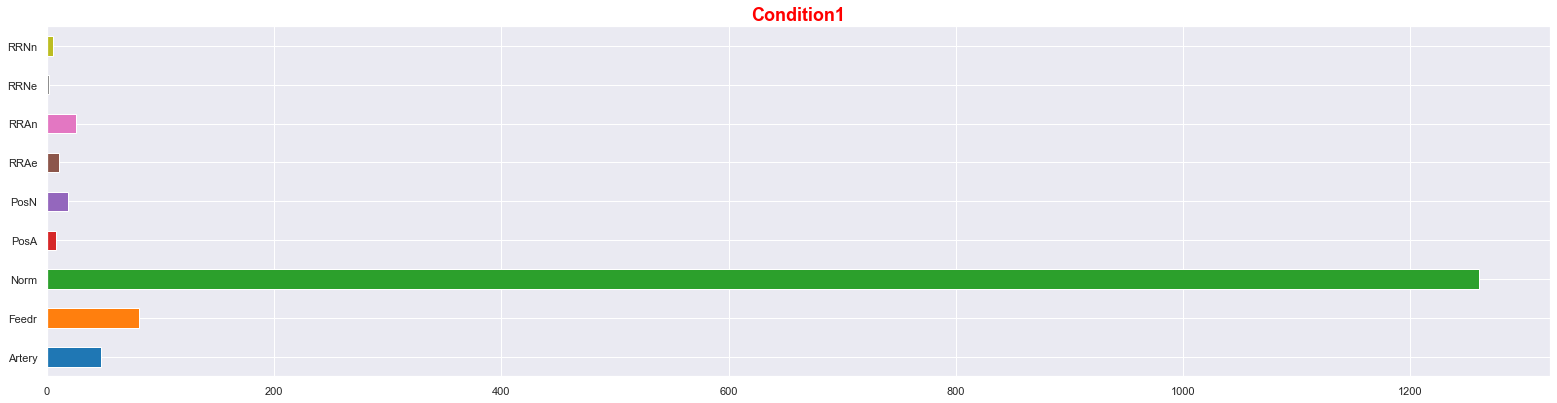

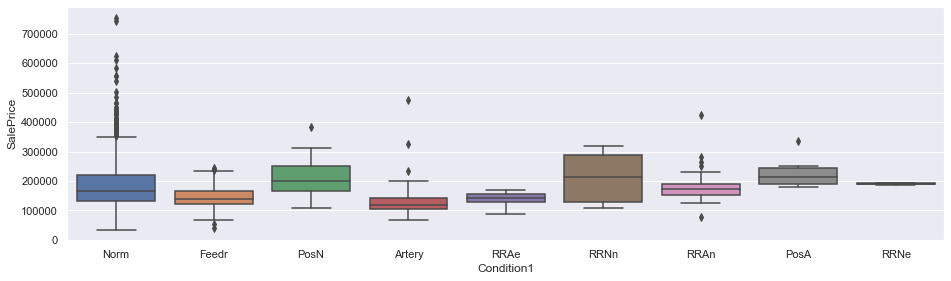

CORRELATION:
Condition1 and SalePrice: 0.09


In [27]:
analisis("Condition1")

#### 15.Condition2
*Proximity to various conditions (if more than one is present):*
		
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
 I consider it shows a hierarchy among the variables.

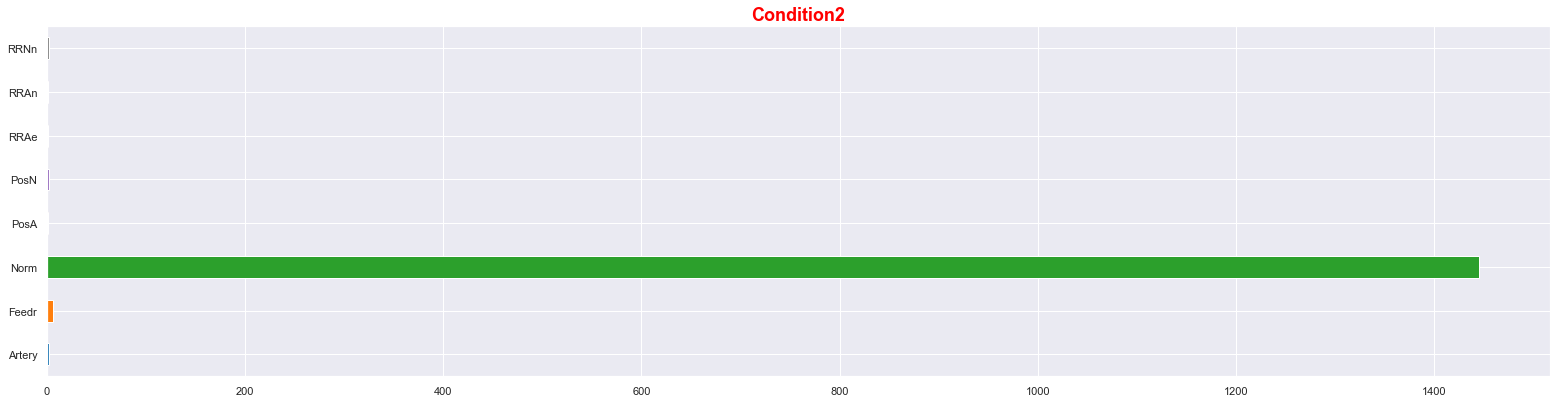

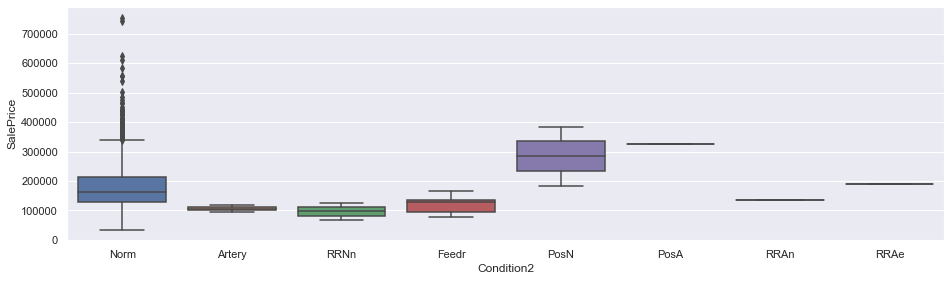

CORRELATION:
Condition2 and SalePrice: 0.01


In [28]:
analisis("Condition2")

#### 16.BldgType
*Type of dwelling:*
		
       1Fam	  Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	 Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
It shows a hierarchy among the variables.

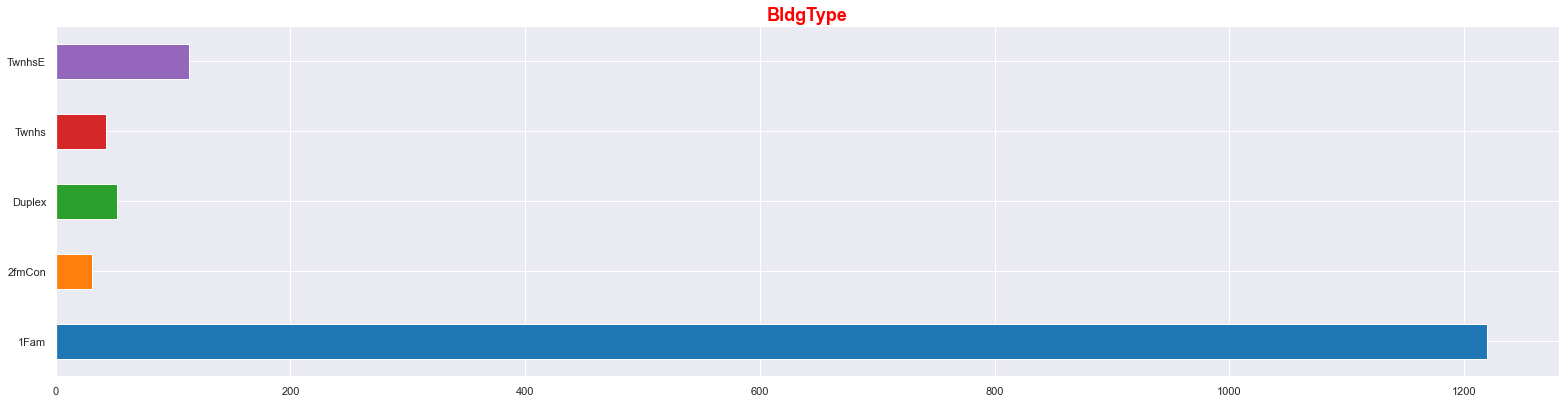

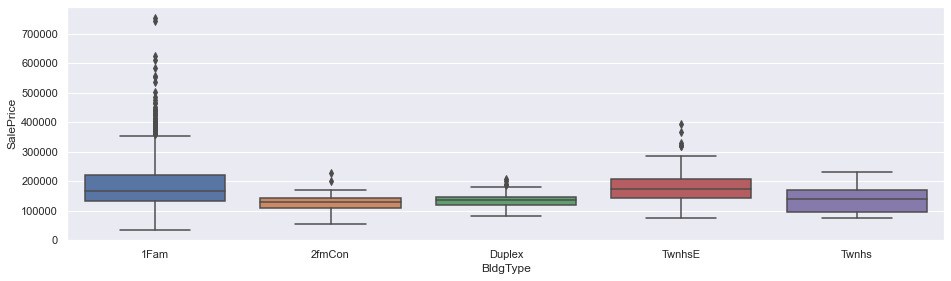

CORRELATION:
BldgType and SalePrice: -0.09


In [29]:
analisis("BldgType")

#### 17.HouseStyle
*Style of dwelling:*
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	  Split Level
 I consider it shows a hierarchy among the variables.

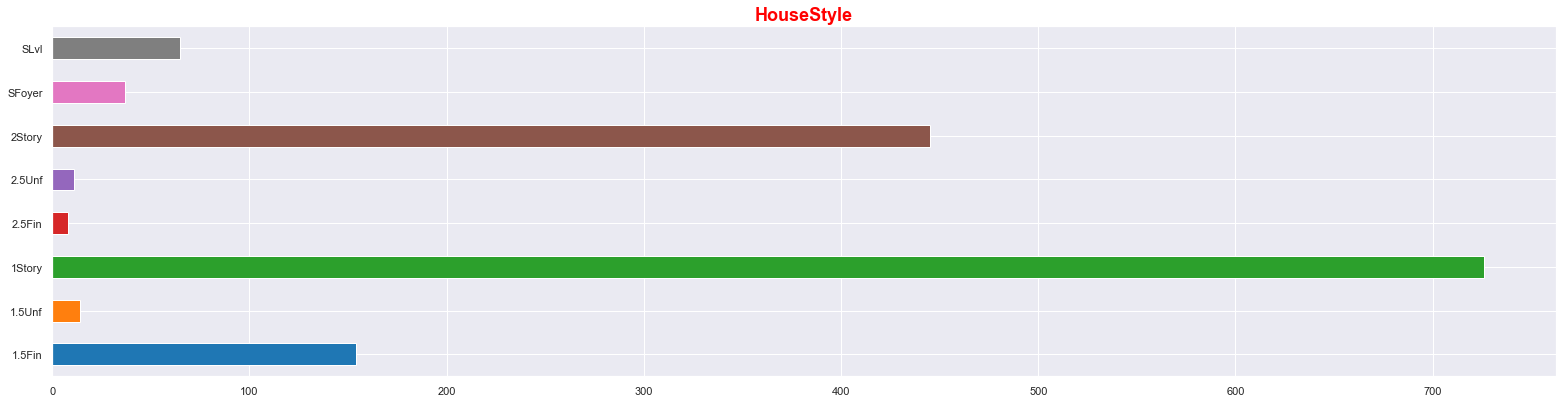

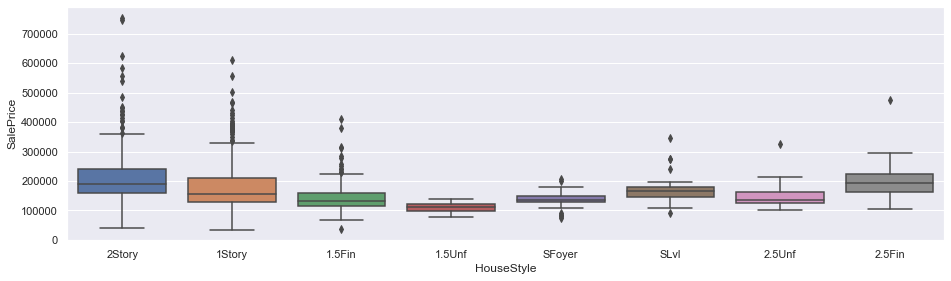

CORRELATION:
HouseStyle and SalePrice: 0.18


In [30]:
analisis("HouseStyle")

#### 18.OverallQual
*Rates the overall material and finish of the house:*

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

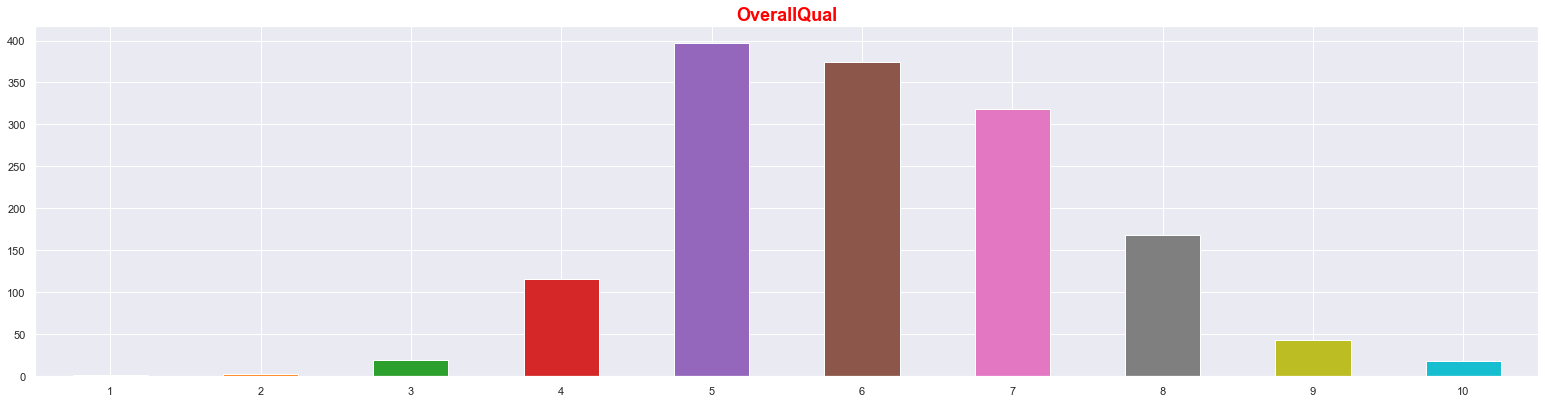

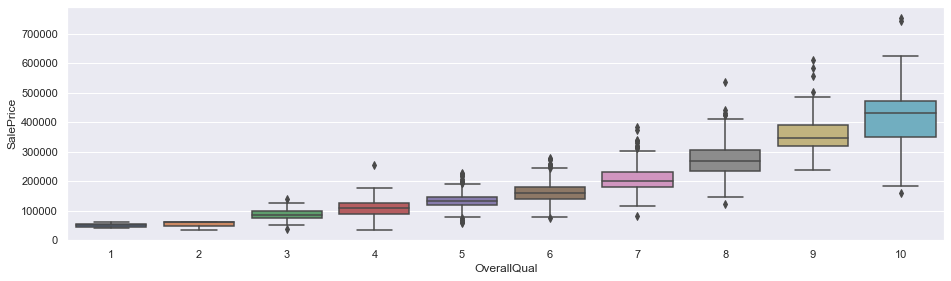

CORRELATION:
OverallQual and SalePrice: 0.79


In [31]:
analisis("OverallQual")

#### 19.OverallCond
*Rates the overall condition of the house:*

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

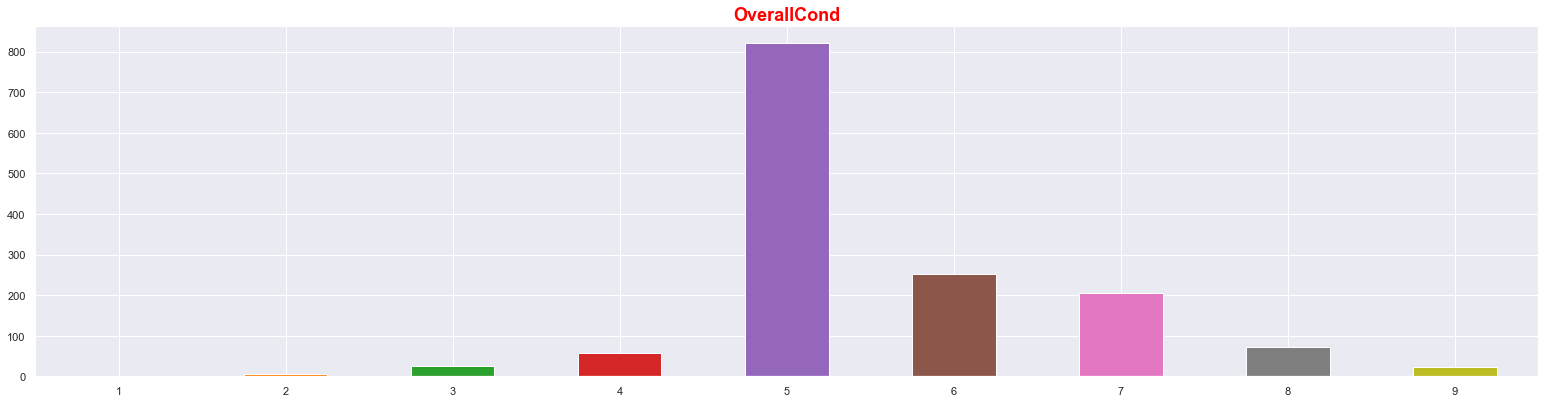

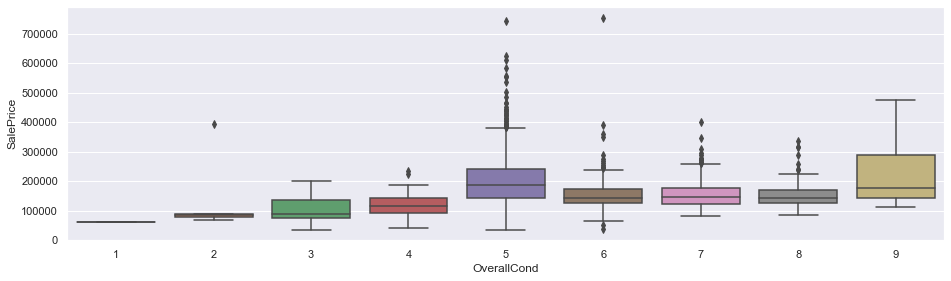

CORRELATION:
OverallCond and SalePrice: -0.08


In [32]:
analisis("OverallCond")

#### 20.YearBuilt
*Original construction date.*

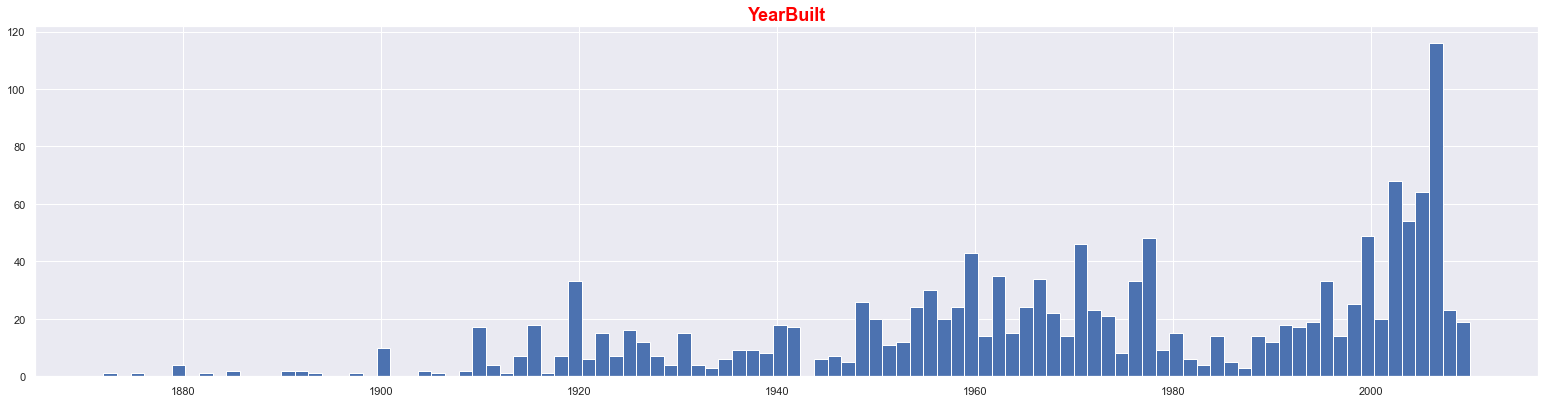

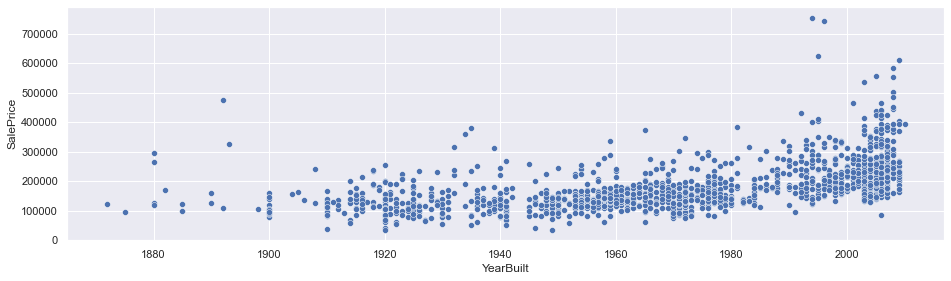

CORRELATION:
YearBuilt and SalePrice: 0.52


In [33]:
analisis("YearBuilt")

#### 21.YearRemodAdd
*Remodel date (same as construction date if no remodeling or additions).*

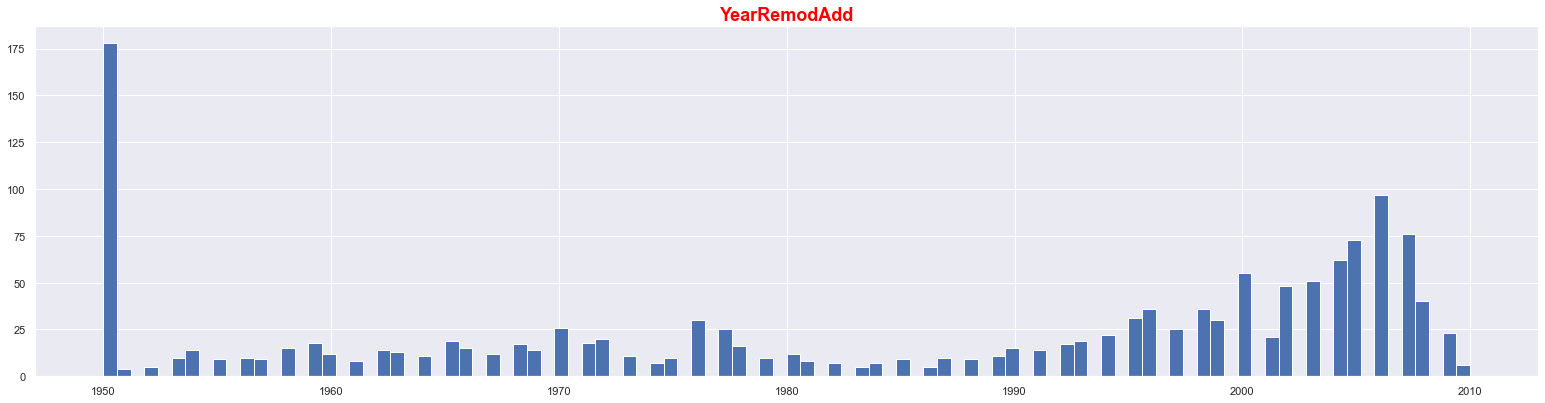

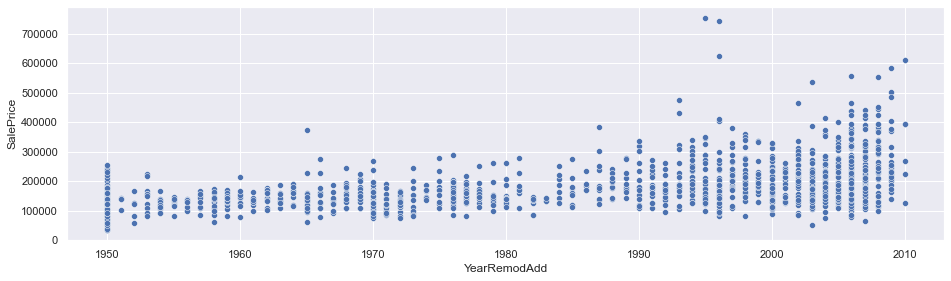

CORRELATION:
YearRemodAdd and SalePrice: 0.51


In [34]:
analisis("YearRemodAdd")

#### 22.RoofStyle
*Type of roof:*

       Flat	   Flat
       Gable	  Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed	   Shed
 I consider it shows a hierarchy among the variables.

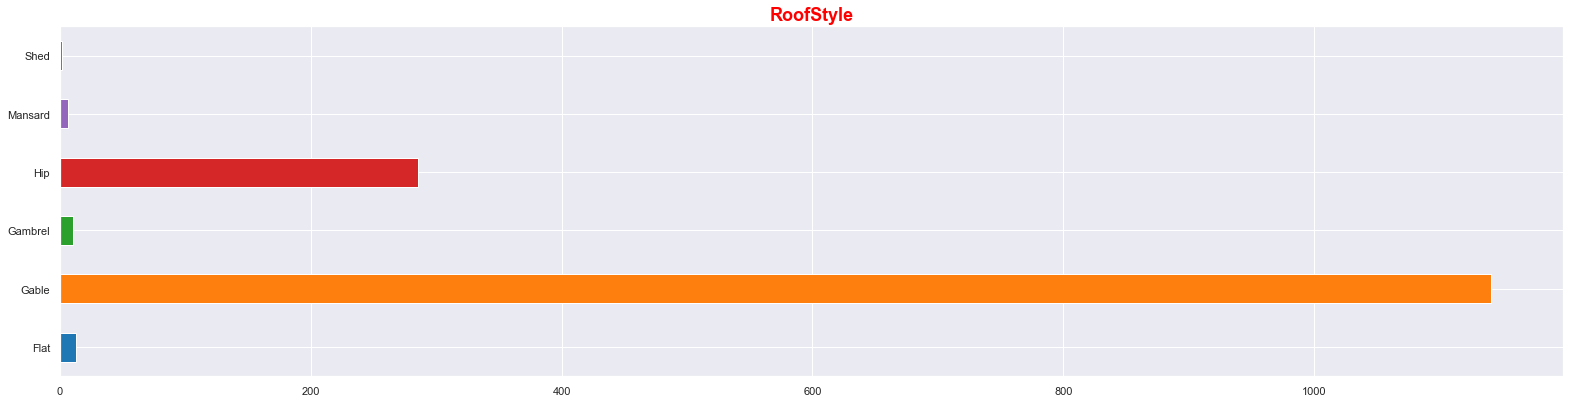

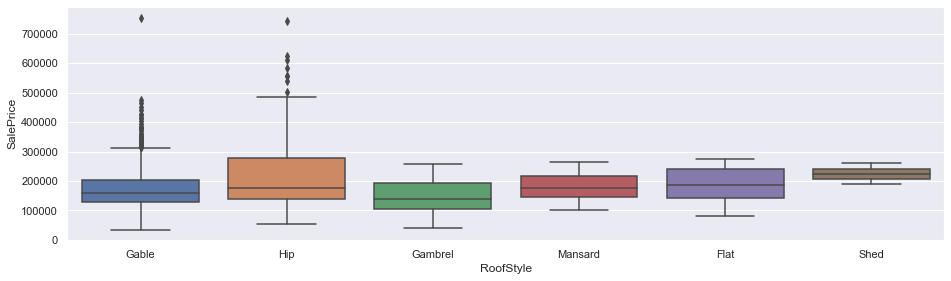

CORRELATION:
RoofStyle and SalePrice: 0.22


In [35]:
analisis("RoofStyle")

#### 23.RoofMatl
*Roof material:*

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	  Metal
       Roll	   Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
I consider it does not show a hierarchy among the variables.

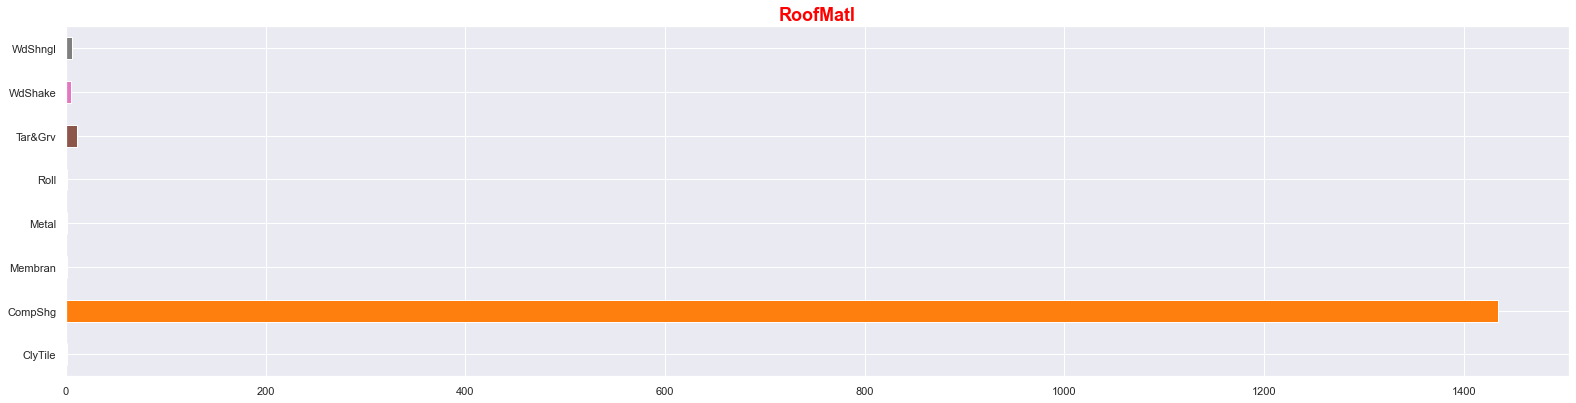

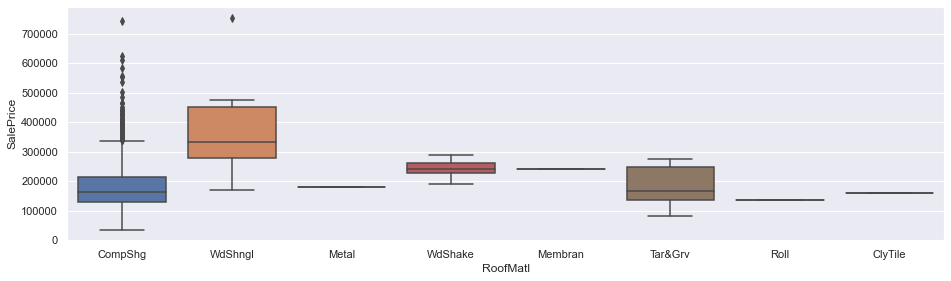

CORRELATION:
RoofMatl and SalePrice: 0.13


In [36]:
analisis("RoofMatl")

#### 24.Exterior1st
*Exterior covering on house:*

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
 I consider it does not show a hierarchy among the variables.

Replacing NaN values with the mode:

In [37]:
data.Exterior1st.fillna(data.Exterior1st.mode().iloc[0],inplace=True)

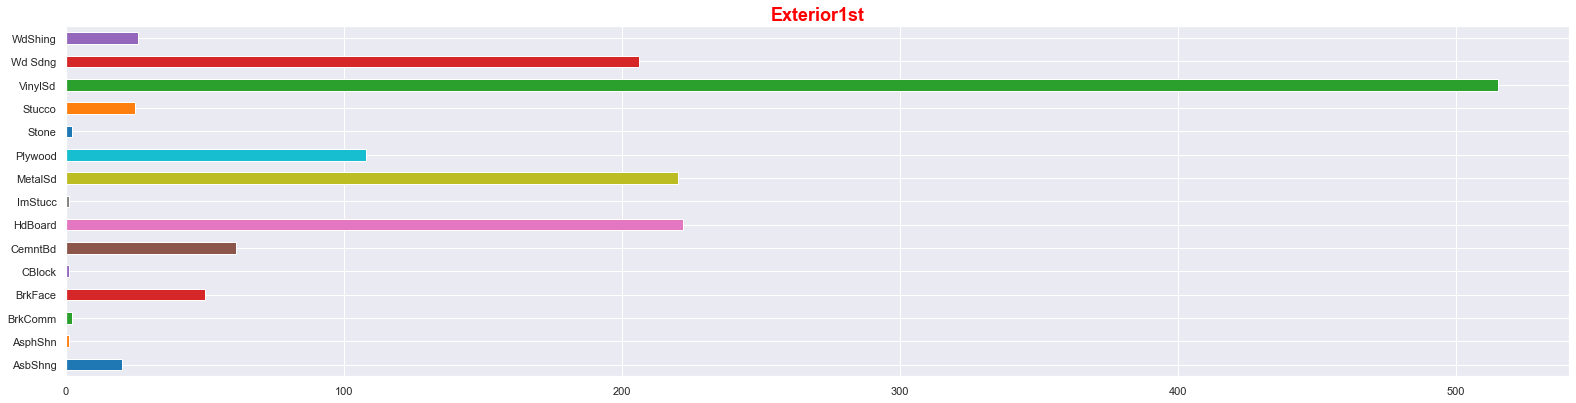

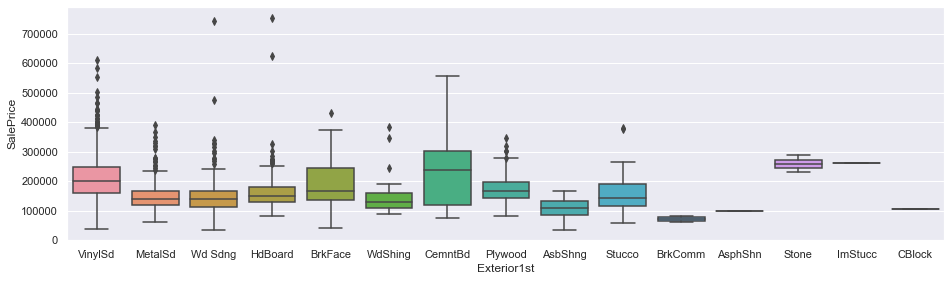

CORRELATION:
Exterior1st and SalePrice: 0.1


In [38]:
analisis("Exterior1st")

#### 25.Exterior2nd
*Exterior covering on house (if more than one material):*

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
 I consider it does not show a hierarchy among the variables.

Replacing NaN values with the mode:

In [39]:
data.Exterior2nd.fillna(data.Exterior2nd.mode().iloc[0],inplace=True)

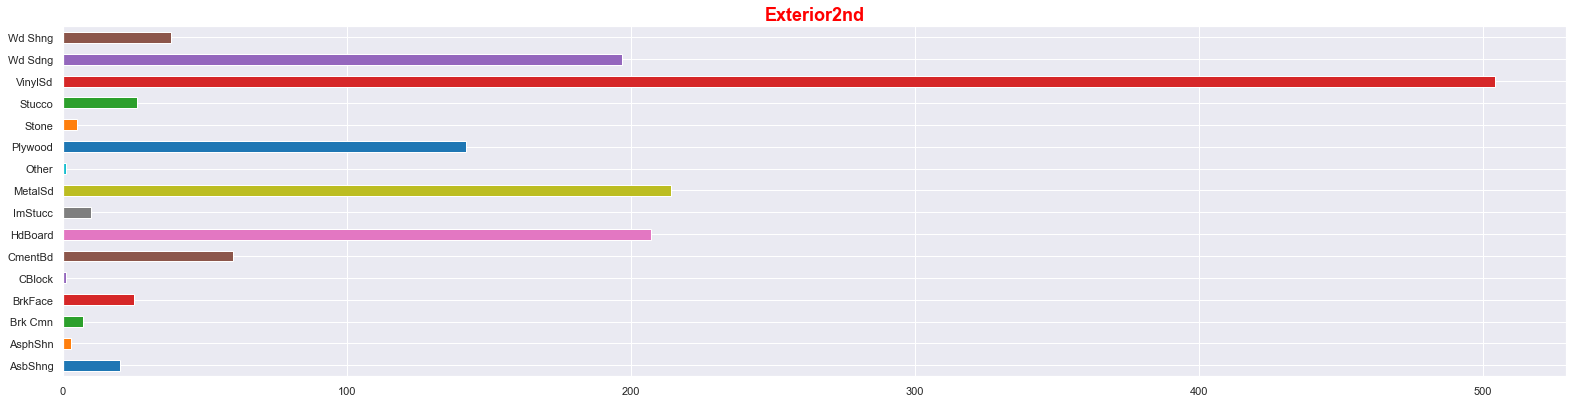

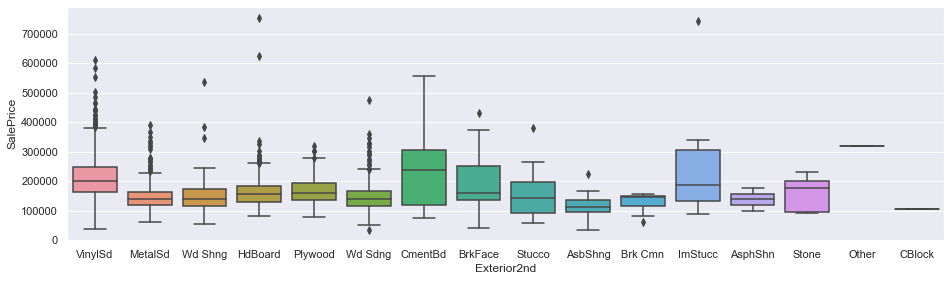

CORRELATION:
Exterior2nd and SalePrice: 0.1


In [40]:
analisis("Exterior2nd")

#### 26.MasVnrType
*Masonry veneer type:*

       BrkCmn	Brick Common
       BrkFace   Brick Face
       CBlock	Cinder Block
       None	  None
       Stone	 Stone
I consider it does not show a hierarchy among the variables.

Replacing NaN values with `None`:

In [41]:
data.MasVnrType.fillna('None',inplace=True)

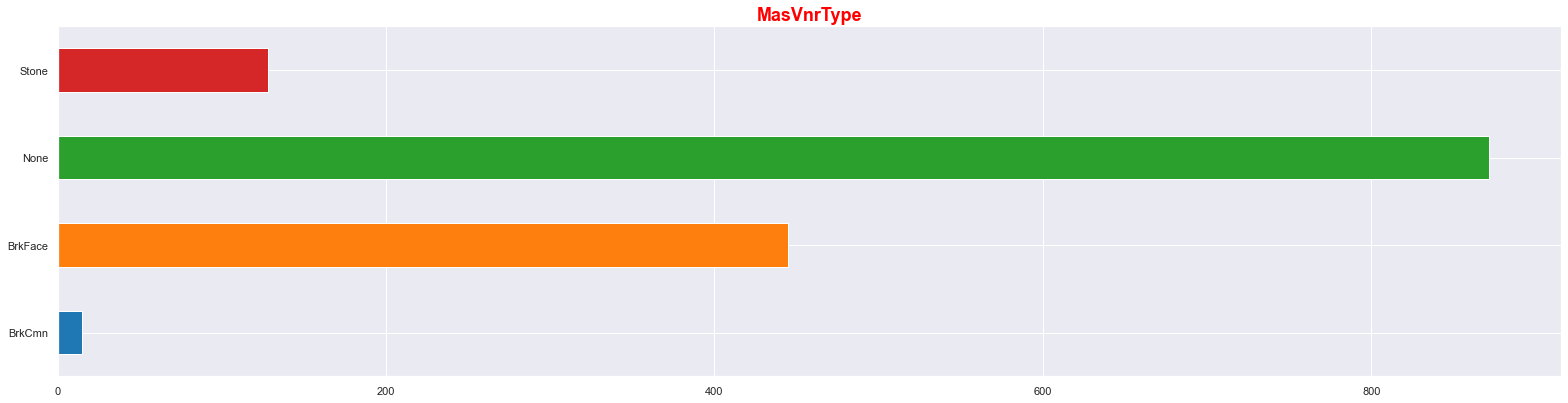

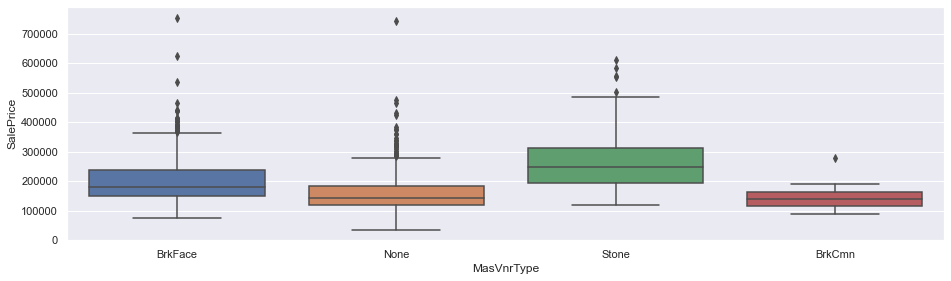

CORRELATION:
MasVnrType and SalePrice: 0.02


In [42]:
analisis("MasVnrType")

#### 27.MasVnrArea
*Masonry veneer area in square feet.*

Replacing nan values to 0:

In [43]:
data.MasVnrArea.fillna(0,inplace=True)

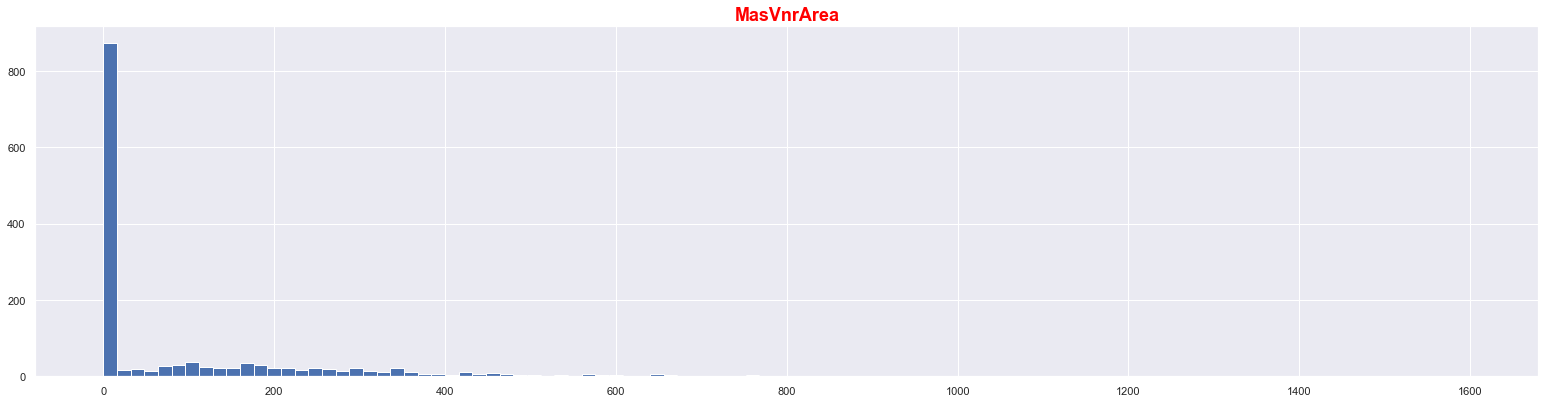

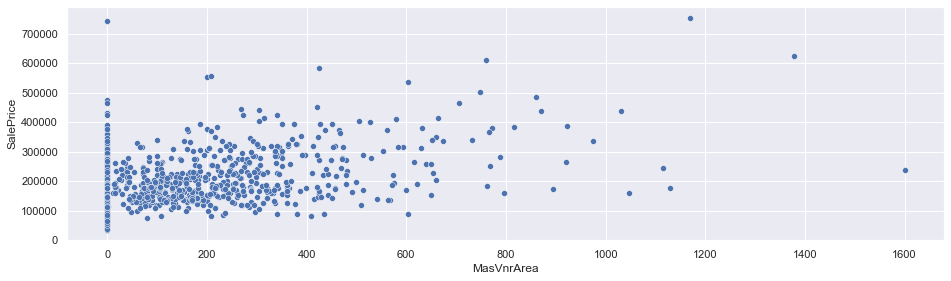

CORRELATION:
MasVnrArea and SalePrice: 0.47


In [44]:
analisis("MasVnrArea")

#### 28.ExterQual
*Evaluates the quality of the material on the exterior:* 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 It shows a hierarchy among the variables.

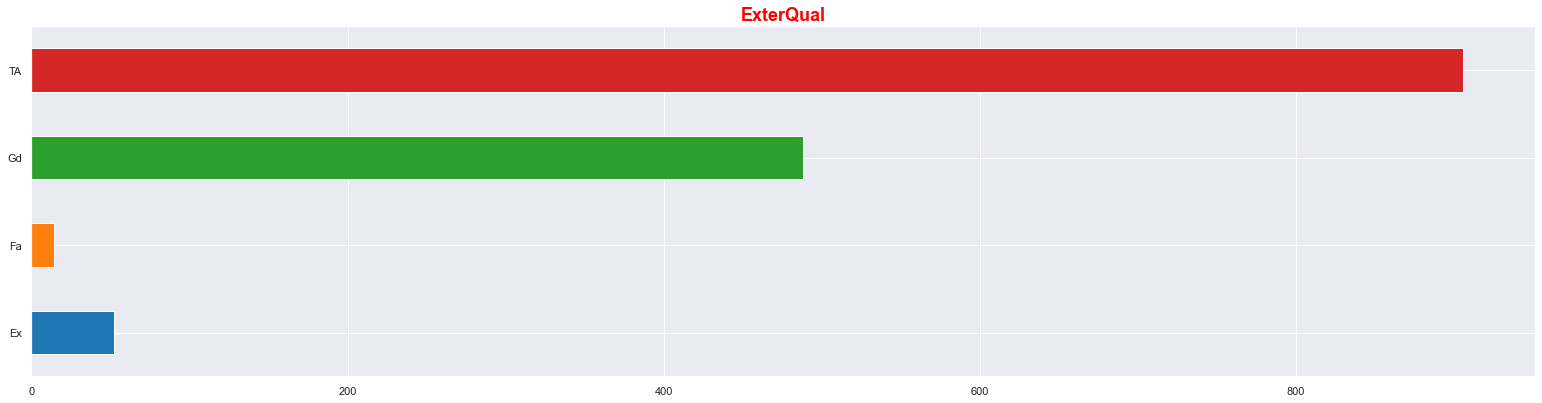

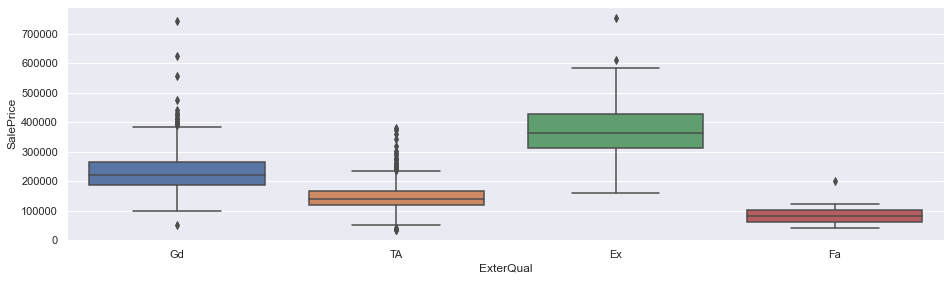

CORRELATION:
ExterQual and SalePrice: -0.64


In [45]:
analisis("ExterQual")

#### 29.ExterCond
*Evaluates the present condition of the material on the exterior:*
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
It shows a hierarchy among the variables.

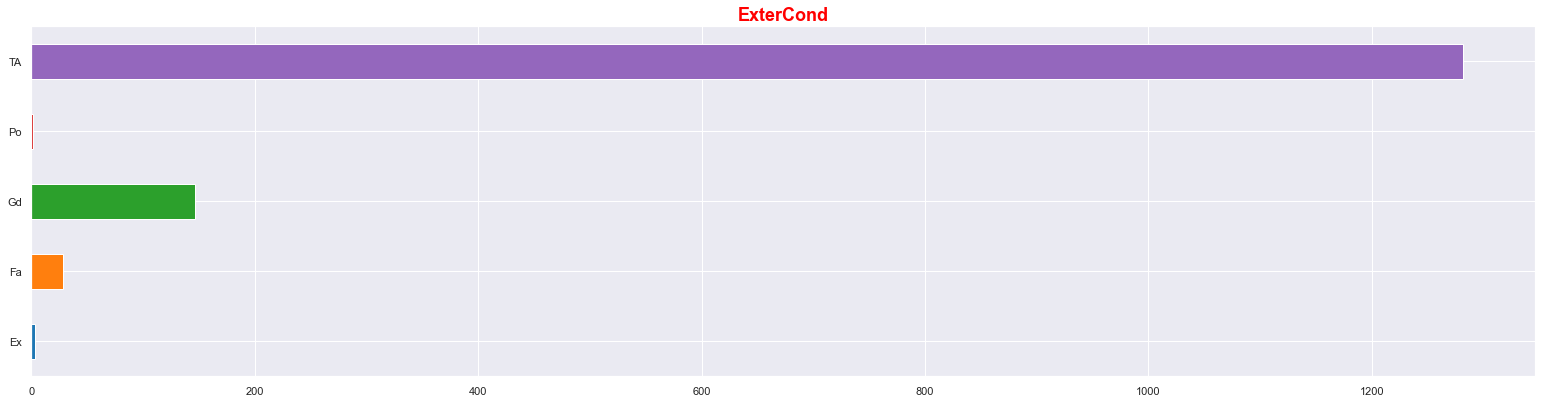

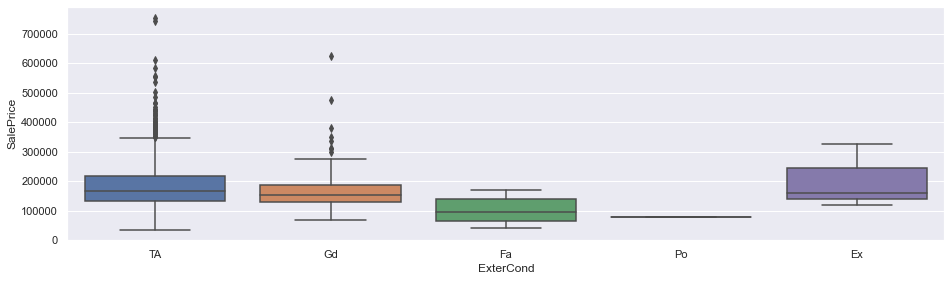

CORRELATION:
ExterCond and SalePrice: 0.12


In [46]:
analisis("ExterCond")

#### 30.Foundation
*Type of foundation:*
		
       BrkTil   Brick & Tile
       CBlock   Cinder Block
       PConc	Poured Contrete	
       Slab	 Slab
       Stone	Stone
       Wood	 Wood
I consider it does not show a hierarchy among the variables.

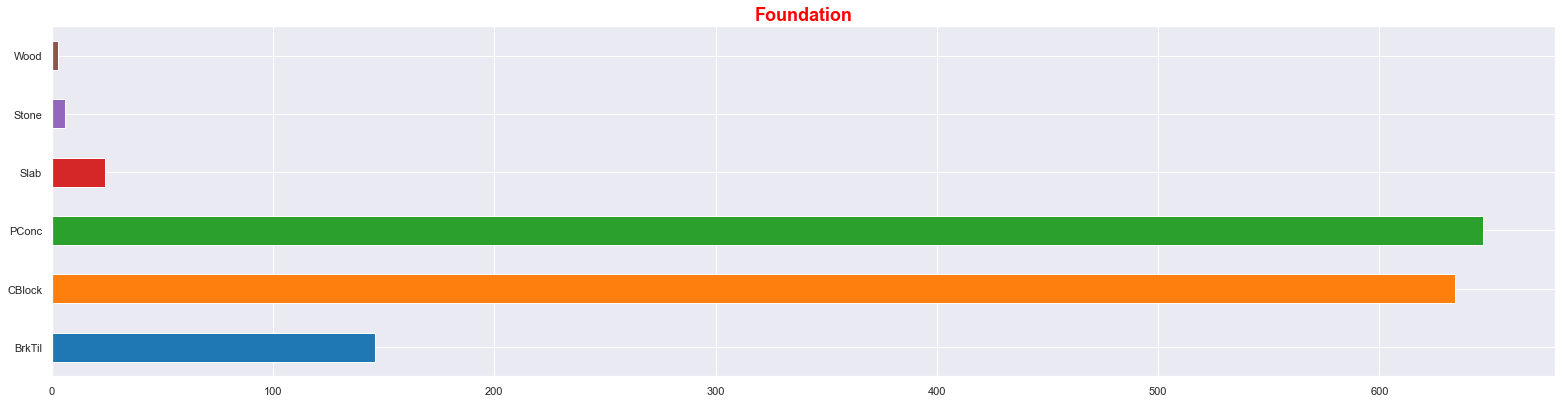

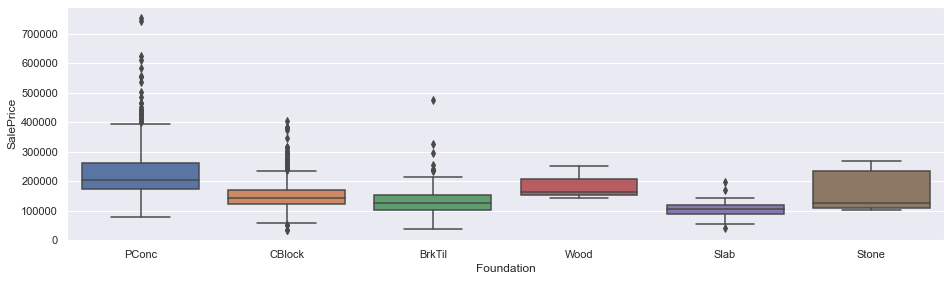

CORRELATION:
Foundation and SalePrice: 0.38


In [47]:
analisis("Foundation")

#### 31.BsmtQual
*Evaluates the height of the basement:*

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
 It shows a hierarchy among the variables.

Replacing NaN values with `NoBa`:

In [48]:
data.BsmtQual.fillna('NoBa',inplace=True)

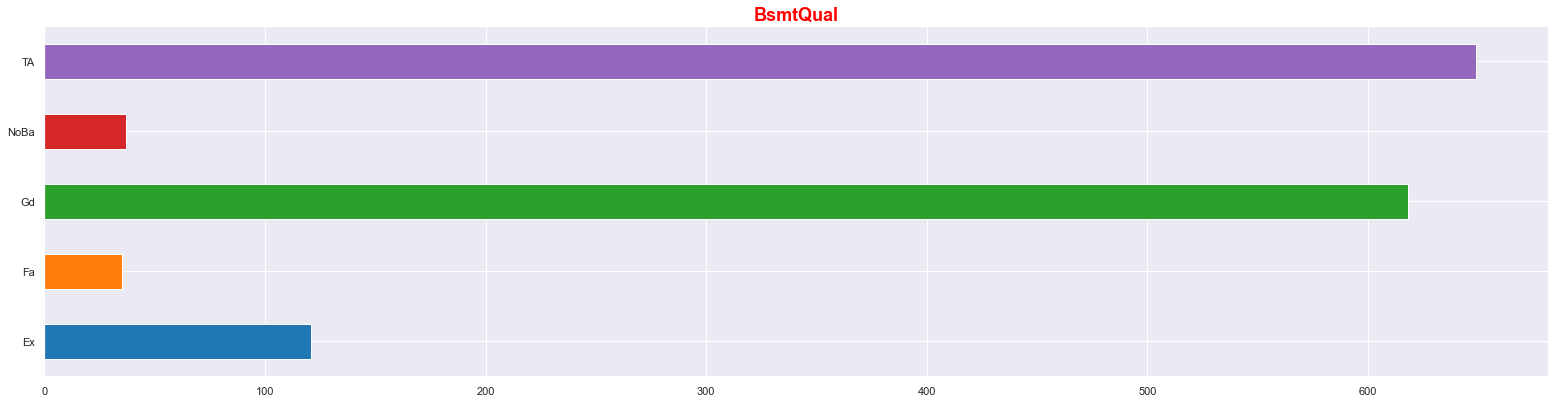

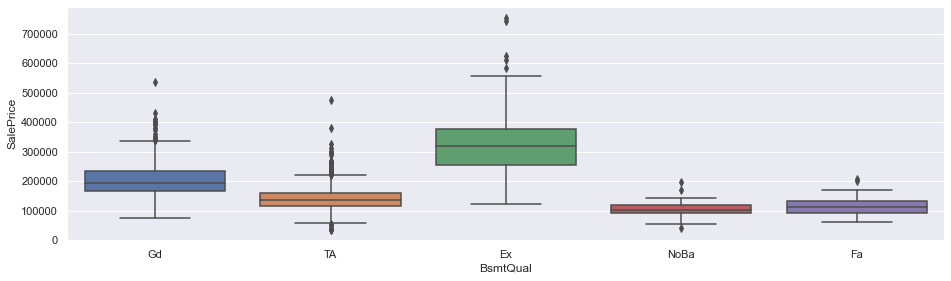

CORRELATION:
BsmtQual and SalePrice: -0.59


In [49]:
analisis("BsmtQual")

#### 32.BsmtCond
*Evaluates the general condition of the basement:*

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
It shows a hierarchy among the variables.

Replacing NaN values with `NoBa`:

In [50]:
data.BsmtCond.fillna('NoBa',inplace=True)

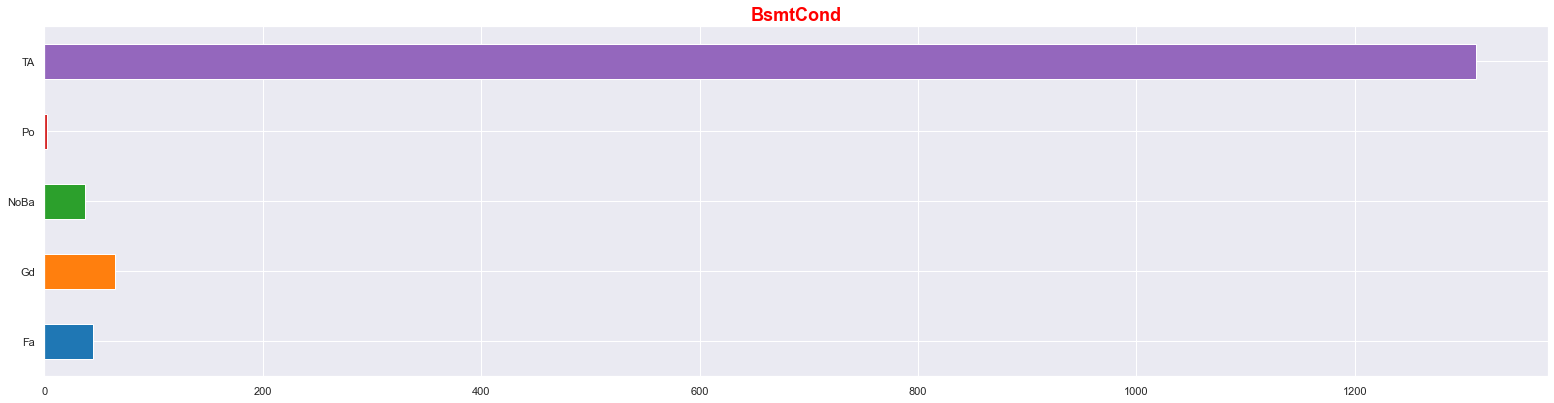

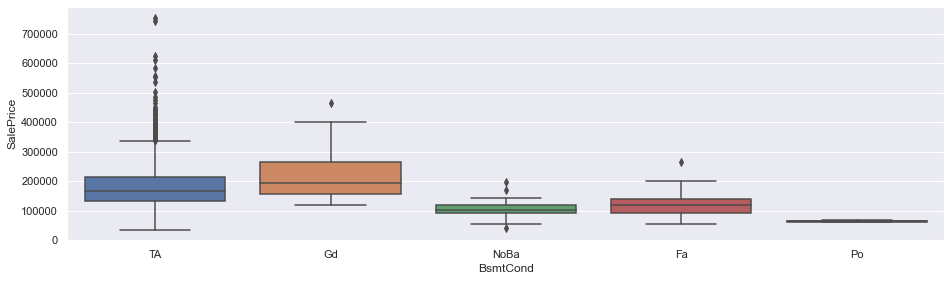

CORRELATION:
BsmtCond and SalePrice: 0.09


In [51]:
analisis("BsmtCond")

#### 33.BsmtExposure
*Refers to walkout or garden level walls:*

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
It shows a hierarchy among the variables.

Replacing NaN values with `NoBa`:

In [52]:
data.BsmtExposure.fillna('NoBa',inplace=True)

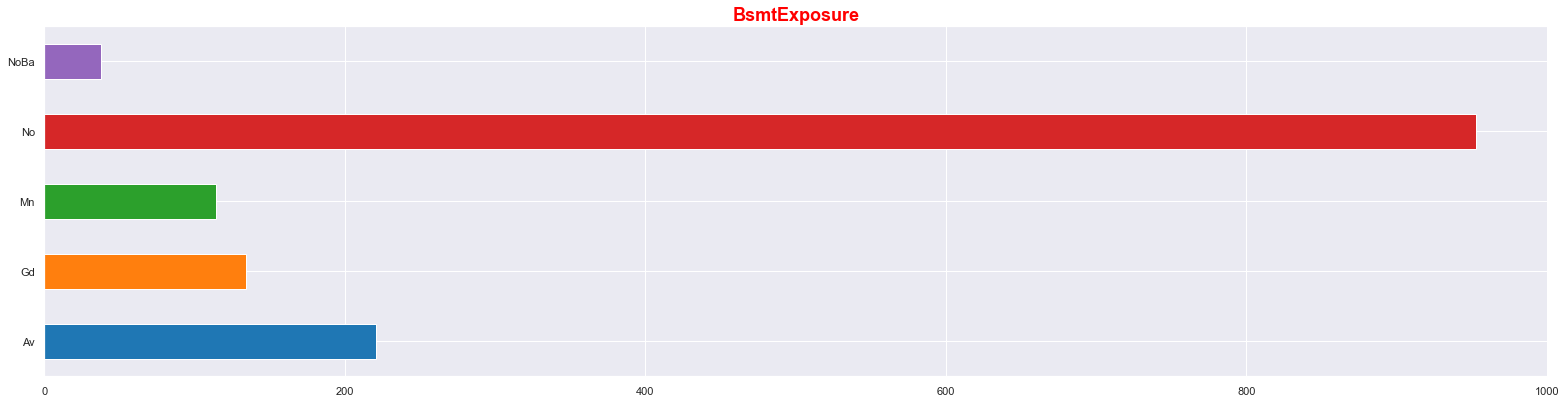

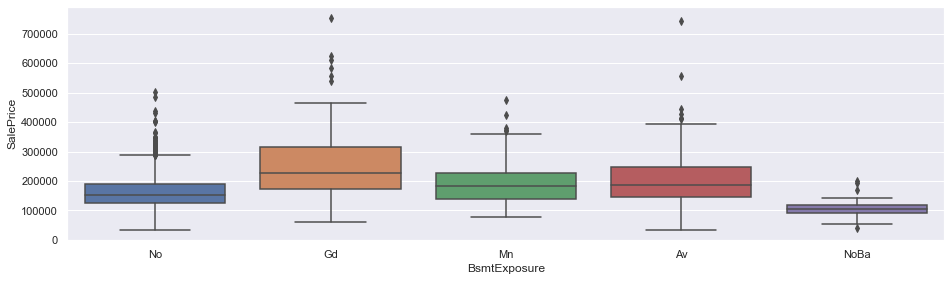

CORRELATION:
BsmtExposure and SalePrice: -0.31


In [53]:
analisis("BsmtExposure")

#### 34.BsmtFinType1
*Rating of basement finished area:*

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	 No Basement
It shows a hierarchy among the variables.

Replacing NaN values with `NoBa`:

In [54]:
data.BsmtFinType1.fillna('NoBa',inplace=True)

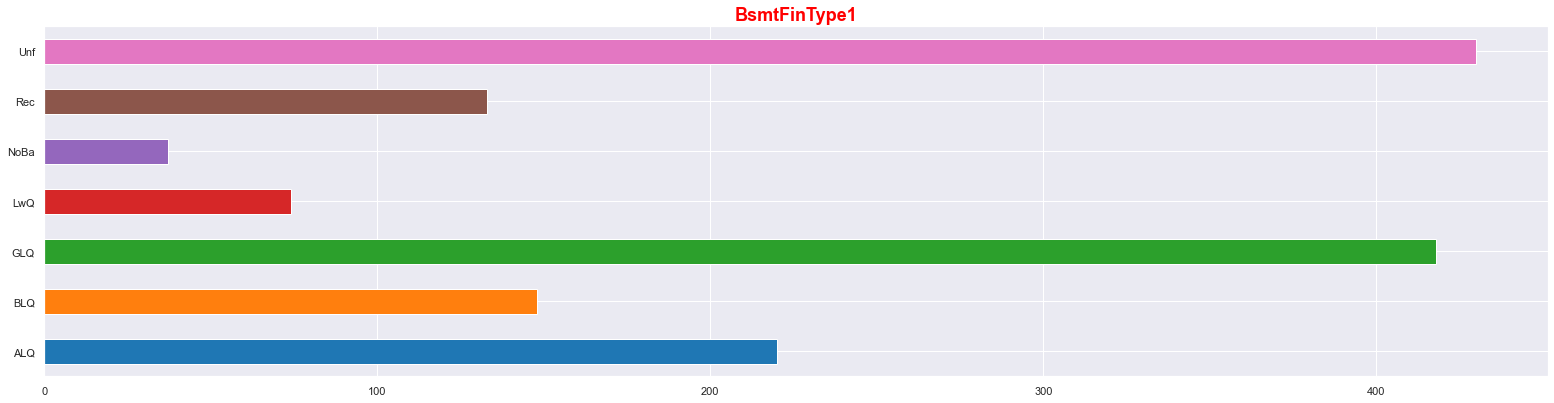

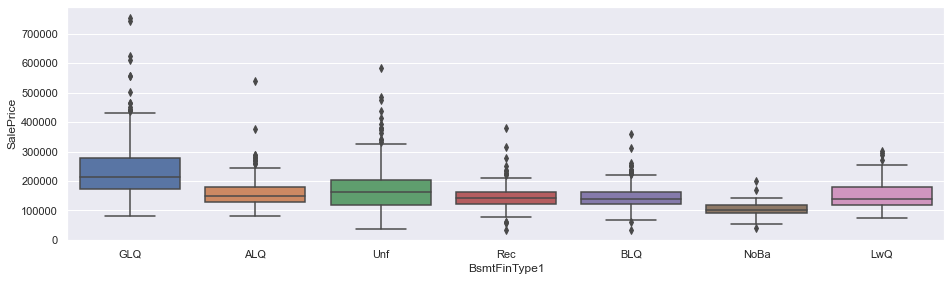

CORRELATION:
BsmtFinType1 and SalePrice: -0.1


In [55]:
analisis("BsmtFinType1")

#### 35.BsmtFinSF1
*Type 1 finished square feet.*<br>

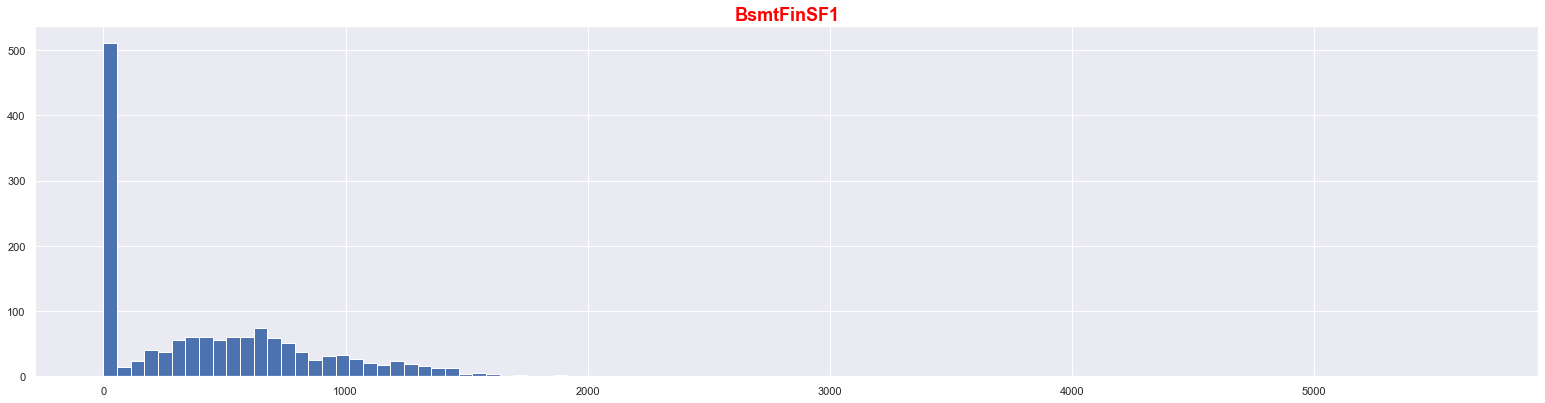

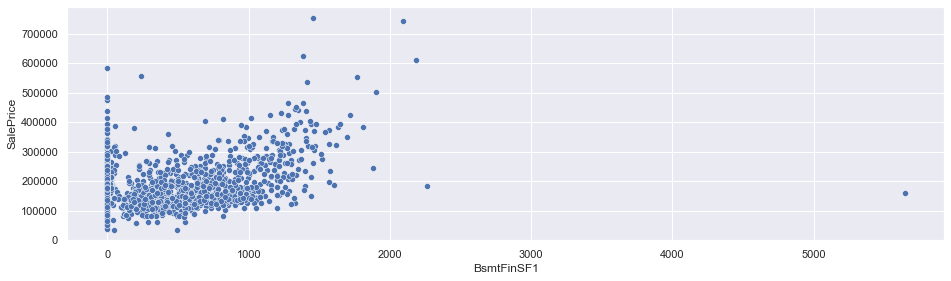

CORRELATION:
BsmtFinSF1 and SalePrice: 0.39


In [56]:
analisis("BsmtFinSF1")

#### 36.BsmtFinType2
*Rating of basement finished area (if multiple types):*

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	 No Basement
It shows a hierarchy among the variables.

Replacing NaN values with `NoBa`:

In [57]:
data.BsmtFinType2.fillna('NoBa',inplace=True)

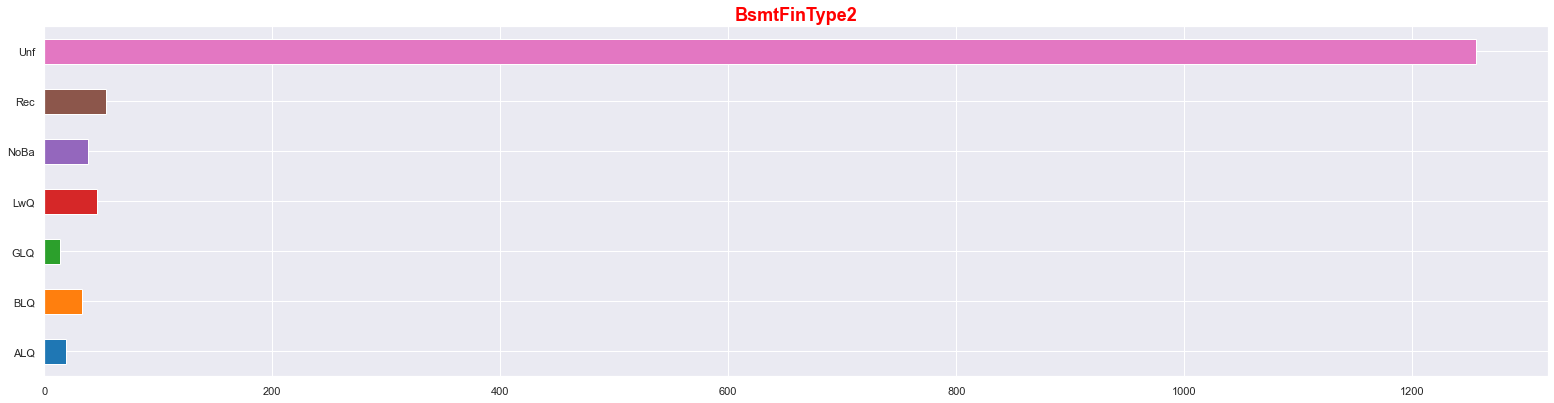

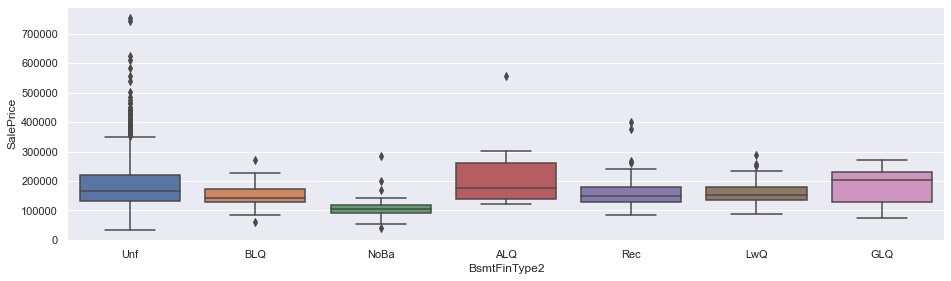

CORRELATION:
BsmtFinType2 and SalePrice: 0.07


In [58]:
analisis("BsmtFinType2")

#### 37.BsmtFinSF2
*Type 2 finished square feet.*

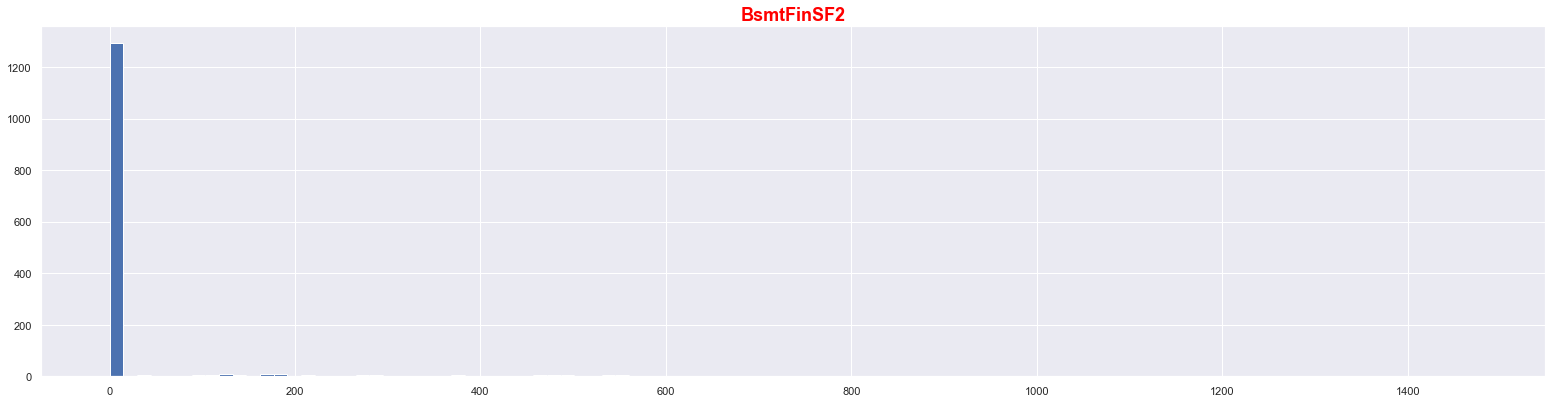

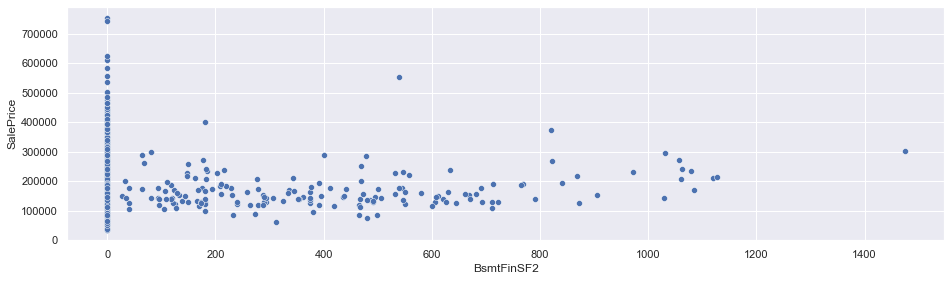

CORRELATION:
BsmtFinSF2 and SalePrice: -0.01


In [59]:
analisis("BsmtFinSF2")

#### 38.BsmtUnfSF
*Unfinished square feet of basement area.*<br>

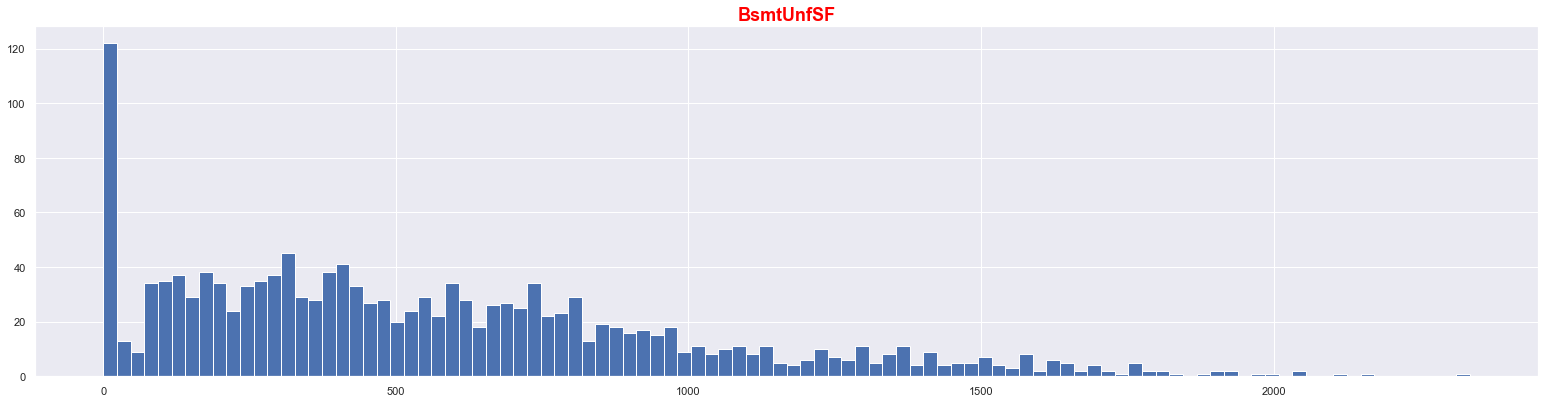

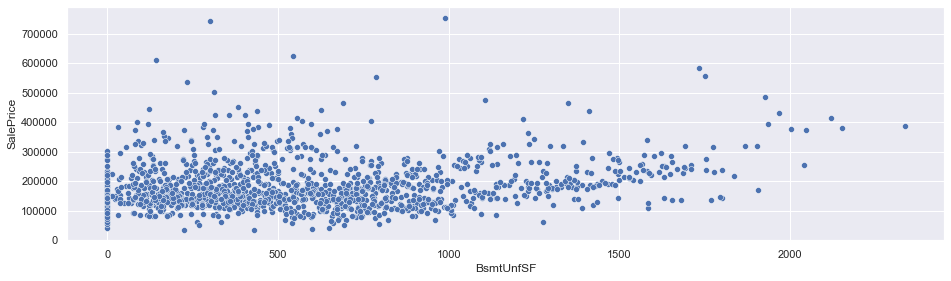

CORRELATION:
BsmtUnfSF and SalePrice: 0.21


In [60]:
analisis("BsmtUnfSF")

#### 39.TotalBsmtSF
*Total square feet of basement area.*<br>

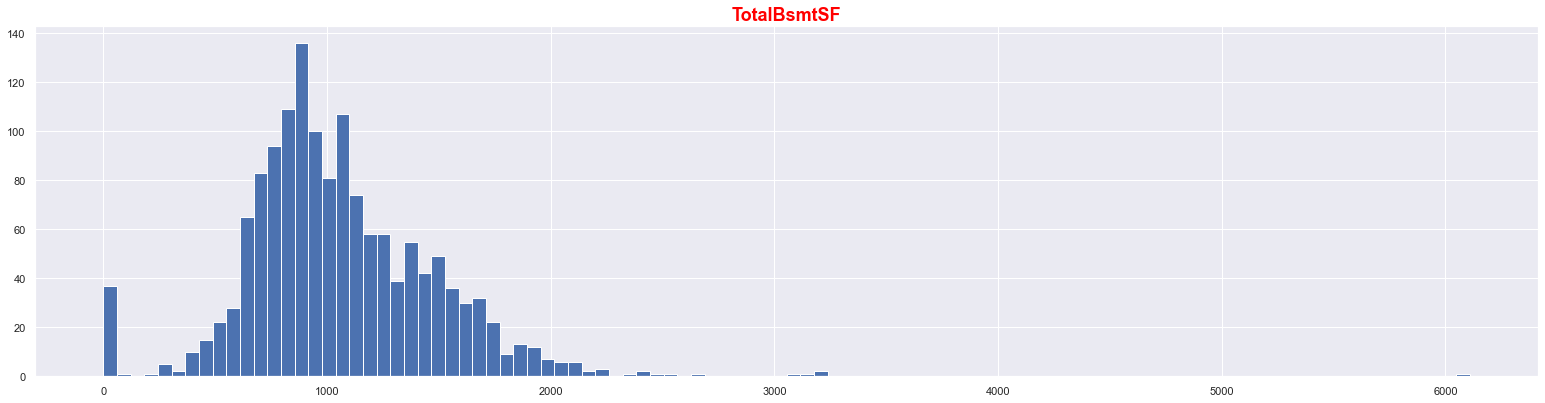

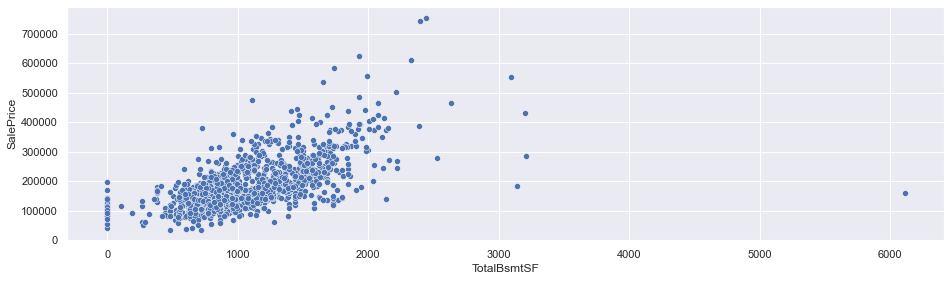

CORRELATION:
TotalBsmtSF and SalePrice: 0.61


In [61]:
analisis("TotalBsmtSF")

#### 40.Heating
*Type of heating:*
		
       Floor   Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
I consider it does not show a hierarchy among the variables.

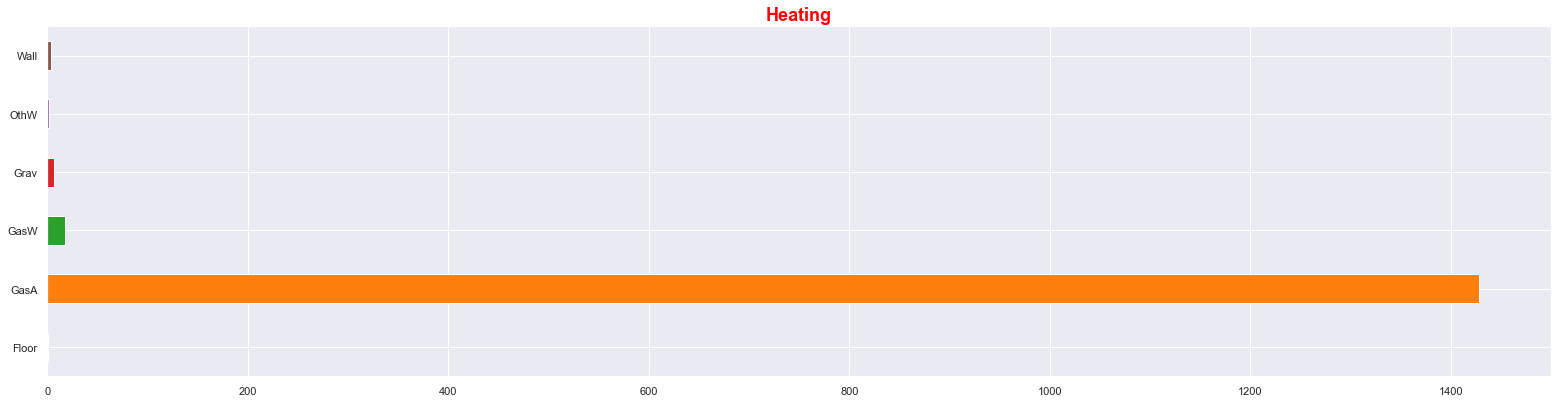

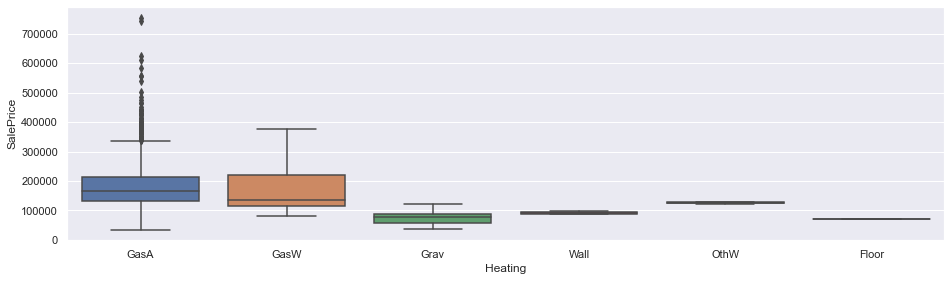

CORRELATION:
Heating and SalePrice: -0.1


In [62]:
analisis("Heating")

#### 41.HeatingQC
*Heating quality and condition:*

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
It shows a hierarchy among the variables.

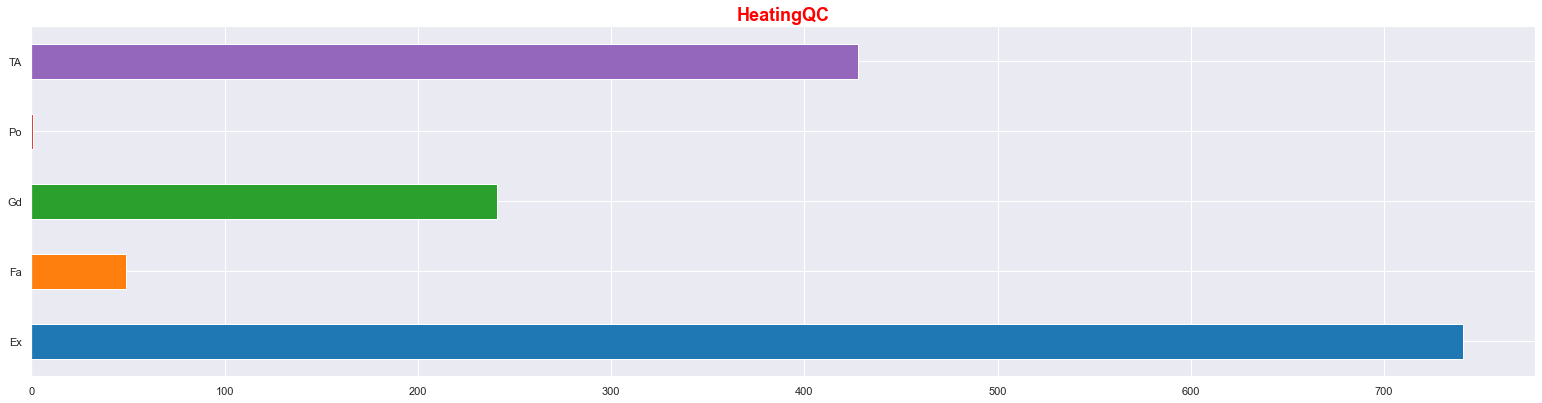

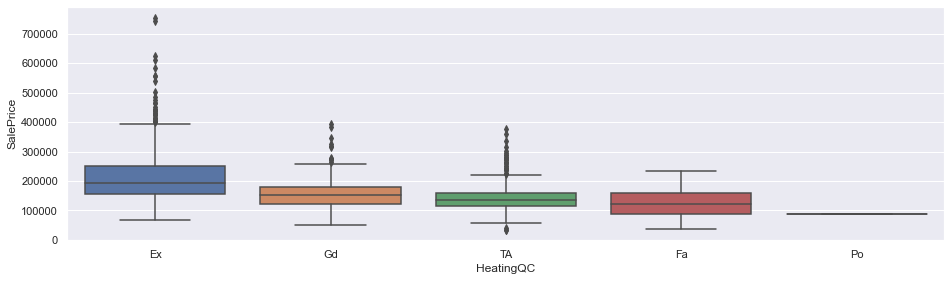

CORRELATION:
HeatingQC and SalePrice: -0.4


In [63]:
analisis("HeatingQC")

#### 42.CentralAir
*Central air conditioning:*

       N	No
       Y	Yes

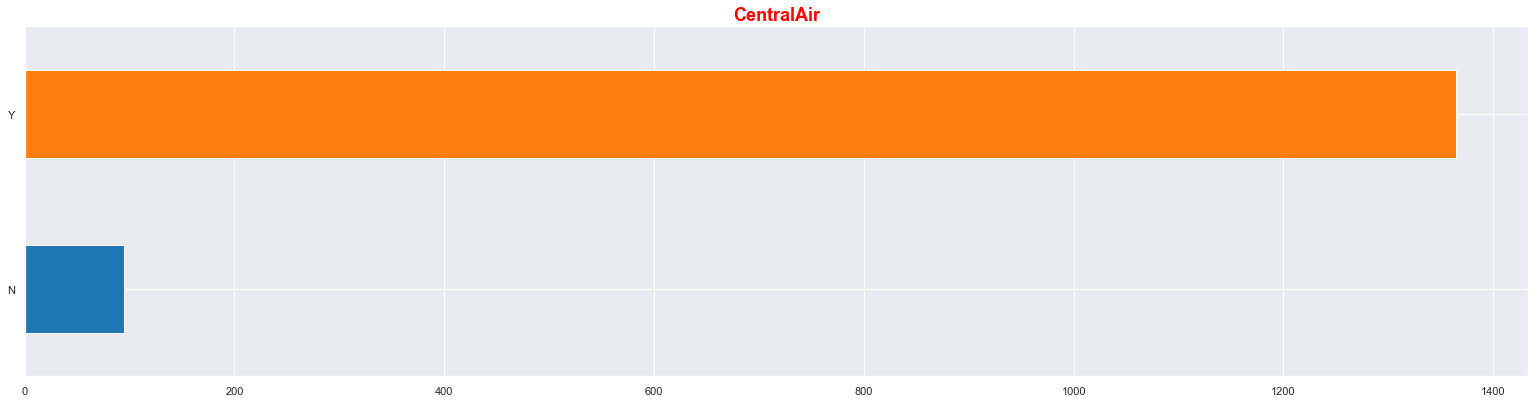

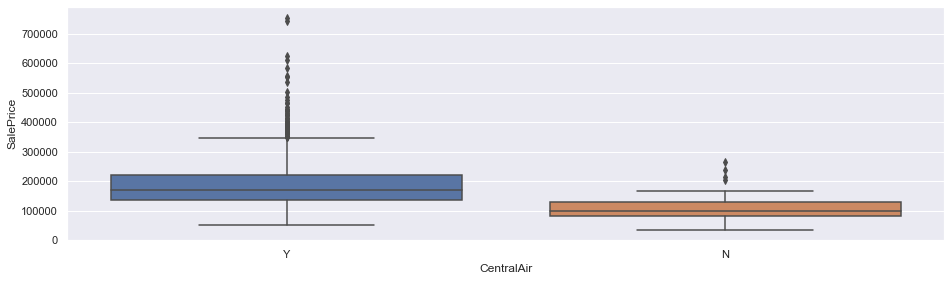

CORRELATION:
CentralAir and SalePrice: 0.25


In [64]:
analisis("CentralAir")

#### 43.Electrical
*Electrical system:*

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	  Mixed
 I consider it does not show a hierarchy among the variables.<br><br>
 Replacing NA values with the mode

In [65]:
data.Electrical.fillna(data.Electrical.mode()[0],inplace=True)

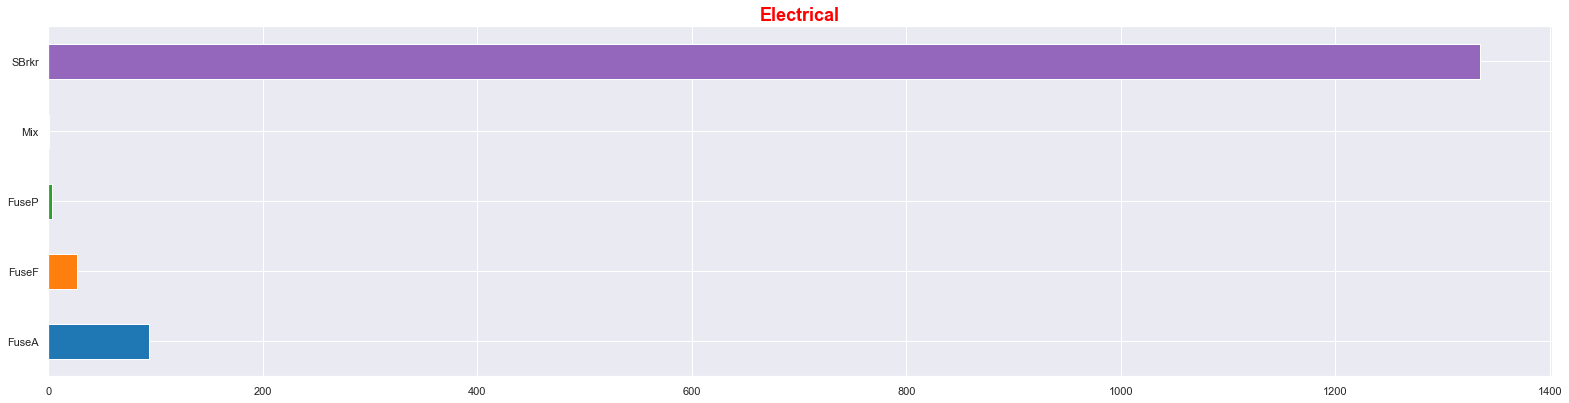

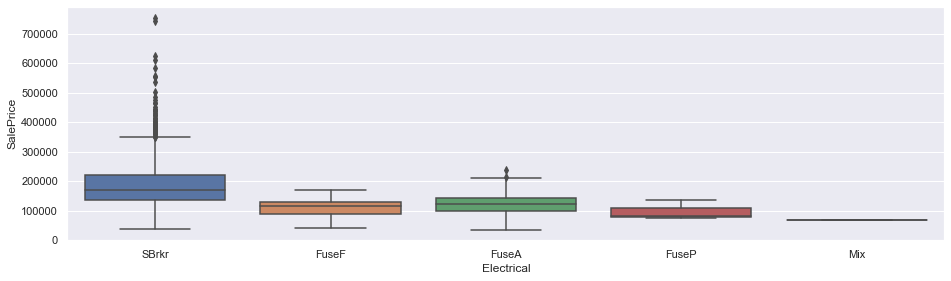

CORRELATION:
Electrical and SalePrice: 0.23


In [66]:
analisis("Electrical")

#### 44.1stFlrSF
*First Floor square feet.*

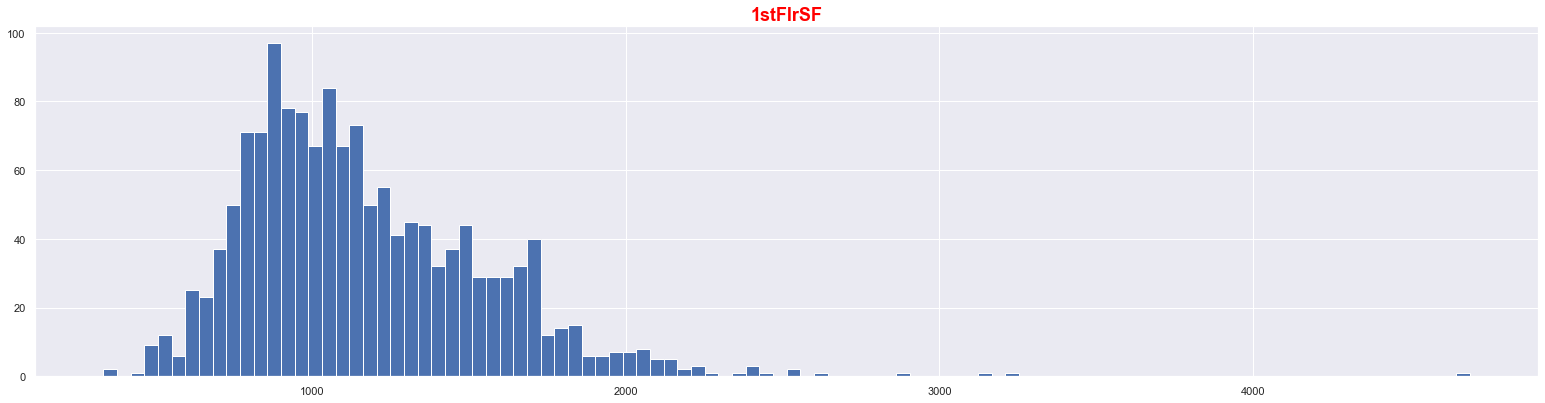

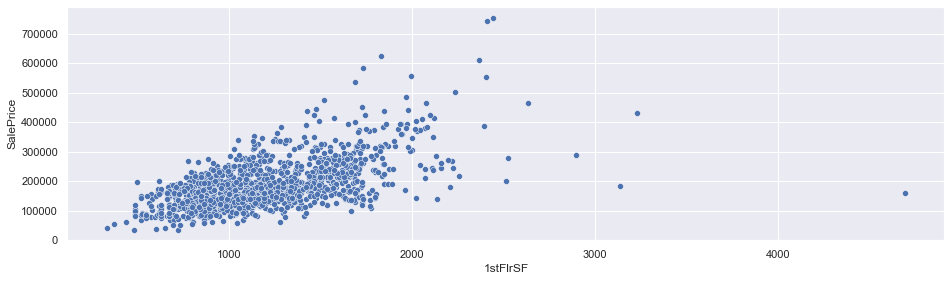

CORRELATION:
1stFlrSF and SalePrice: 0.61


In [67]:
analisis("1stFlrSF")

#### 45.2ndFlrSF
*Second floor square feet.*

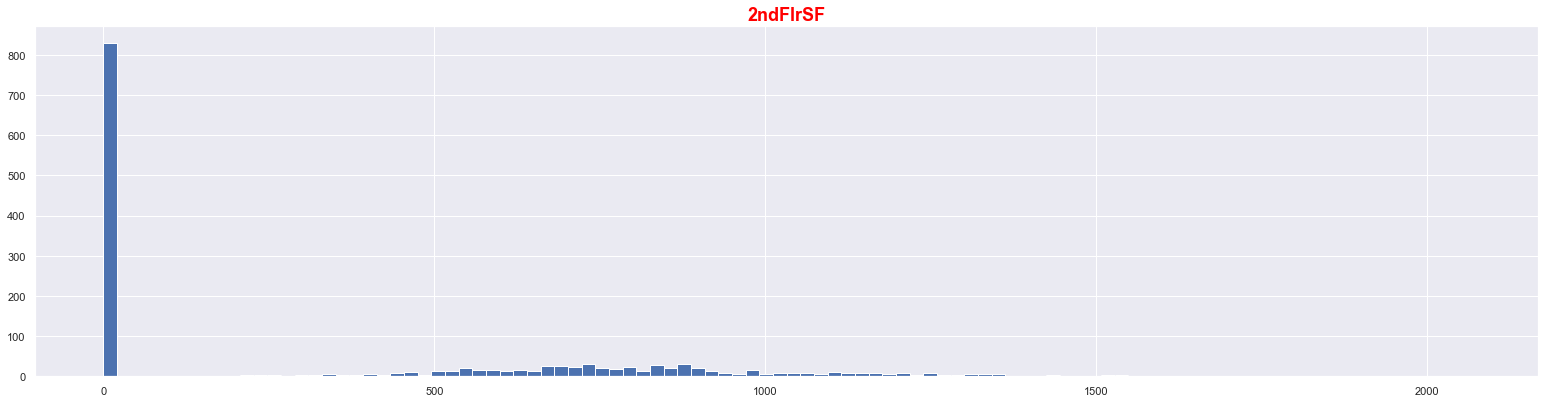

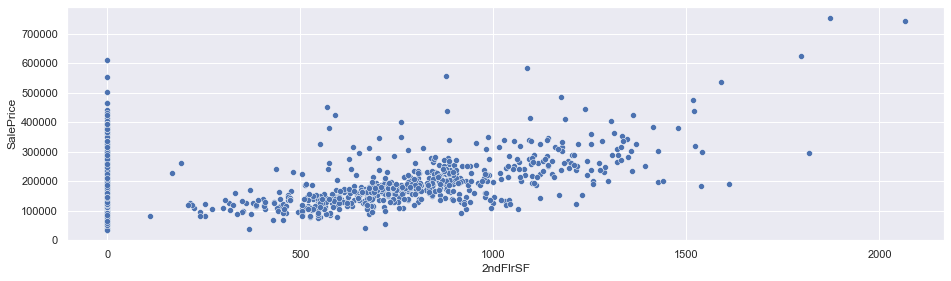

CORRELATION:
2ndFlrSF and SalePrice: 0.32


In [68]:
analisis("2ndFlrSF")

#### 46.LowQualFinSF
*Low quality finished square feet (all floors).*

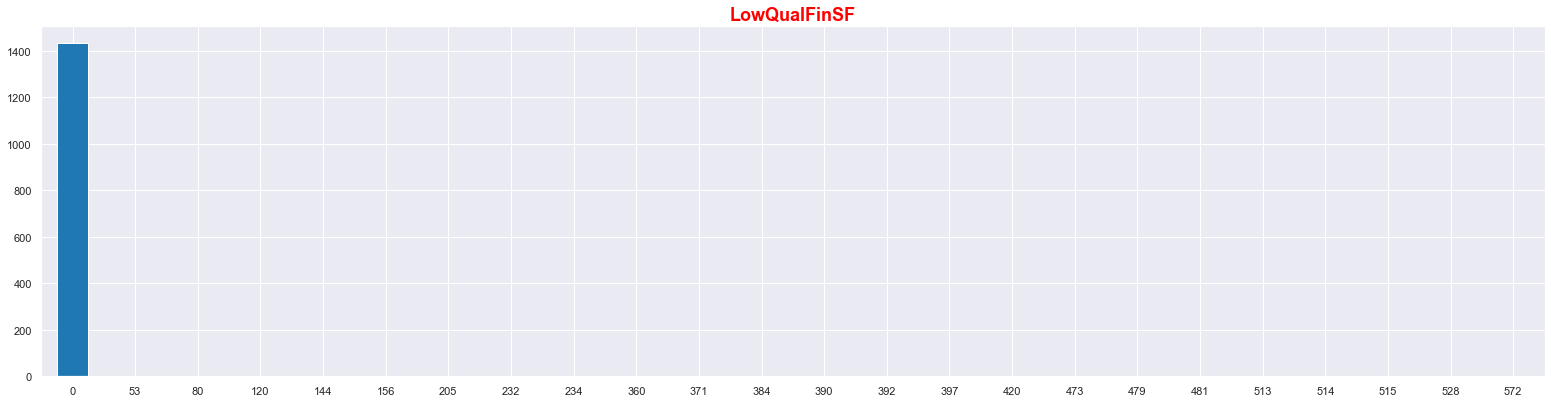

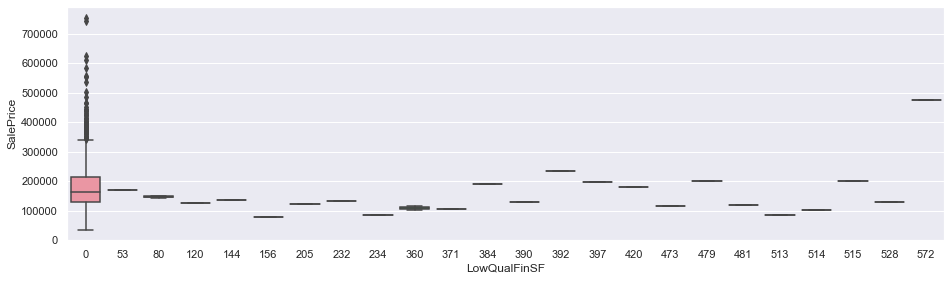

CORRELATION:
LowQualFinSF and SalePrice: -0.03


In [69]:
analisis("LowQualFinSF")

#### 47.GrLivArea
*Above grade (ground) living area square feet.*

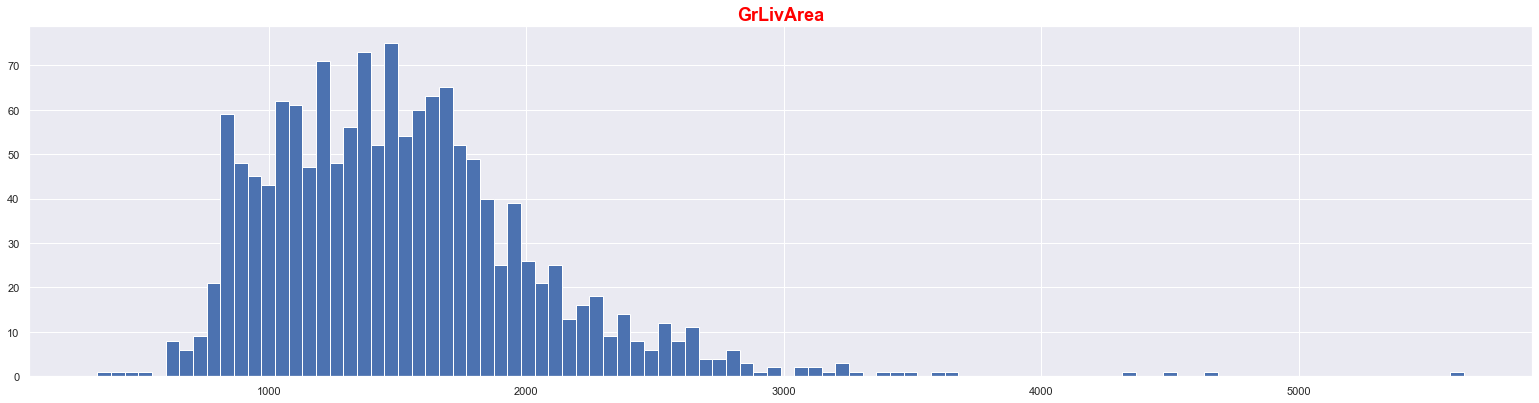

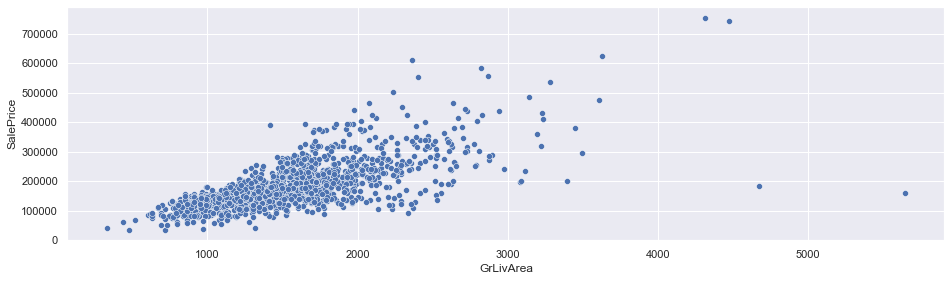

CORRELATION:
GrLivArea and SalePrice: 0.71


In [70]:
analisis("GrLivArea")

#### 48.BsmtFullBath
*Basement full bathrooms.*

Replacing NaN values with the mode:

In [71]:
data.BsmtFullBath.fillna(data.BsmtFullBath.mode().iloc[0],inplace=True)

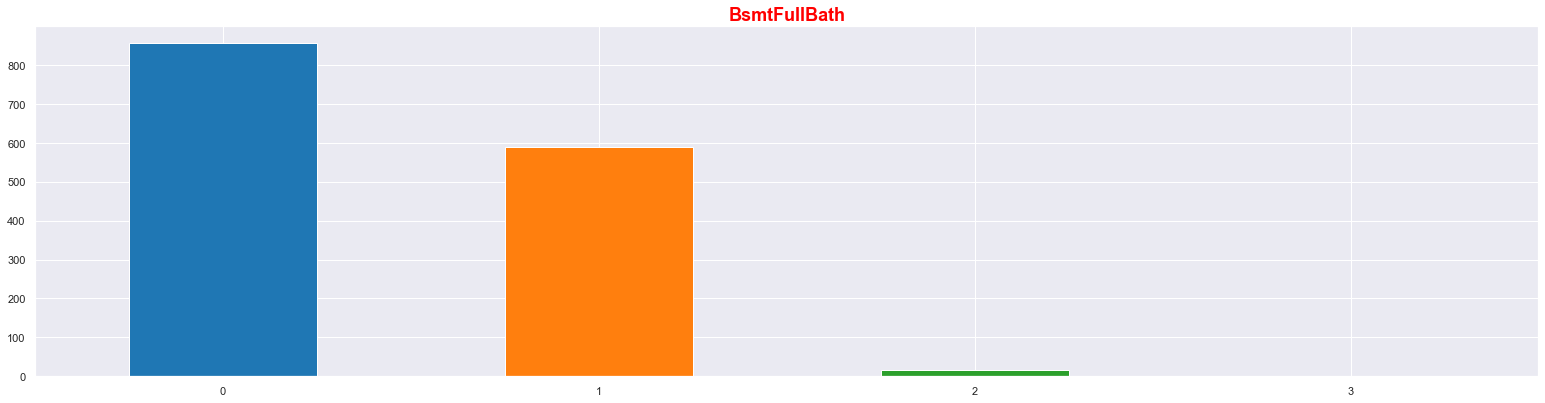

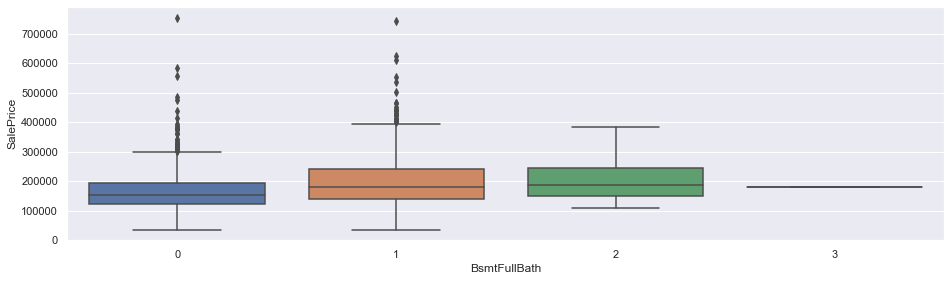

CORRELATION:
BsmtFullBath and SalePrice: 0.23


In [72]:
analisis("BsmtFullBath")

#### 49.BsmtHalfBath
*Basement half bathrooms.*

Replacing nan values with the mode:

In [73]:
data.BsmtHalfBath.fillna(data.BsmtHalfBath.mode().iloc[0],inplace=True)

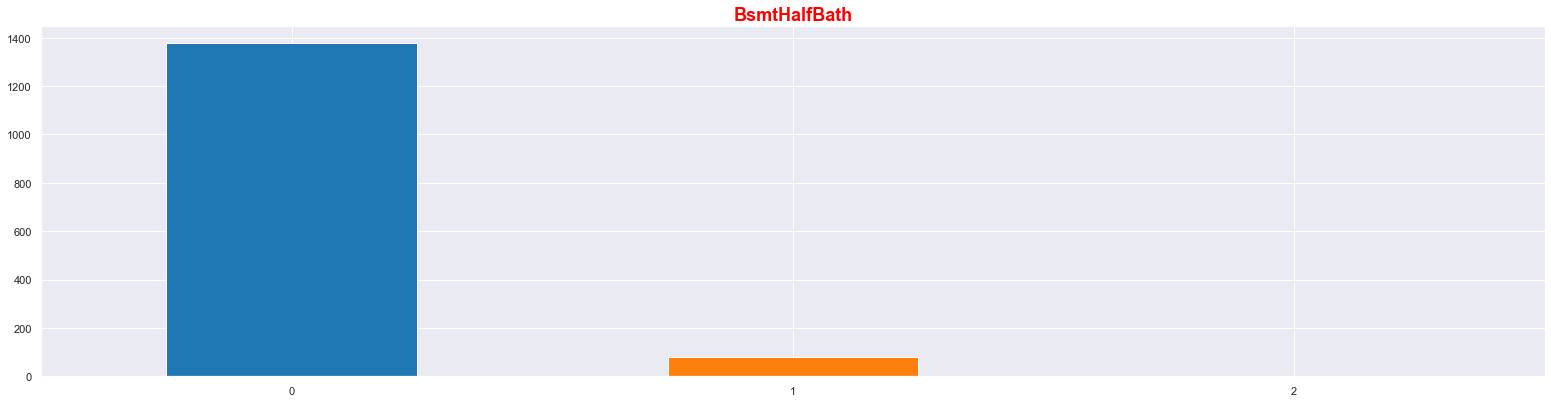

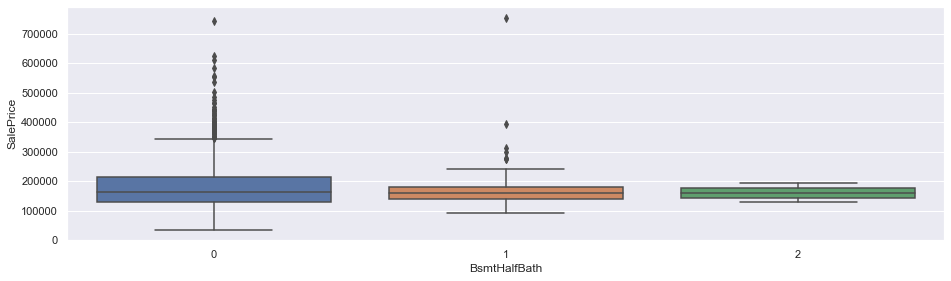

CORRELATION:
BsmtHalfBath and SalePrice: -0.02


In [74]:
analisis("BsmtHalfBath")

#### 50.FullBath
*Full bathrooms above grade.*

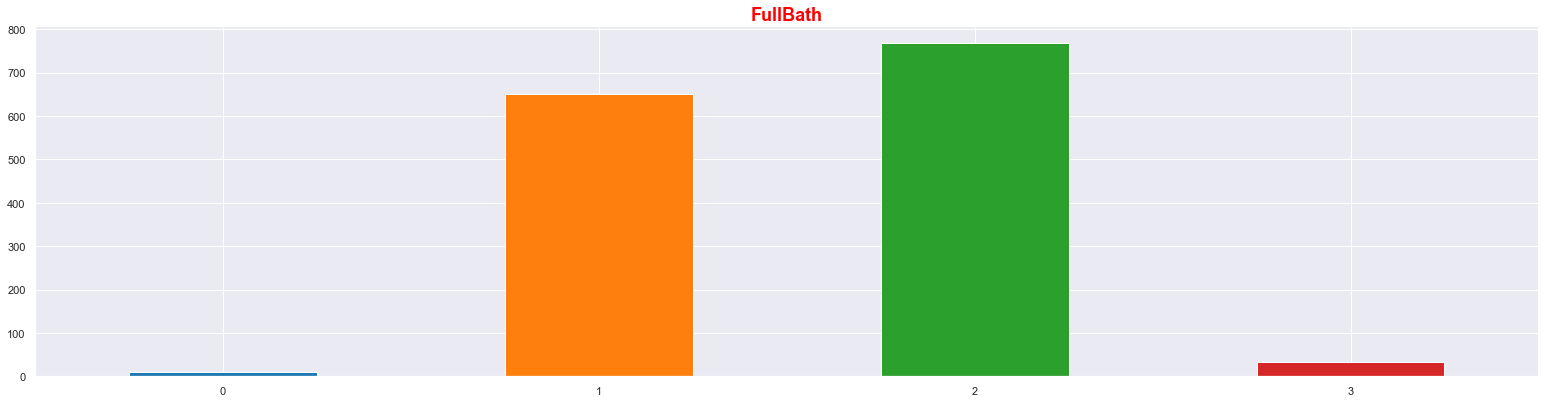

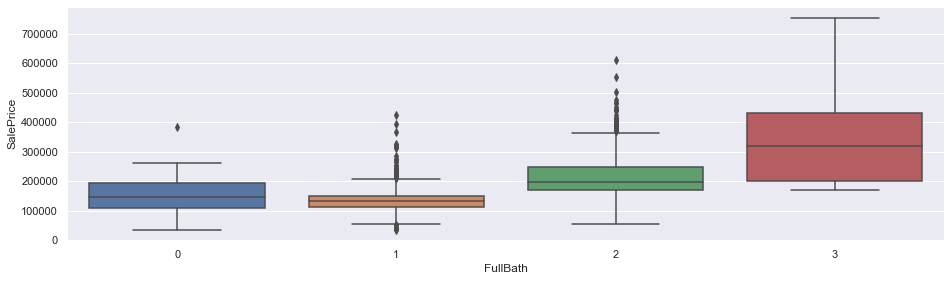

CORRELATION:
FullBath and SalePrice: 0.56


In [75]:
analisis("FullBath")

#### 51.HalfBath
*Half baths above grade.*

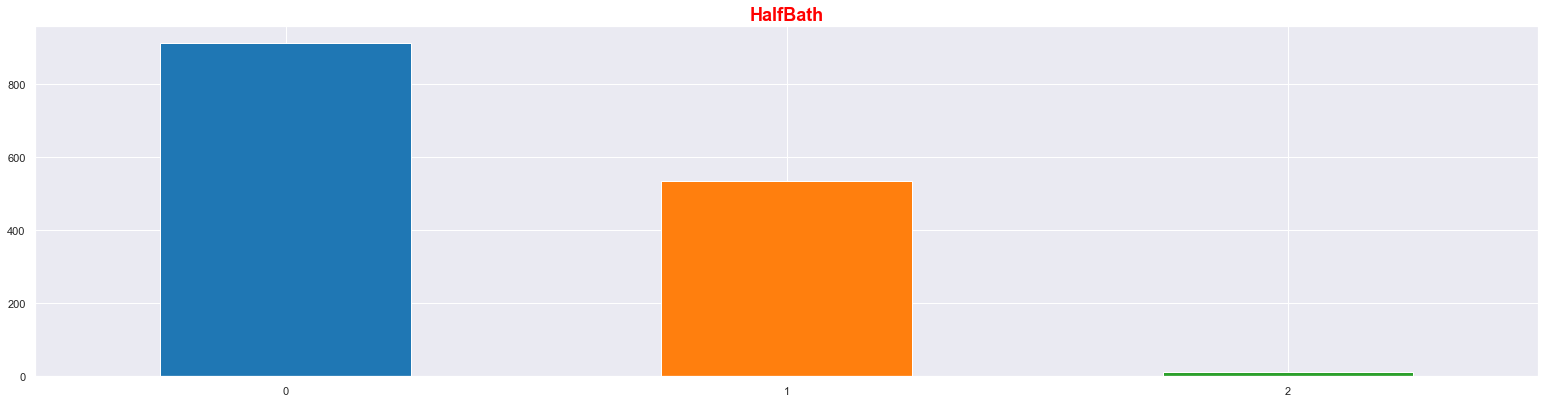

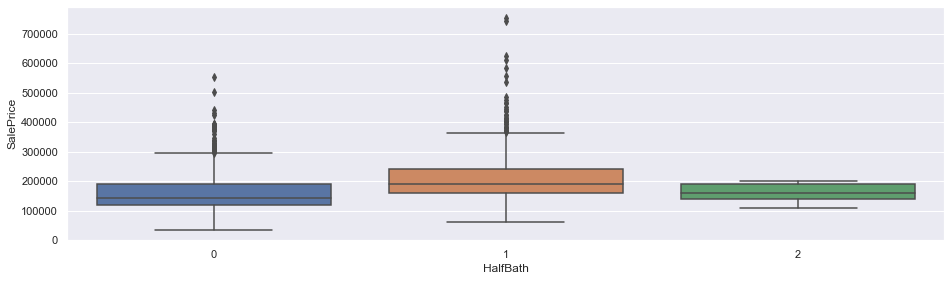

CORRELATION:
HalfBath and SalePrice: 0.28


In [76]:
analisis("HalfBath")

#### 52.BedroomAbvGr
*Bedrooms above grade (does NOT include basement bedrooms).*

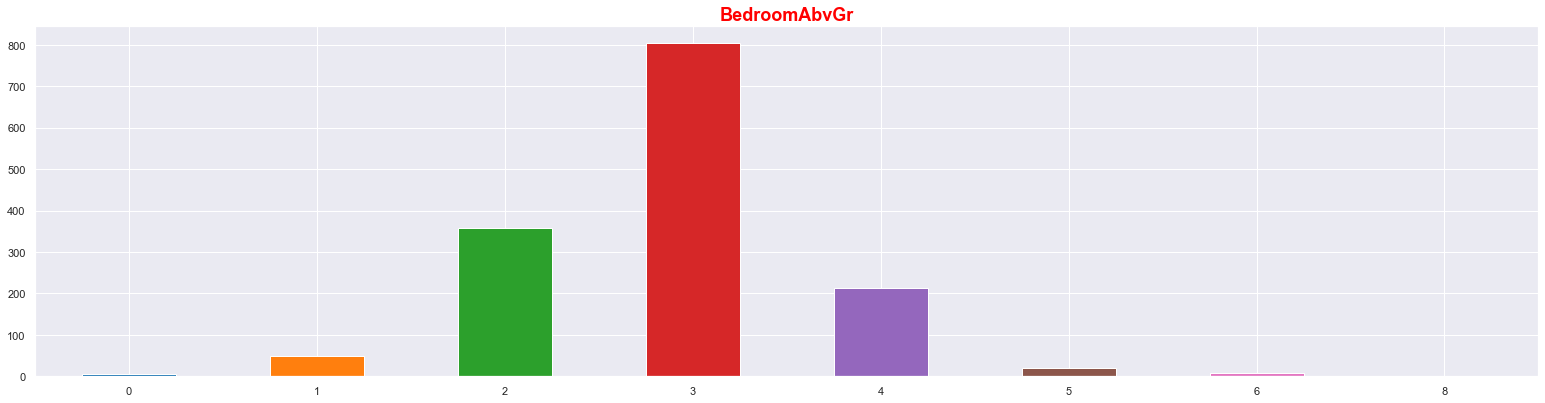

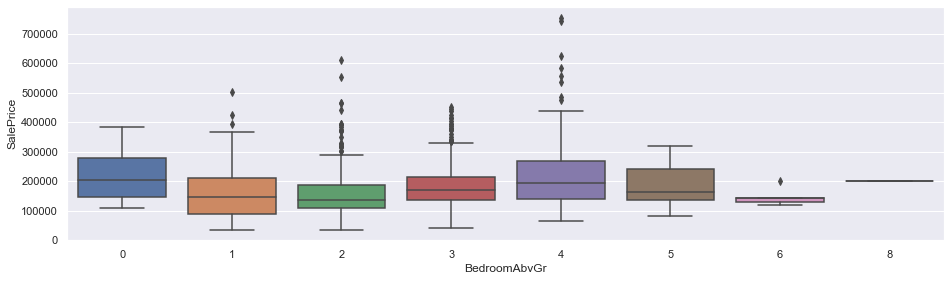

CORRELATION:
BedroomAbvGr and SalePrice: 0.17


In [77]:
analisis("BedroomAbvGr")

#### 53.KitchenAbvGr
*Kitchens above grade.*

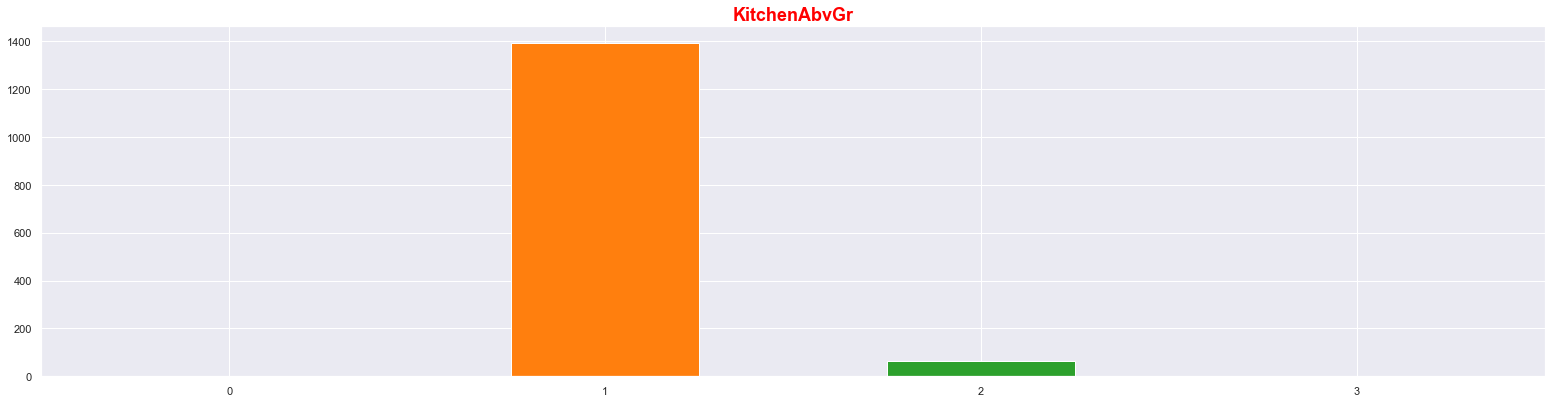

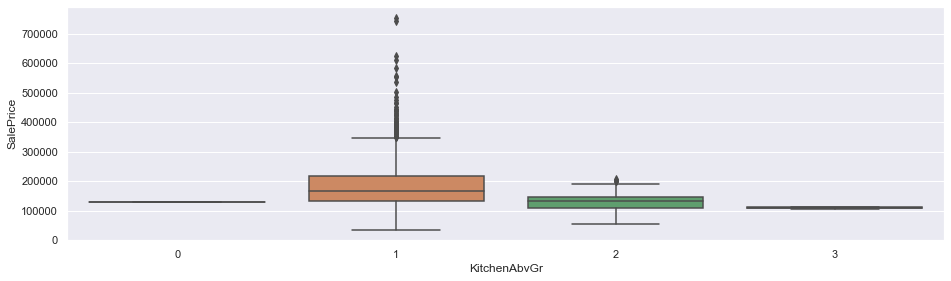

CORRELATION:
KitchenAbvGr and SalePrice: -0.14


In [78]:
analisis("KitchenAbvGr")

#### 54.KitchenQual
*Kitchen quality:*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
It shows a hierarchy among the variables.

Replacing NaN values with mode:

In [79]:
data.KitchenQual.fillna(data.KitchenQual.mode().iloc[0],inplace=True)

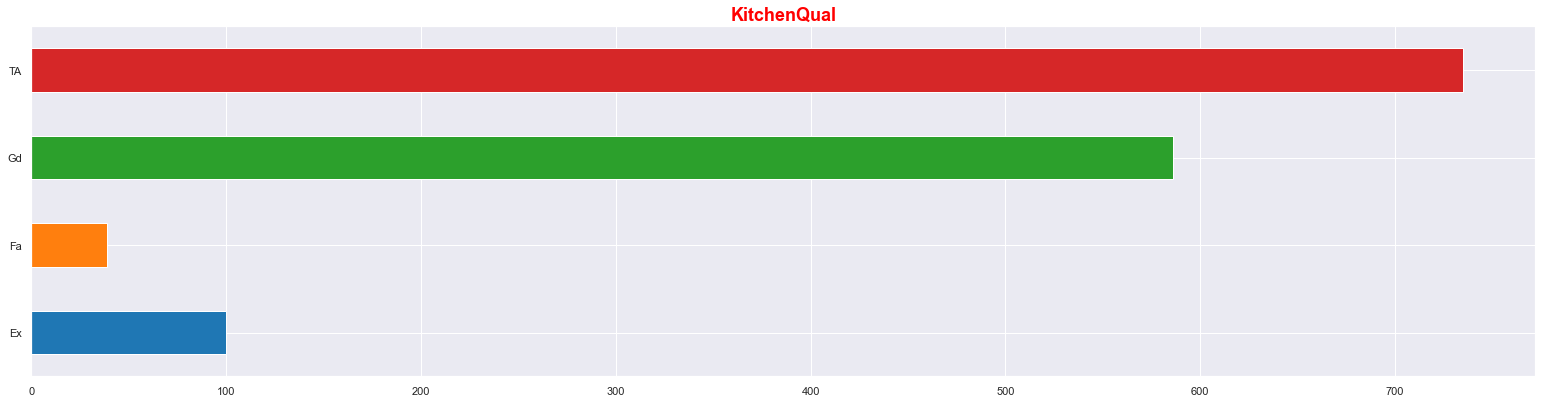

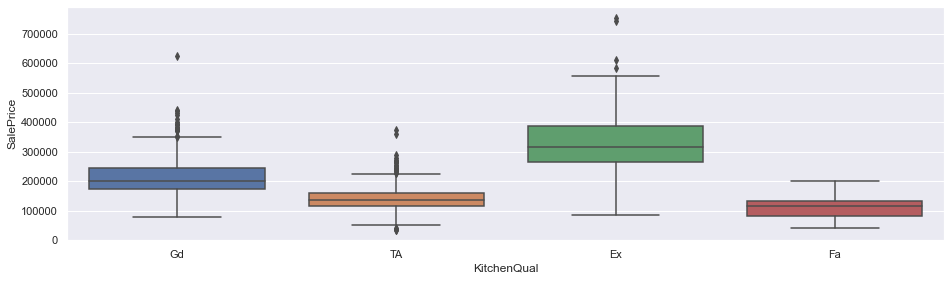

CORRELATION:
KitchenQual and SalePrice: -0.59


In [80]:
analisis("KitchenQual")

#### 55.TotRmsAbvGrd
*Total rooms above grade (does not include bathrooms).*

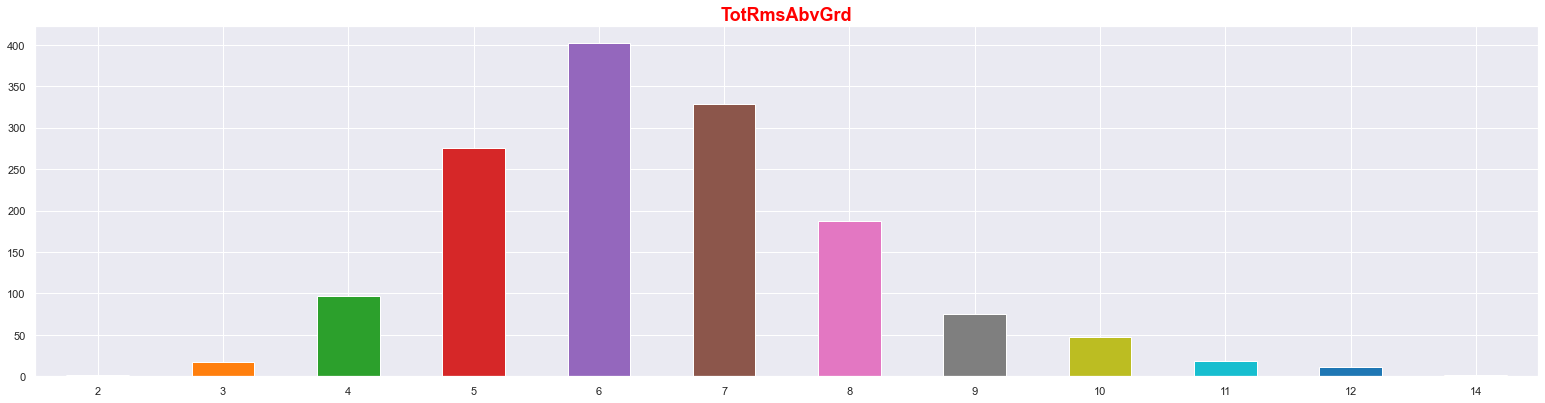

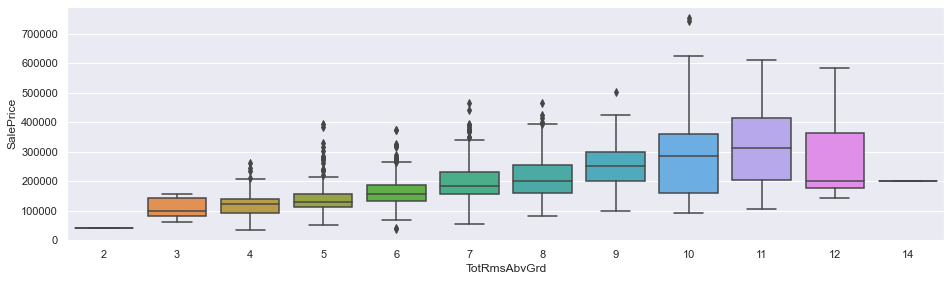

CORRELATION:
TotRmsAbvGrd and SalePrice: 0.53


In [81]:
analisis("TotRmsAbvGrd")

#### 56.Functional
*Home functionality (Assume typical unless deductions are warranted):*

       Typ	Typical Functionality
       Min1   Minor Deductions 1
       Min2   Minor Deductions 2
       Mod	Moderate Deductions
       Maj1   Major Deductions 1
       Maj2   Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
It shows a hierarchy among the variables.

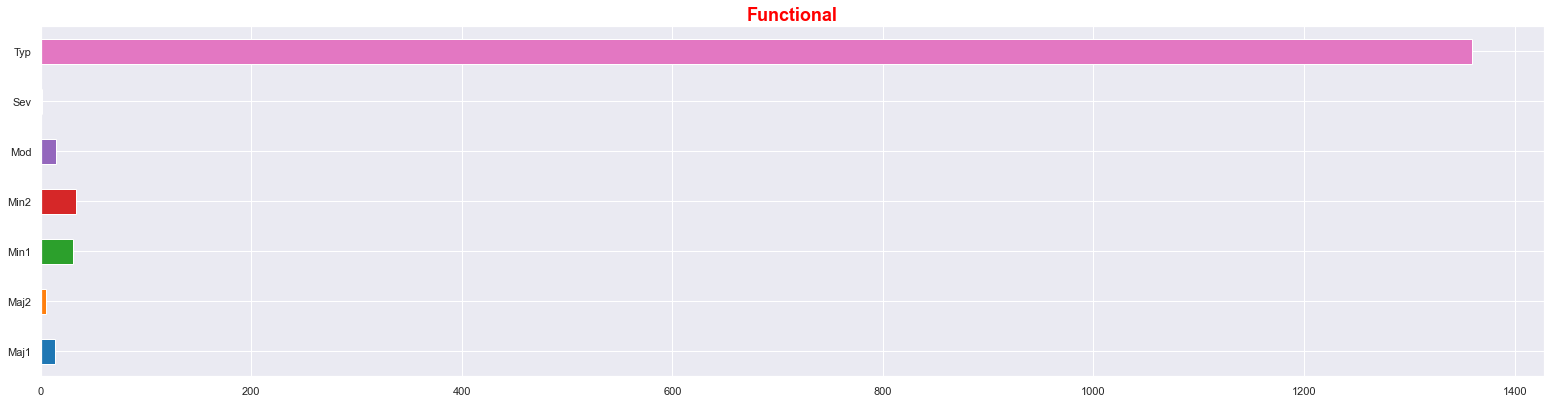

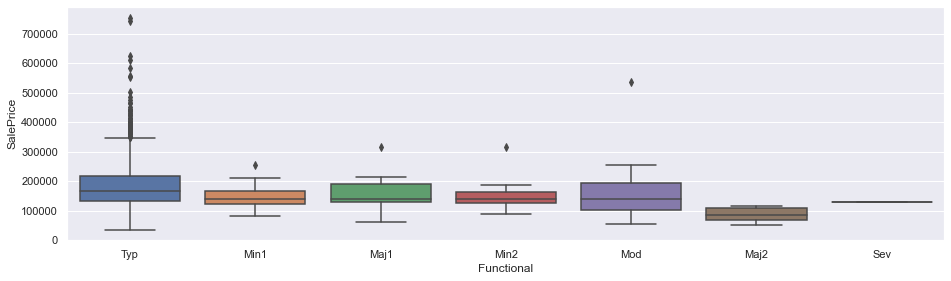

CORRELATION:
Functional and SalePrice: 0.12


In [82]:
analisis("Functional")

#### 57. Fireplaces

Fireplaces: Number of fireplaces.

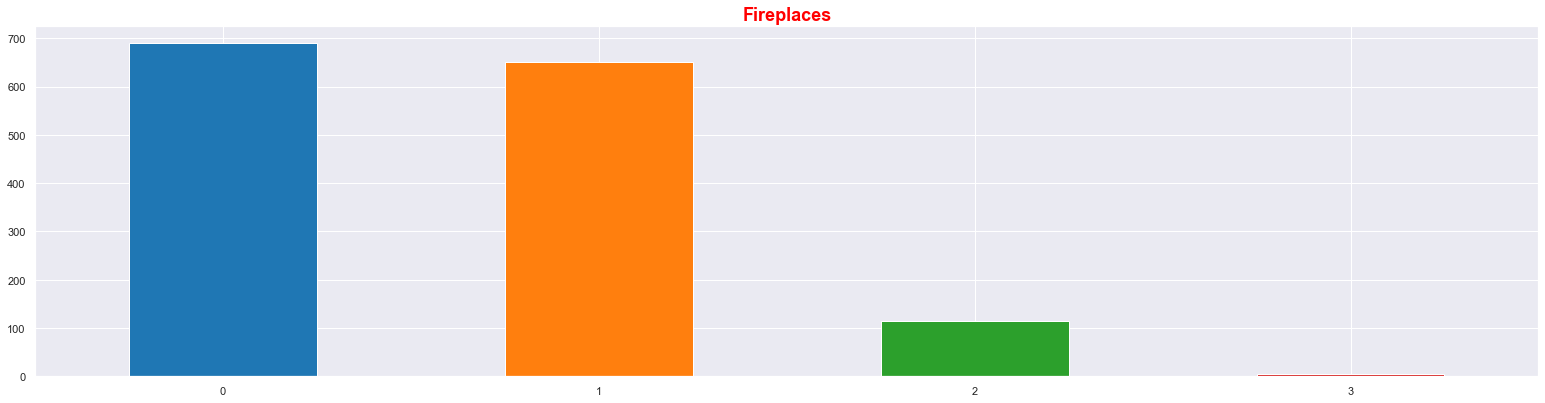

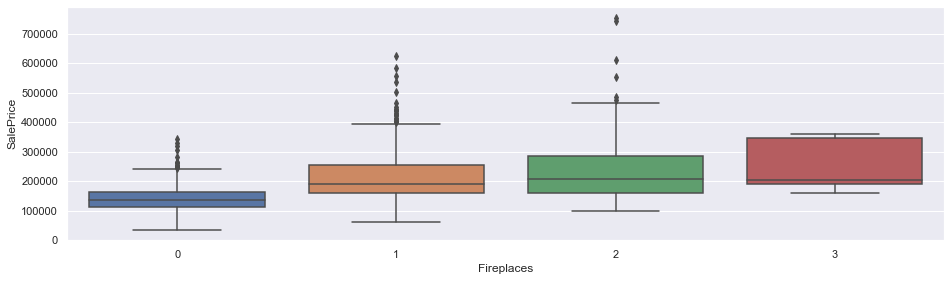

CORRELATION:
Fireplaces and SalePrice: 0.47


In [83]:
analisis("Fireplaces")

#### 58.FireplaceQu
*Fireplace quality:*

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
 It shows a hierarchy among the variables.

Replacing NaN values with `NoFi`:

In [84]:
data.FireplaceQu.fillna('NoFi',inplace=True)

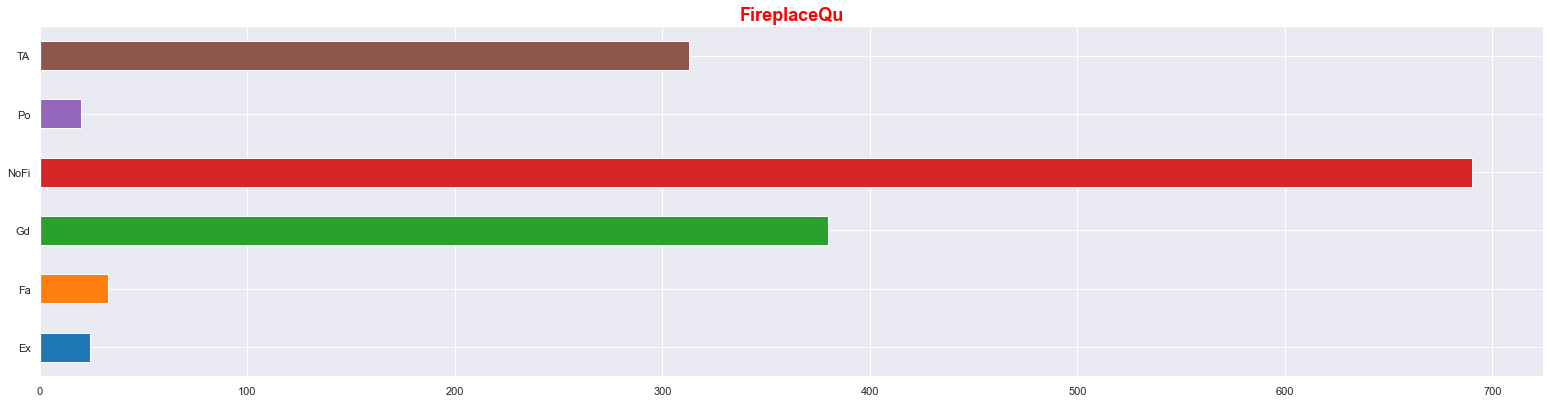

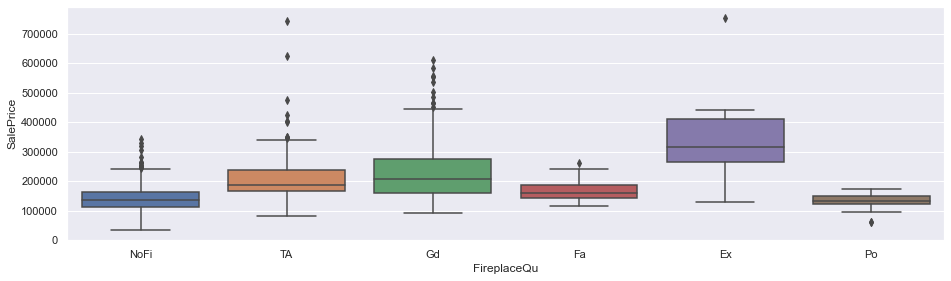

CORRELATION:
FireplaceQu and SalePrice: -0.1


In [85]:
analisis("FireplaceQu")

#### 59.GarageType
*Garage location:*
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment   Basement Garage
       BuiltIn   Built-In (Garage part of house - typically has room above garage)
       CarPort   Car Port
       Detchd	Detached from home
       NA        No Garage
It shows a hierarchy among the variables.

Replacing NaN values with `NoGa`:

In [86]:
data.GarageType.fillna('NoGa',inplace=True)

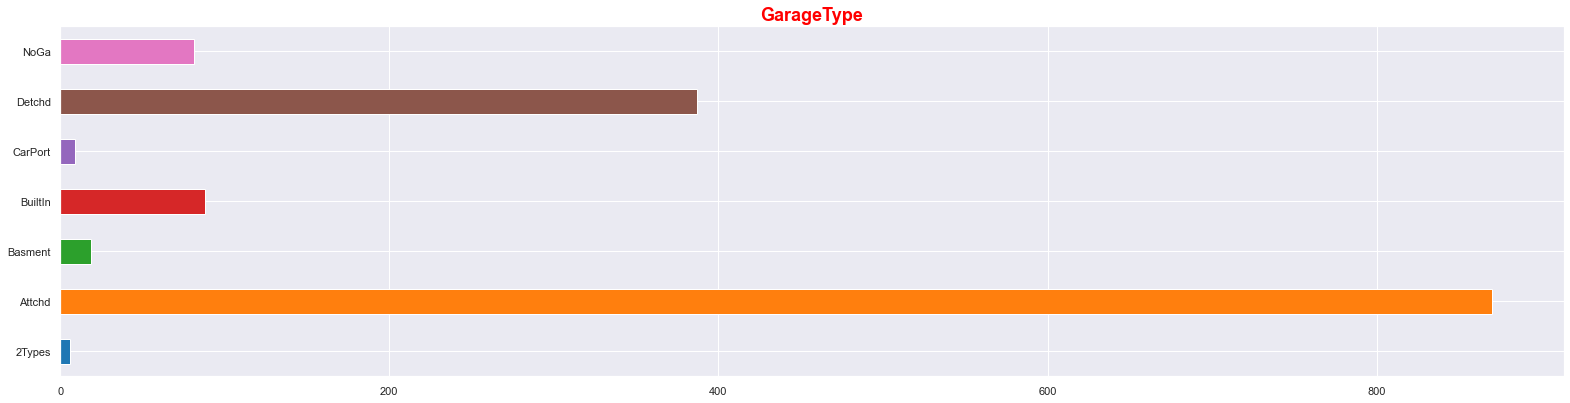

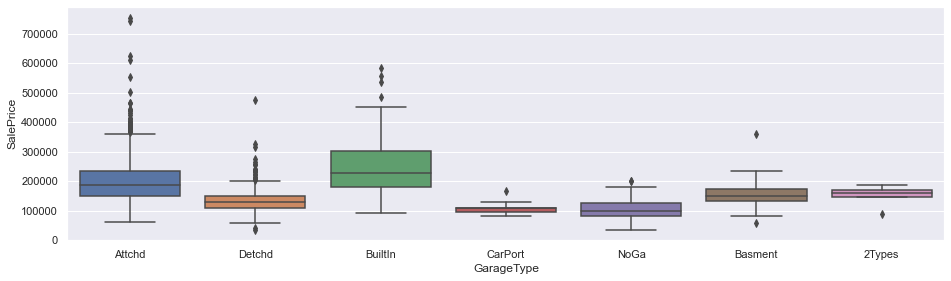

CORRELATION:
GarageType and SalePrice: -0.42


In [87]:
analisis("GarageType")

#### 60.GarageYrBlt
*Year garage was built.*

Replacing NaN values with the median:

In [88]:
data.GarageYrBlt.fillna(data .GarageYrBlt.median(),inplace=True)

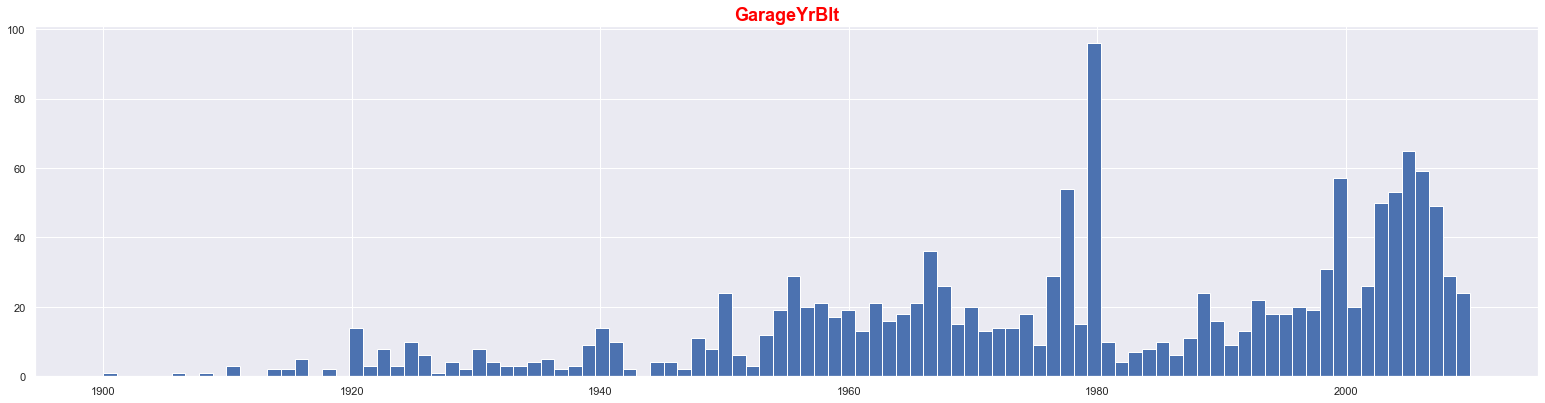

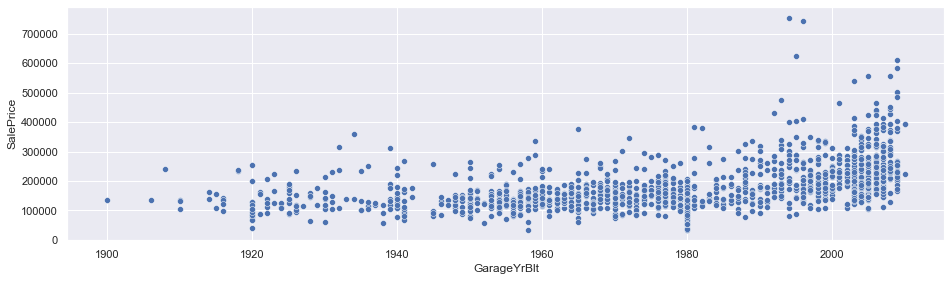

CORRELATION:
GarageYrBlt and SalePrice: 0.47


In [89]:
analisis("GarageYrBlt")

#### 61.GarageFinish
*Interior finish of the garage:*

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA     No Garage
It shows a hierarchy among the variables.

Replacing null values with `NoGa`:

In [90]:
data.GarageFinish.fillna('NoGa',inplace=True)

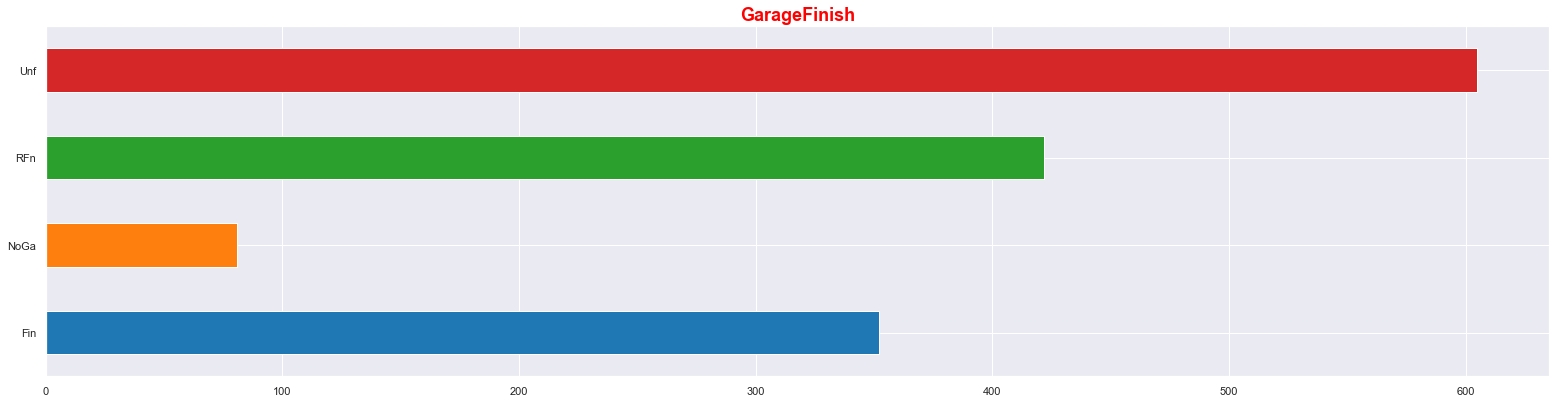

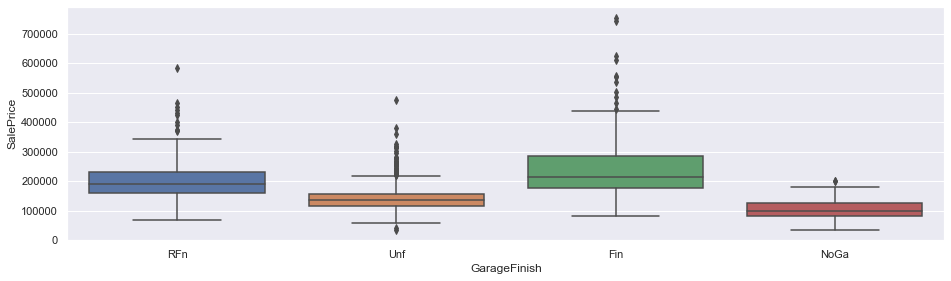

CORRELATION:
GarageFinish and SalePrice: -0.43


In [91]:
analisis("GarageFinish")

#### 62.GarageCars
*Size of garage in car capacity.*

Replacing NaN values with the median:

In [92]:
data.GarageCars.fillna(data.GarageCars.median(),inplace=True)

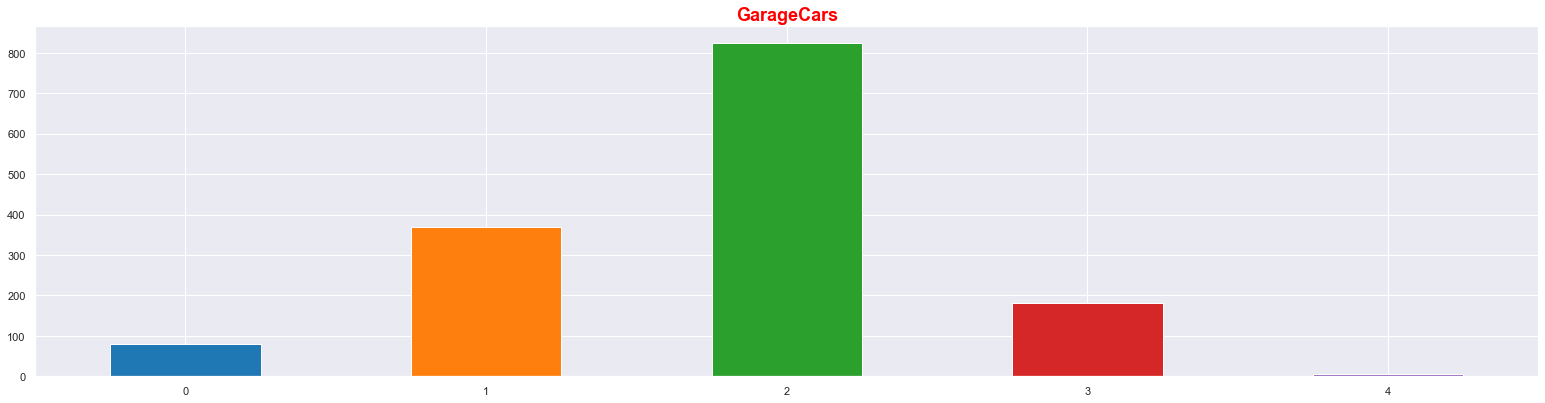

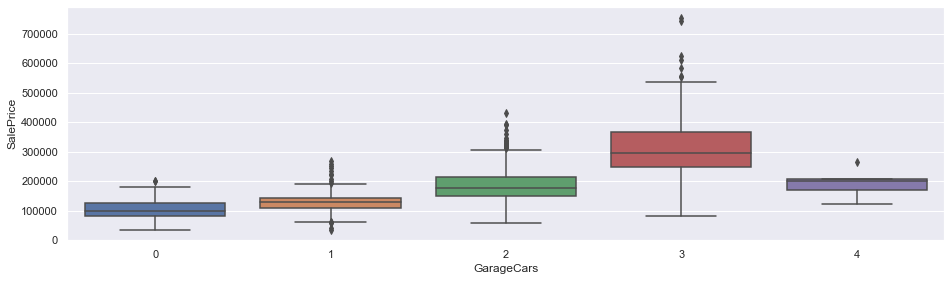

CORRELATION:
GarageCars and SalePrice: 0.64


In [93]:
analisis("GarageCars")

#### 63.GarageArea
*Size of garage in square feet.*

Replacing NaN values with 0:

In [94]:
data.GarageArea.fillna(0,inplace=True)

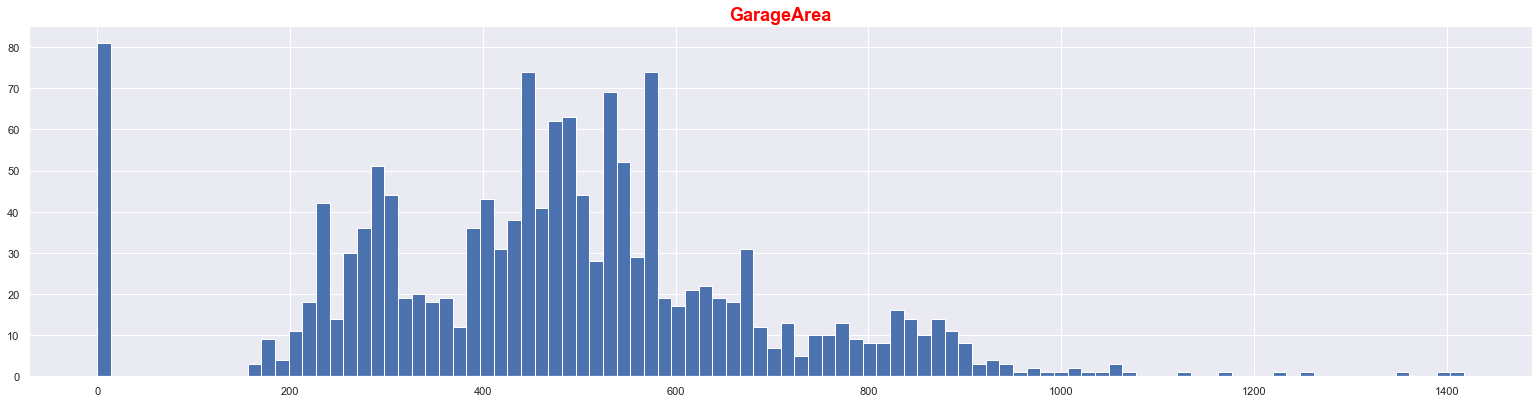

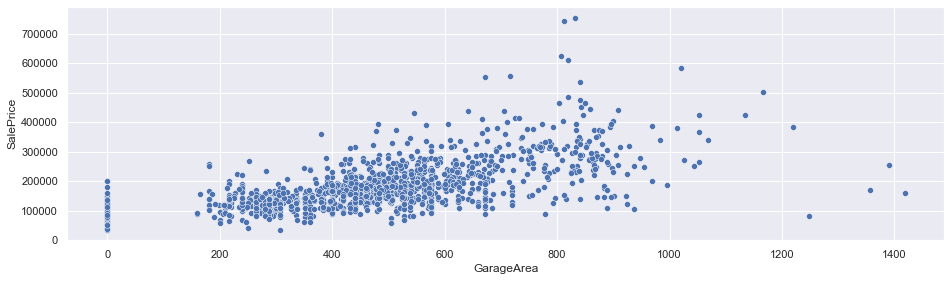

CORRELATION:
GarageArea and SalePrice: 0.62


In [95]:
analisis("GarageArea")

#### 64.GarageQual
*Garage quality:*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
It shows a hierarchy among the variables.

Replacing null values with `NoGa`:

In [96]:
data.GarageQual.fillna('NoGa',inplace=True)

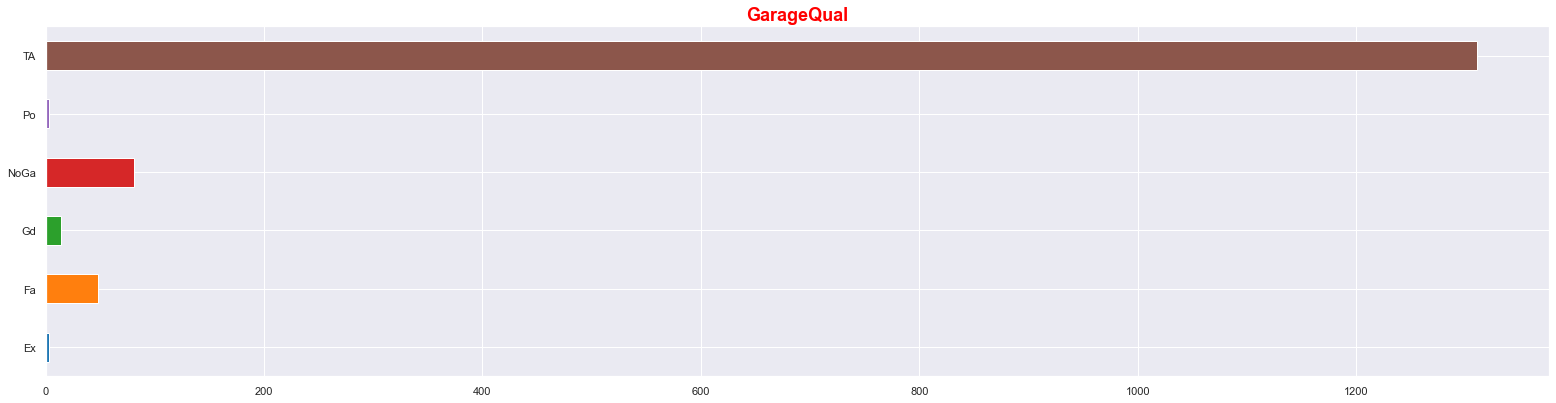

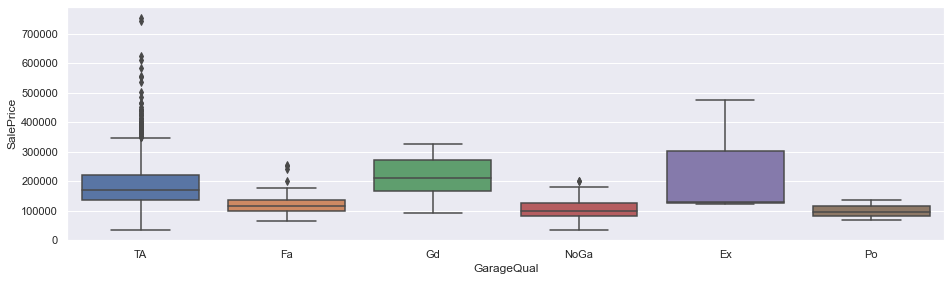

CORRELATION:
GarageQual and SalePrice: 0.21


In [97]:
analisis("GarageQual")

#### 65.GarageCond
*Garage condition:*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
 It shows a hierarchy among the variables.

Replacing NaN values with `NoGa`:

In [98]:
data.GarageCond.fillna('NoGa',inplace=True)

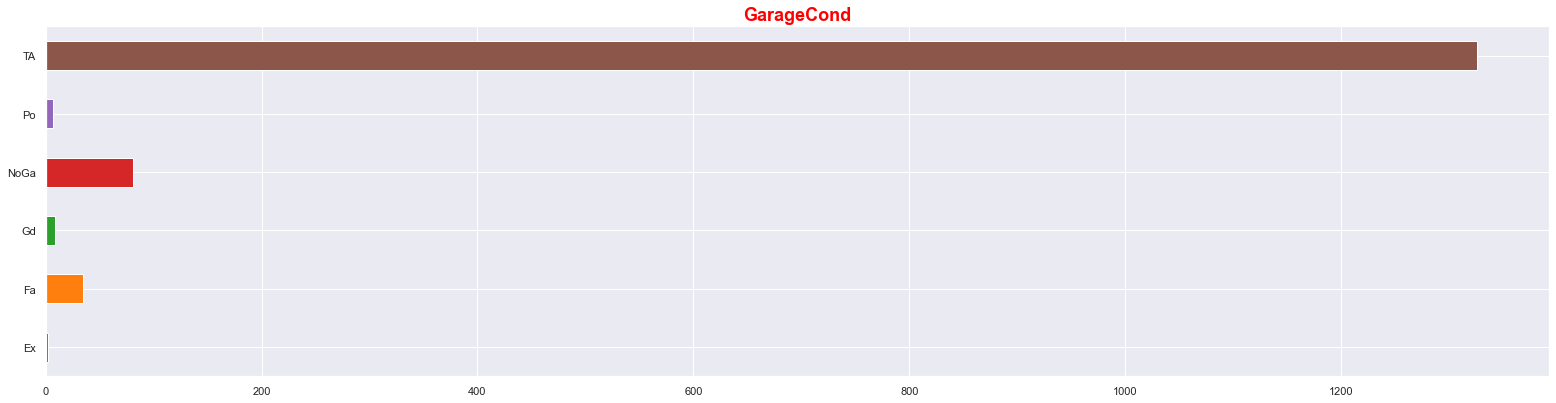

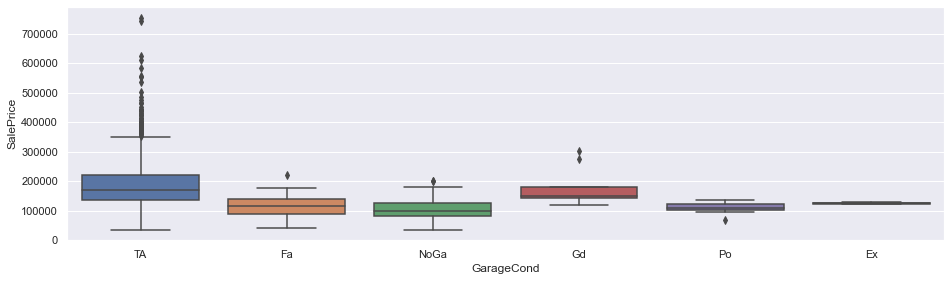

CORRELATION:
GarageCond and SalePrice: 0.25


In [99]:
analisis("GarageCond")

#### 66.PavedDrive
*Paved driveway:*

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
It shows a hierarchy among the variables.

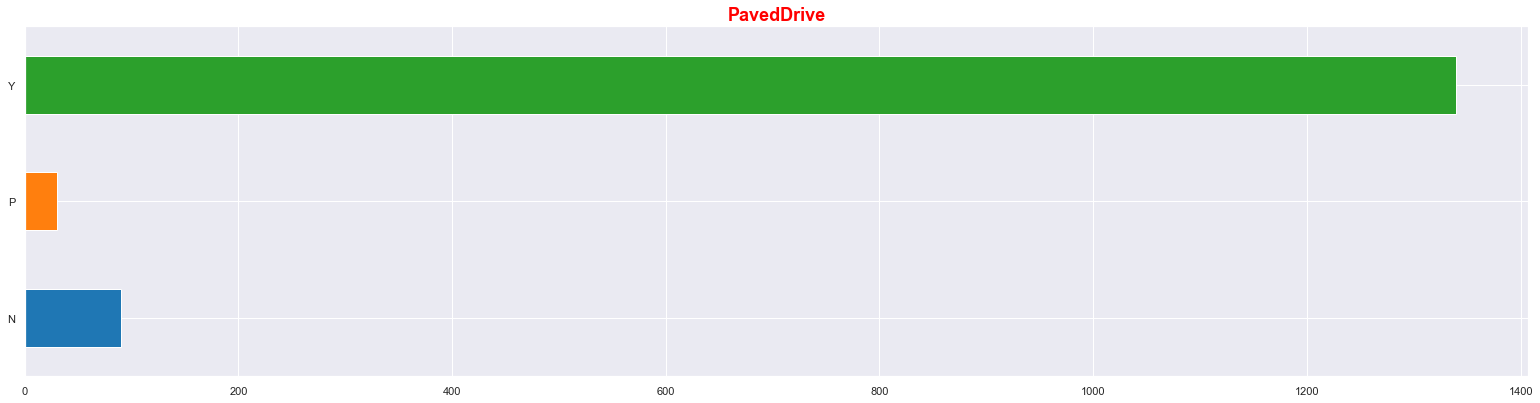

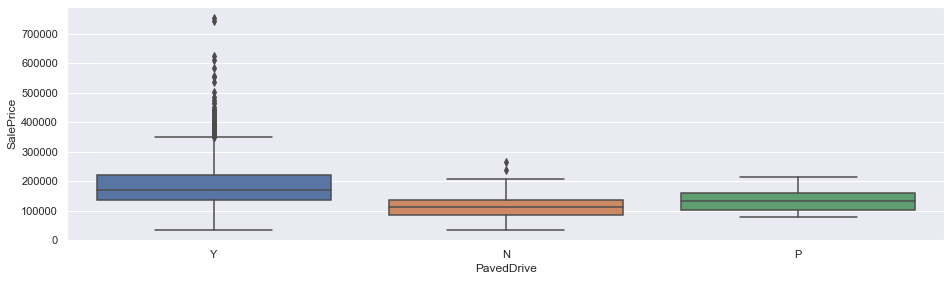

CORRELATION:
PavedDrive and SalePrice: 0.23


In [100]:
analisis("PavedDrive")

#### 67.WoodDeckSF
*Wood deck area in square feet.*

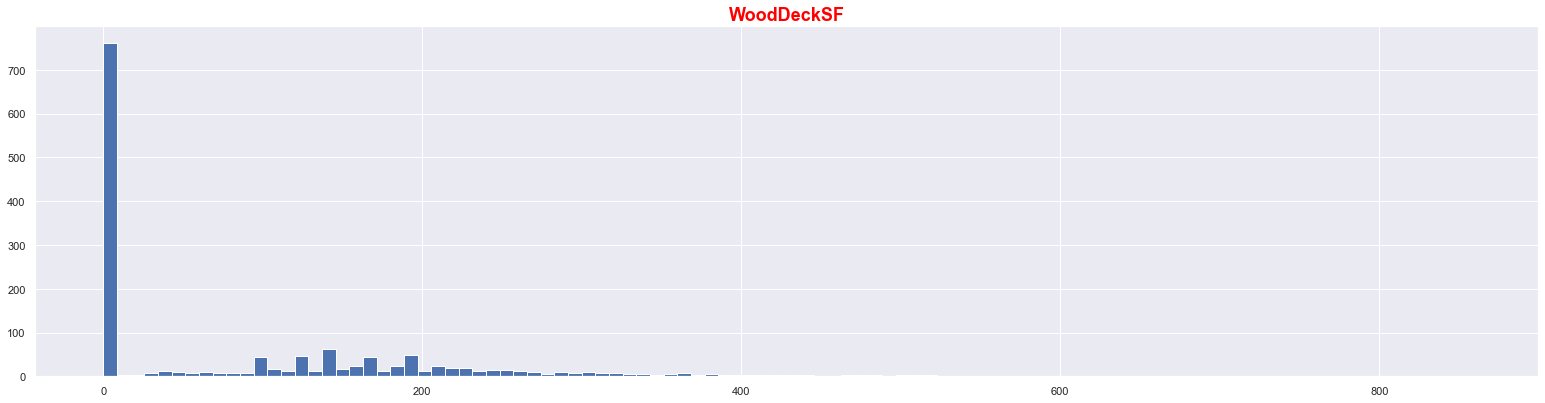

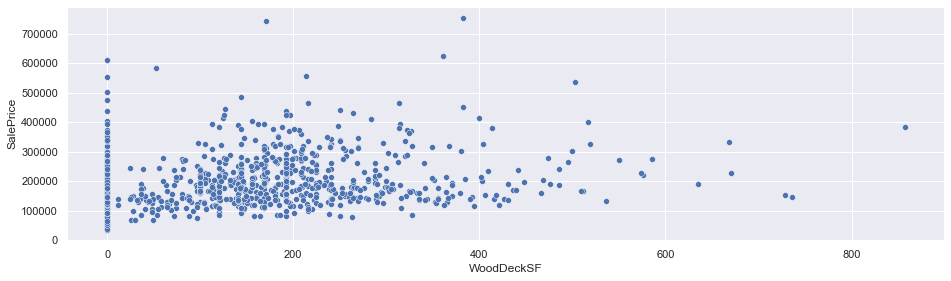

CORRELATION:
WoodDeckSF and SalePrice: 0.32


In [101]:
analisis("WoodDeckSF")

#### 68.OpenPorchSF
*Open porch area in square feet.*

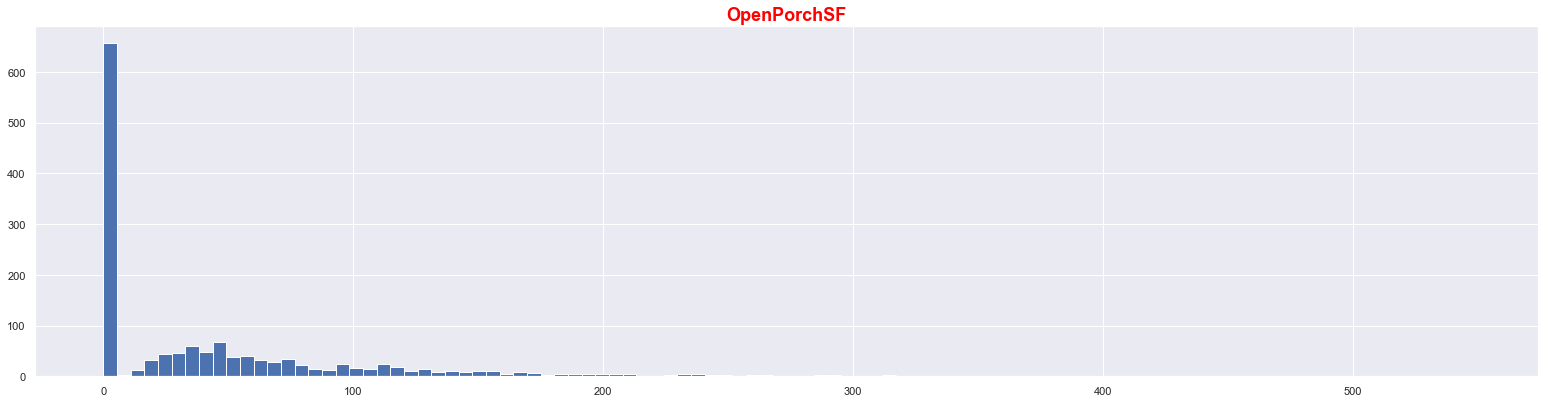

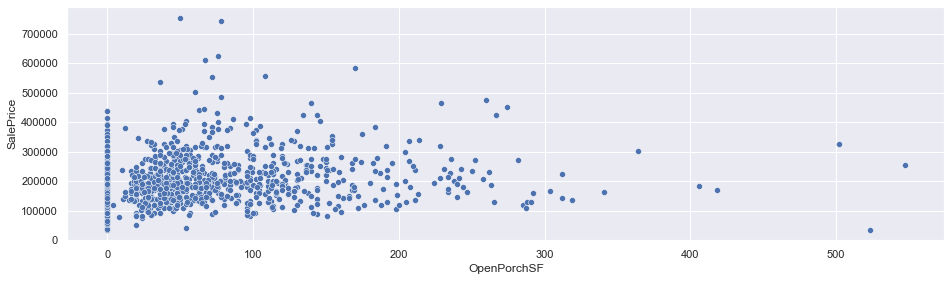

CORRELATION:
OpenPorchSF and SalePrice: 0.32


In [102]:
analisis("OpenPorchSF")

#### 69.EnclosedPorch
*Enclosed porch area in square feet.*

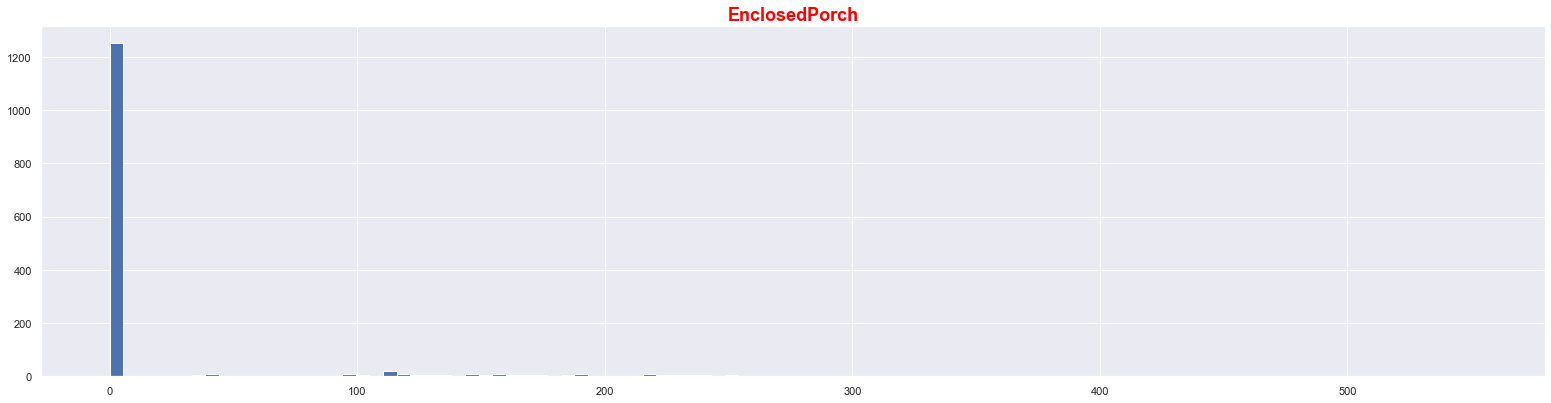

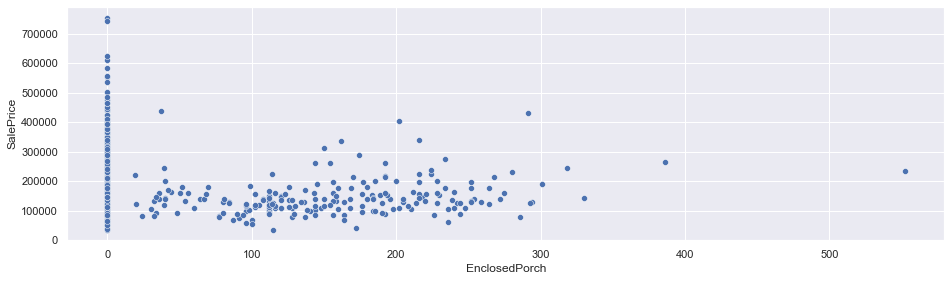

CORRELATION:
EnclosedPorch and SalePrice: -0.13


In [103]:
analisis("EnclosedPorch")

#### 70.3SsnPorch
*Three season porch area in square feet.*

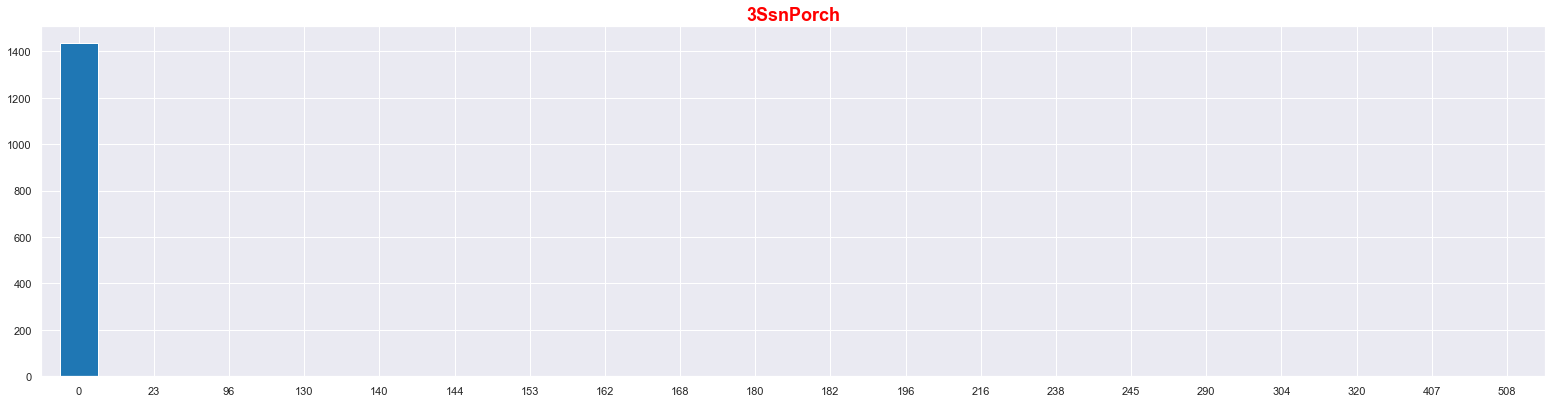

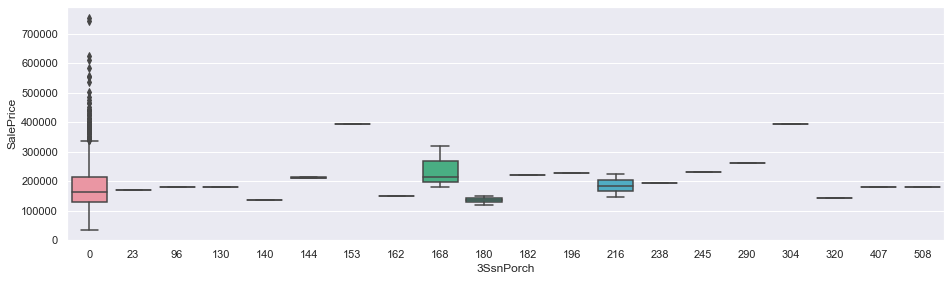

CORRELATION:
3SsnPorch and SalePrice: 0.04


In [104]:
analisis("3SsnPorch")

#### 71.ScreenPorch
*Screen porch area in square feet.*

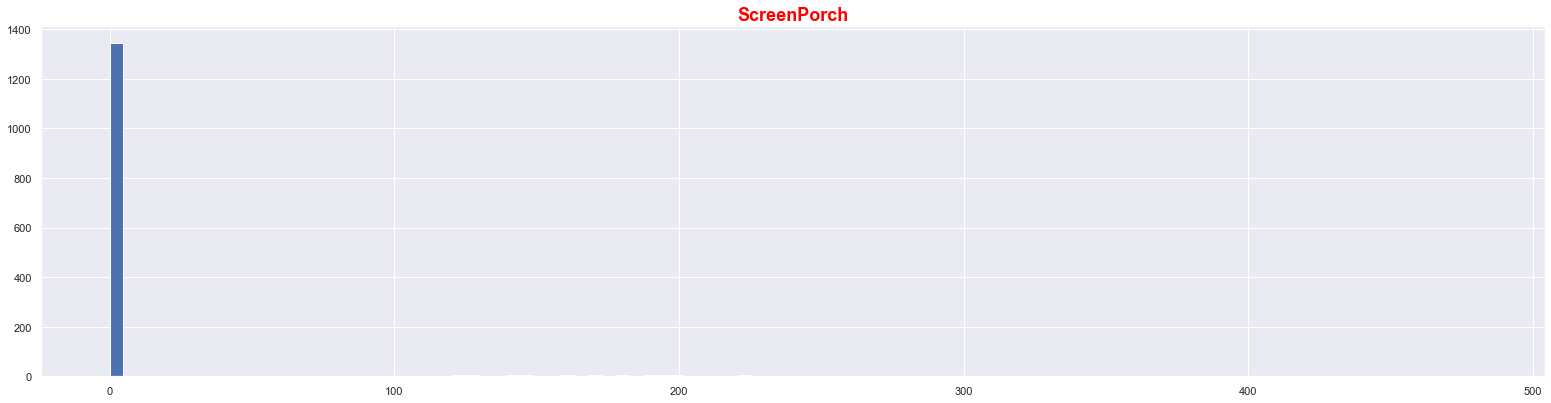

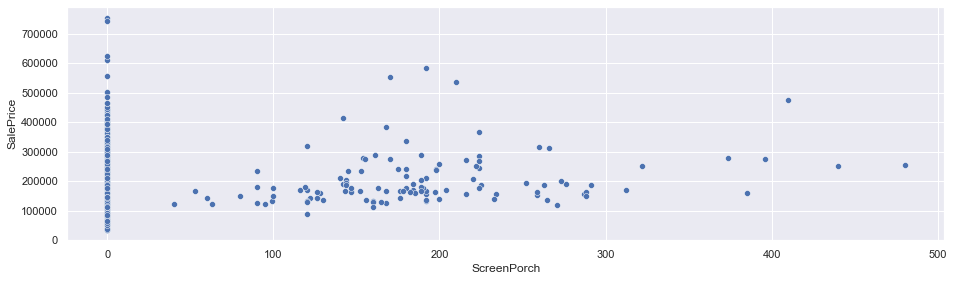

CORRELATION:
ScreenPorch and SalePrice: 0.11


In [105]:
analisis("ScreenPorch")

#### 72.PoolArea
*Pool area in square feet.*

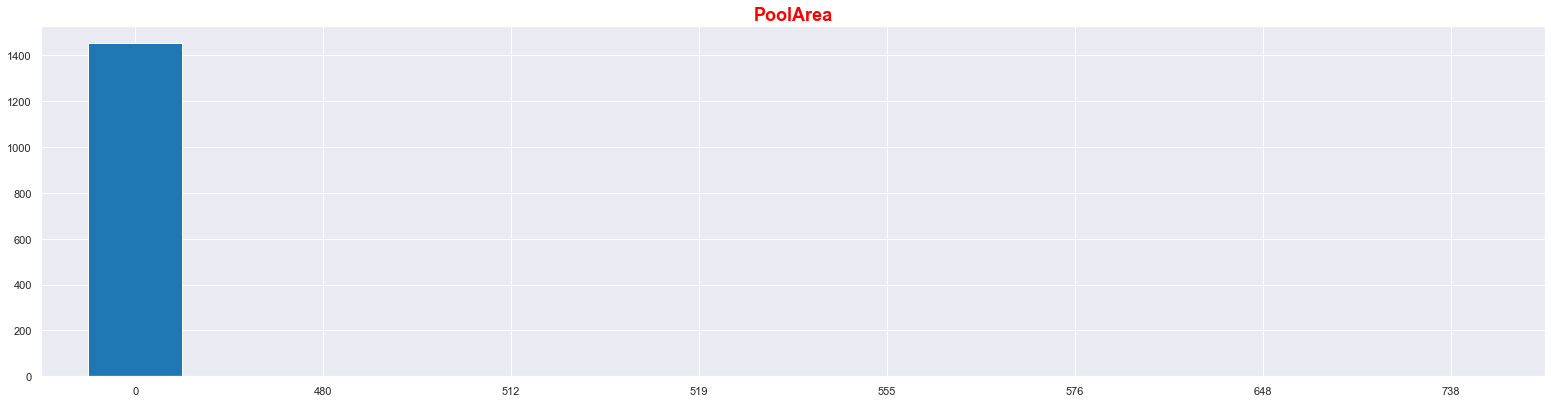

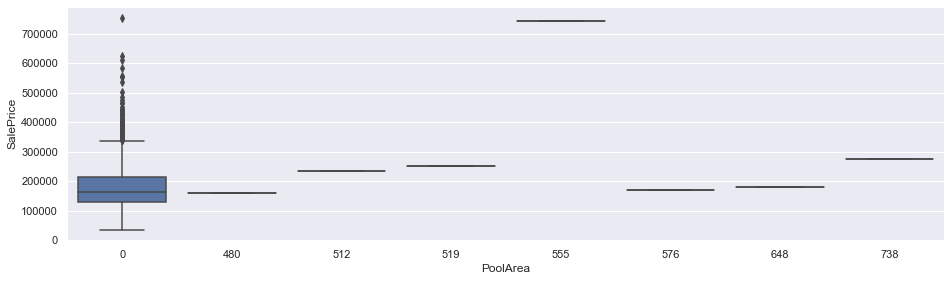

CORRELATION:
PoolArea and SalePrice: 0.09


In [106]:
analisis("PoolArea")

#### 73.PoolQC
*Pool quality:*
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
 It shows a hierarchy among the variables.

Replacing NaN with `NoPo`:

In [107]:
data.PoolQC.fillna('NoPo',inplace=True)

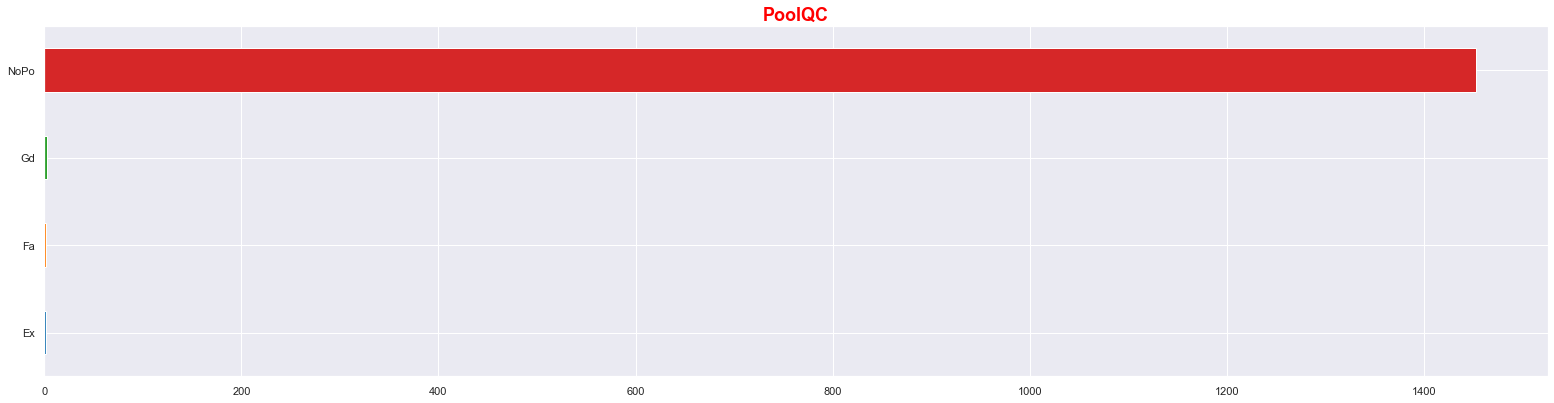

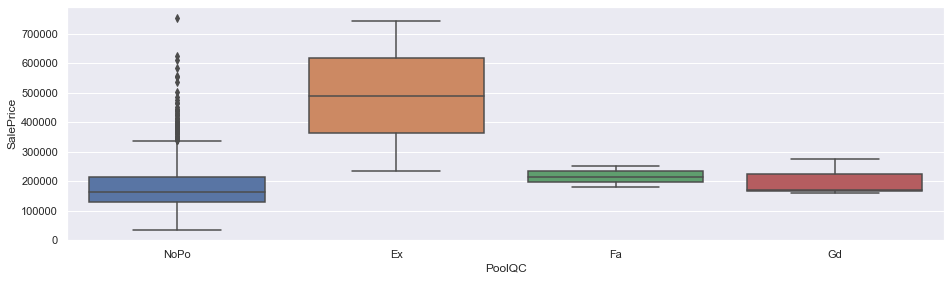

CORRELATION:
PoolQC and SalePrice: -0.13


In [108]:
analisis("PoolQC")

#### 74.Fence
*Fence quality:*
		
       GdPrv    Good Privacy
       MnPrv	Minimum Privacy
       GdWo     Good Wood
       MnWw     Minimum Wood/Wire
       NA	   No Fence
 It shows a hierarchy among the variables.

Replacing NaN values with `NoFe`:

In [109]:
data.Fence.fillna('NoFe',inplace=True)

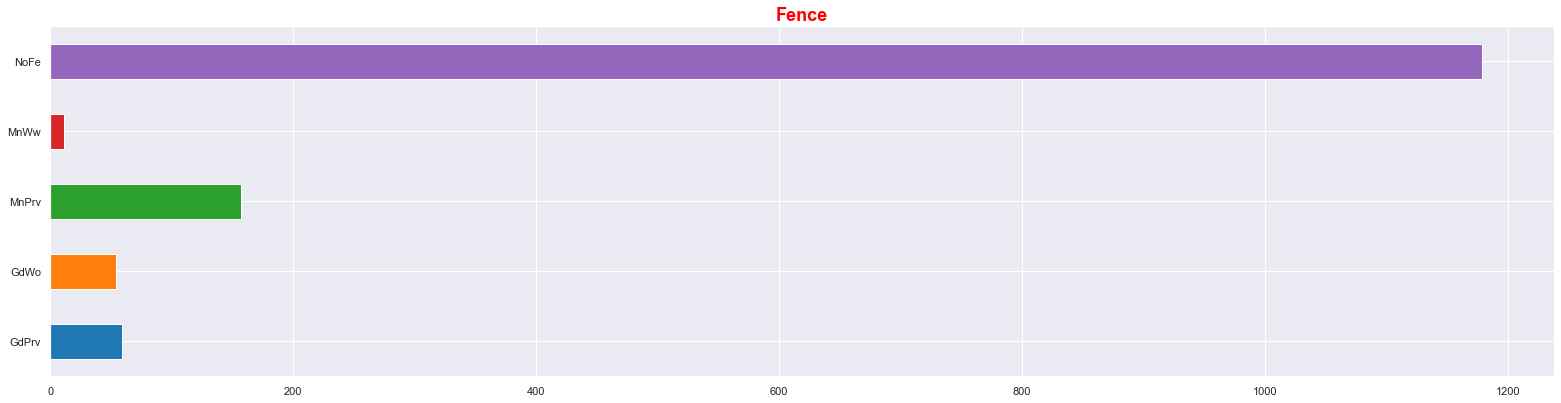

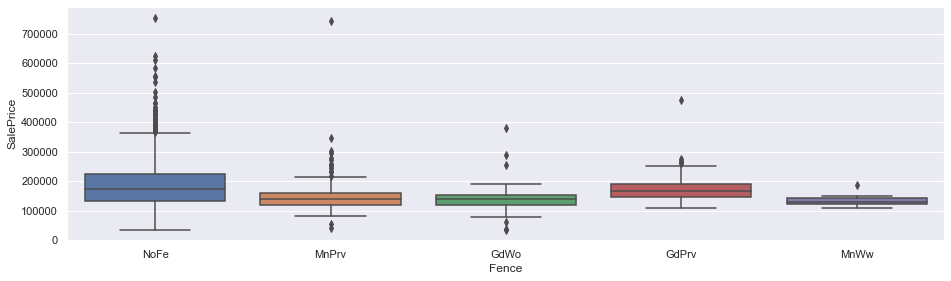

CORRELATION:
Fence and SalePrice: 0.14


In [110]:
analisis("Fence")

#### 75.MiscFeature
*Miscellaneous feature not covered in other categories:*
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA      None
 It shows a hierarchy among the variables.

Replacing NaN values with `None`:

In [111]:
data.MiscFeature.fillna('None',inplace=True)

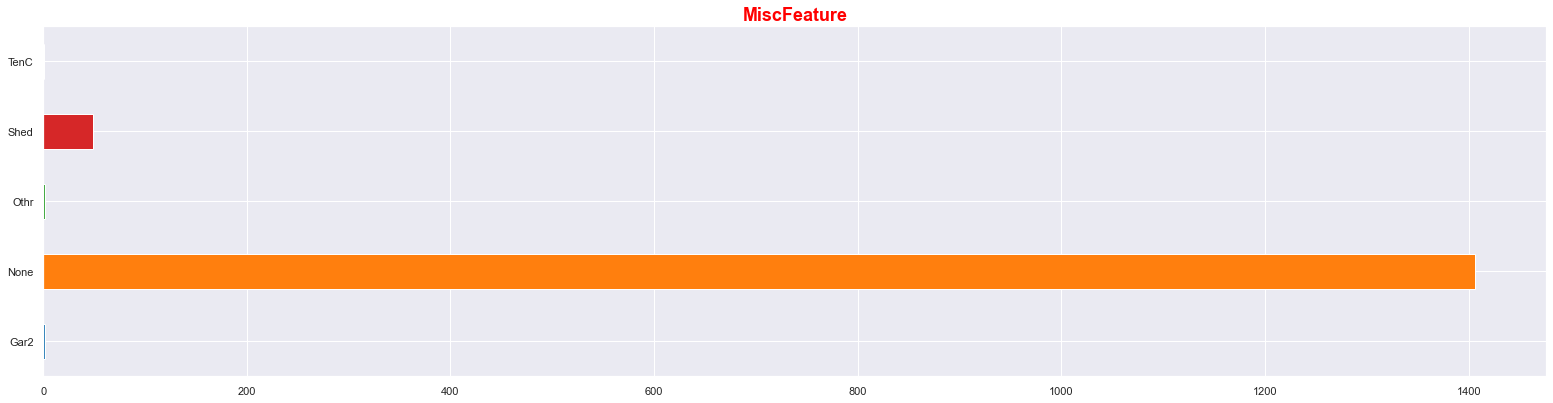

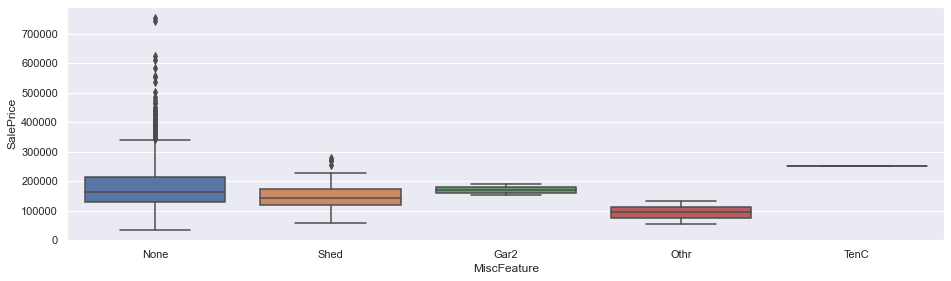

CORRELATION:
MiscFeature and SalePrice: -0.07


In [112]:
analisis("MiscFeature")

#### 76.MiscVal
*Value of miscellaneous feature in dollars.*

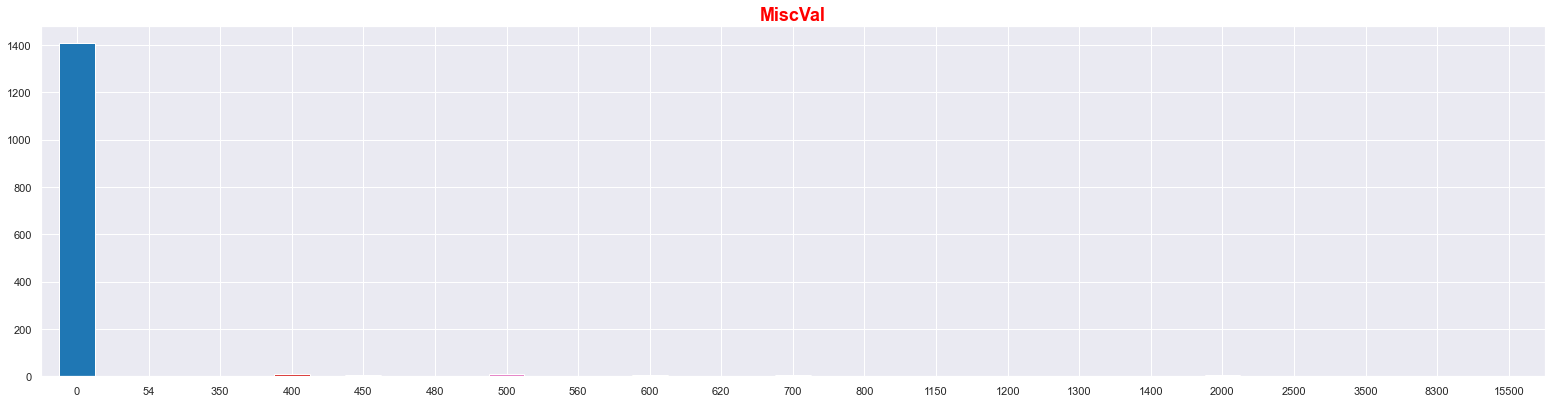

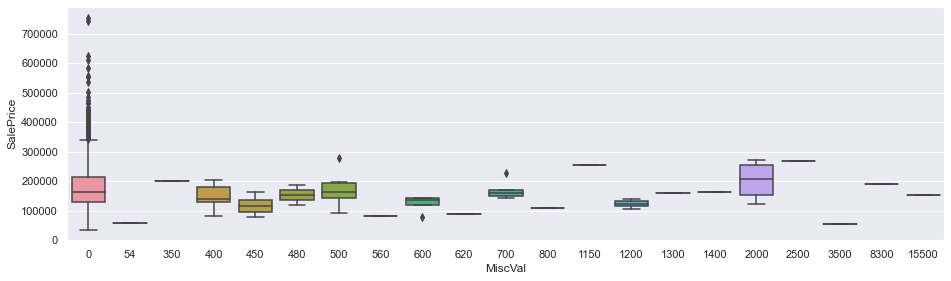

CORRELATION:
MiscVal and SalePrice: -0.02


In [113]:
analisis("MiscVal")

#### 77.MoSold
*Month Sold (MM).*

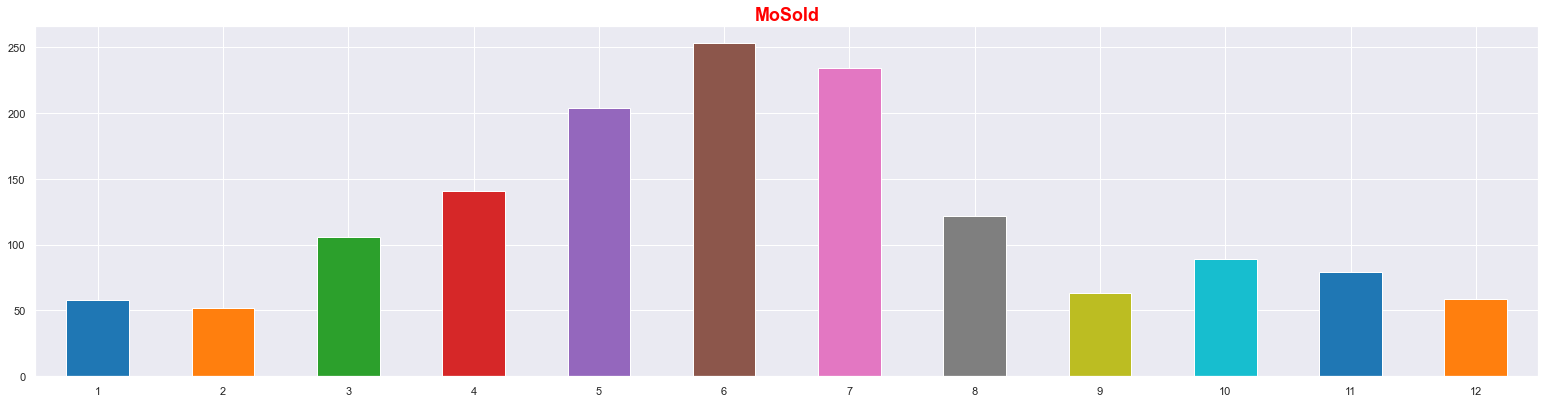

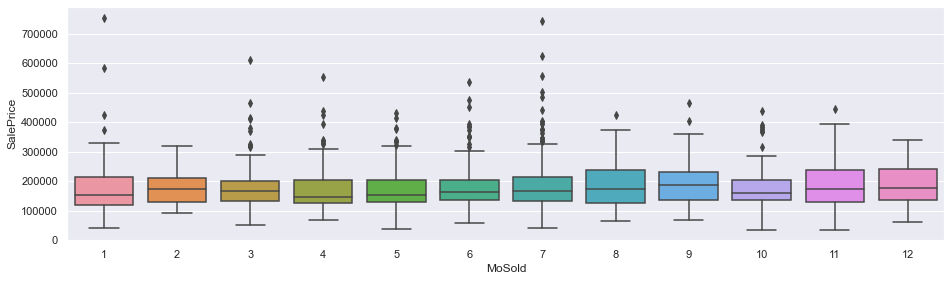

CORRELATION:
MoSold and SalePrice: 0.05


In [114]:
analisis("MoSold")

#### 78.YrSold
*Year Sold (YYYY).*

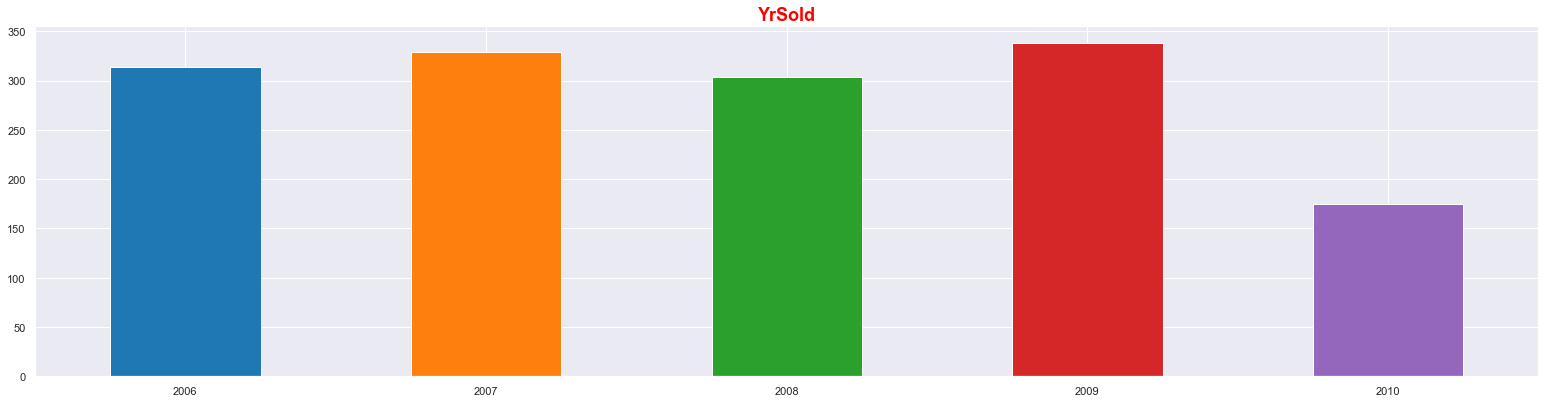

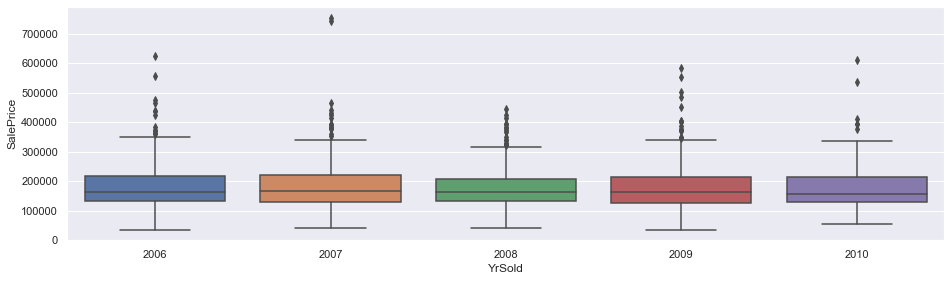

CORRELATION:
YrSold and SalePrice: -0.03


In [115]:
analisis("YrSold")

#### 79.SaleType
*Type of sale:*
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw  Contract Low Down payment and low interest
       ConLI  Contract Low Interest
       ConLD  Contract Low Down
       Oth	Other
I consider it does not show a hierarchy among the variables.

Replacing NaN values with mode:

In [116]:
data.SaleType.fillna(data.SaleType.mode().iloc[0],inplace=True)

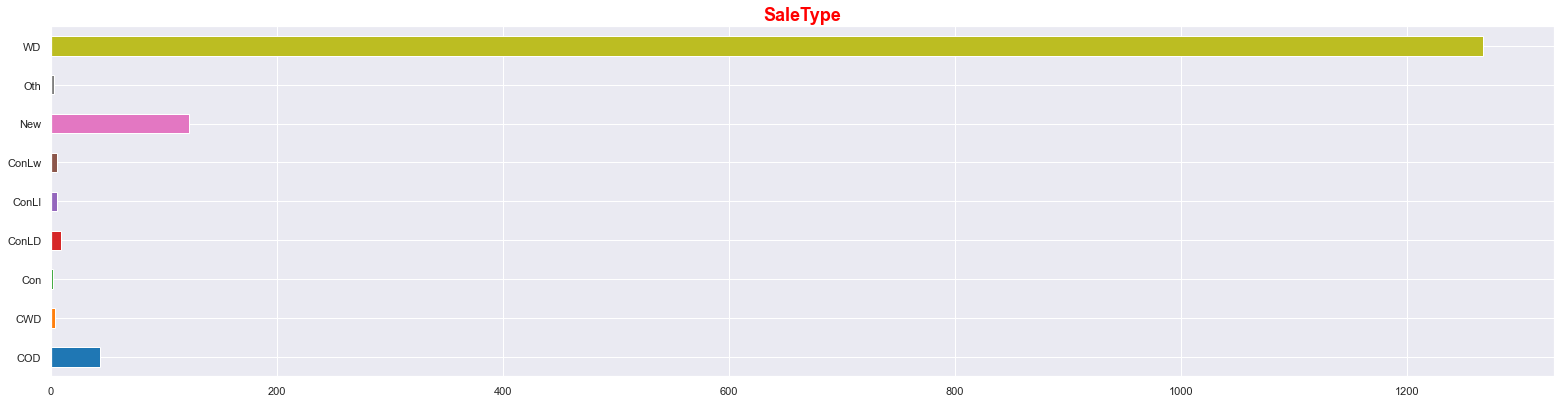

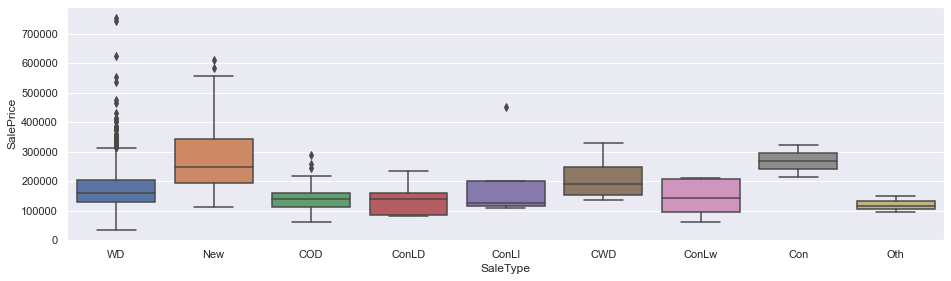

CORRELATION:
SaleType and SalePrice: -0.05


In [117]:
analisis("SaleType")

#### 80.SaleCondition
*Condition of sale:*

       Normal	Normal Sale
       Abnorml   Abnormal Sale -  trade, foreclosure, short sale
       AdjLand   Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial   Home was not completed when last assessed (associated with New Homes)
I consider it does not show a hierarchy among the variables.

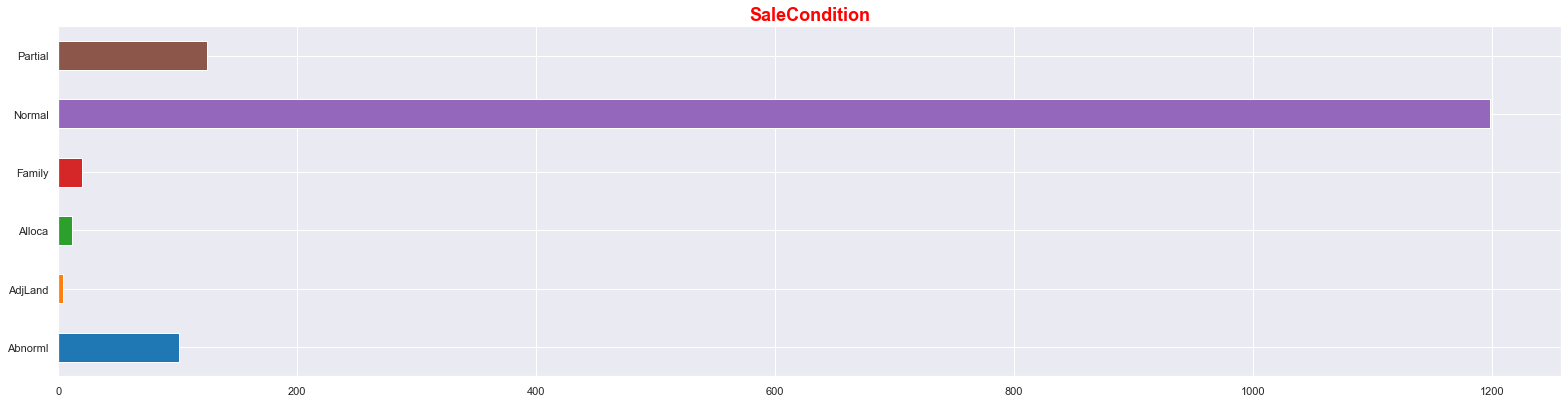

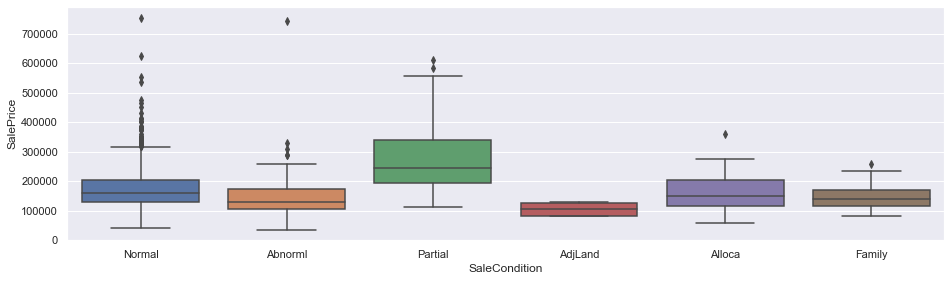

CORRELATION:
SaleCondition and SalePrice: 0.21


In [118]:
analisis("SaleCondition")

### SalePrice

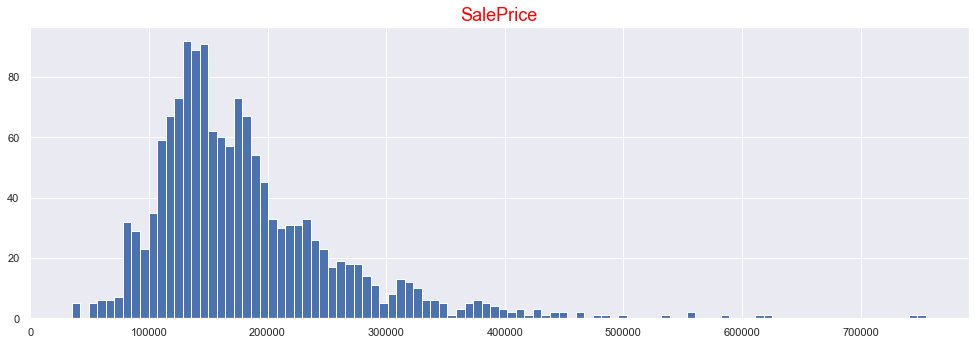

In [119]:
data.SalePrice.hist(bins=100,figsize=(15,5))
plt.title('SalePrice',fontsize=18,color="red")
plt.show()

## Deleting 

In [120]:
data.drop(columns=["Id","Alley"],inplace=True)

## Transformation:

### Non categorical level attributes 

In [121]:
non_cat_level_attrs =["MSSubClass","Neighborhood","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
                      "Foundation","Heating" ,"Electrical","SaleType","SaleCondition"]
data=pd.get_dummies(data=data,drop_first=True,columns=non_cat_level_attrs)

### Categorical level attributes

In [122]:
cat_level_attrs=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
                 "Condition1","Condition2","BldgType","HouseStyle","RoofStyle","ExterQual","ExterCond","BsmtQual",
                 "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","CentralAir","KitchenQual",
                 "Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive",
                 "PoolQC","Fence","MiscFeature"]
for cat_level_attr in cat_level_attrs:
    data[cat_level_attr]=le.fit_transform(data[cat_level_attr])

## Normalizing between 0 and 1

In [123]:
min_max_scaler = preprocessing.MinMaxScaler()
data.iloc[:,data.columns!="SalePrice"] = min_max_scaler.fit_transform(data.drop(columns="SalePrice"))

In [124]:
#min_max_scaler = preprocessing.MinMaxScaler()
#train.iloc[:,~train.columns.isin(["Id","SalePrice"])] = min_max_scaler.fit_transform(train.iloc[:,~train.columns.isin(["Id","SalePrice"])])
#test_x.iloc[:,test_x.columns!="Id"] = min_max_scaler.fit_transform(test_x.iloc[:,test_x.columns!="Id"])

To csv file:

In [125]:
data.to_csv("data_ml.csv",index=False)